In [2]:
#!/usr/bin/env python3

# Train single CPU PPO1 on slimevolley.
# Should solve it (beat existing AI on average over 1000 trials) in 3 hours on single CPU, within 3M steps.

import os
import gym
import slimevolleygym
from slimevolleygym import SurvivalRewardEnv

from stable_baselines.ppo1 import PPO1
from stable_baselines.common.policies import MlpPolicy
from stable_baselines import logger
from stable_baselines.common.callbacks import EvalCallback

NUM_TIMESTEPS = int(5e6)
SEED = 721
EVAL_FREQ = 250000
EVAL_EPISODES = 10  # was 1000
LOGDIR = "ppo1" # moved to zoo afterwards.

logger.configure(folder=LOGDIR)

env = gym.make("SlimeVolley-v0")
env.seed(SEED)

Logging to ppo1


[721]

In [1]:
# take mujoco hyperparams (but doubled timesteps_per_actorbatch to cover more steps.)
model = PPO1(MlpPolicy, env, timesteps_per_actorbatch=4096, clip_param=0.2, entcoeff=0.0, optim_epochs=10,
                 optim_stepsize=3e-4, optim_batchsize=64, gamma=0.99, lam=0.95, schedule='linear', verbose=2)

eval_callback = EvalCallback(env, best_model_save_path=LOGDIR, log_path=LOGDIR, eval_freq=EVAL_FREQ, n_eval_episodes=EVAL_EPISODES)

model.learn(total_timesteps=NUM_TIMESTEPS, callback=eval_callback)

model.save(os.path.join(LOGDIR, "final_model")) # probably never get to this point.

env.close()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Logging to ppo1




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where







********** Iteration 0 ************


/Users/stephen/anaconda3/envs/slime-rl/lib/python3.7/site-packages/stable_baselines/common/callbacks.py:287: UserWarning: Training and eval env are not of the same type<SlimeVolleyEnv<SlimeVolley-v0>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fd86b6bbe50>
  "{} != {}".format(self.training_env, self.eval_env))


Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -3.20e-06 |       0.00000 |       0.06779 |       0.00040 |       2.07904
     -0.00219 |       0.00000 |       0.03535 |       0.00140 |       2.07804
     -0.00433 |       0.00000 |       0.02984 |       0.00347 |       2.07596
     -0.00554 |       0.00000 |       0.02675 |       0.00519 |       2.07424
     -0.00605 |       0.00000 |       0.02506 |       0.00540 |       2.07403
     -0.00648 |       0.00000 |       0.02404 |       0.00728 |       2.07215
     -0.00704 |       0.00000 |       0.02294 |       0.00708 |       2.07234
     -0.00749 |       0.00000 |       0.02214 |       0.00873 |       2.07071
     -0.00747 |       0.00000 |       0.02160 |       0.00723 |       2.07218
     -0.00781 |       0.00000 |       0.02100 |       0.00837 |       2.07105
Evaluating losses...
     -0.00887 |       0.00000 |       0.02055 |       0.00789 |       2.07153
-----------------------------

     -0.00871 |       0.00000 |       0.01804 |       0.00660 |       2.01114
     -0.00895 |       0.00000 |       0.01793 |       0.00746 |       2.01027
Evaluating losses...
     -0.01052 |       0.00000 |       0.01744 |       0.00768 |       2.01434
----------------------------------
| EpLenMean       | 543          |
| EpRewMean       | -4.93        |
| EpThisIter      | 7            |
| EpisodesSoFar   | 44           |
| TimeElapsed     | 16.2         |
| TimestepsSoFar  | 24576        |
| ev_tdlam_before | 0.817        |
| loss_ent        | 2.0143409    |
| loss_kl         | 0.0076799756 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.010523917 |
| loss_vf_loss    | 0.017435776  |
----------------------------------
********** Iteration 6 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00044 |       0.00000 |       0.01652 |       0.00045 |       2.01257
     -0.00237 |       0.00000 |       0.01471 |  

********** Iteration 11 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00239 |       0.00000 |       0.02960 |       0.00121 |       1.95412
     -0.00639 |       0.00000 |       0.02698 |       0.00546 |       1.96117
     -0.00824 |       0.00000 |       0.02586 |       0.00514 |       1.96806
     -0.00840 |       0.00000 |       0.02507 |       0.00654 |       1.97242
     -0.00852 |       0.00000 |       0.02422 |       0.00557 |       1.96945
     -0.00920 |       0.00000 |       0.02353 |       0.00606 |       1.97275
     -0.00987 |       0.00000 |       0.02330 |       0.00642 |       1.97100
     -0.00989 |       0.00000 |       0.02275 |       0.00639 |       1.97014
     -0.01057 |       0.00000 |       0.02234 |       0.00635 |       1.97275
     -0.01106 |       0.00000 |       0.02219 |       0.00660 |       1.96992
Evaluating losses...
     -0.01230 |       0.00000 |       0.02252 |       0.00660 |       

     -0.00988 |       0.00000 |       0.01276 |       0.00753 |       1.88843
     -0.00985 |       0.00000 |       0.01280 |       0.00745 |       1.88477
Evaluating losses...
     -0.01174 |       0.00000 |       0.01244 |       0.00846 |       1.88650
----------------------------------
| EpLenMean       | 580          |
| EpRewMean       | -4.83        |
| EpThisIter      | 7            |
| EpisodesSoFar   | 121          |
| TimeElapsed     | 43.4         |
| TimestepsSoFar  | 69632        |
| ev_tdlam_before | 0.857        |
| loss_ent        | 1.8865039    |
| loss_kl         | 0.008462446  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.011735715 |
| loss_vf_loss    | 0.0124448575 |
----------------------------------
********** Iteration 17 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00044 |       0.00000 |       0.01312 |       0.00123 |       1.89649
     -0.00320 |       0.00000 |       0.01255 | 

********** Iteration 22 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00054 |       0.00000 |       0.01465 |       0.00127 |       1.91194
     -0.00191 |       0.00000 |       0.01368 |       0.00488 |       1.91231
     -0.00362 |       0.00000 |       0.01308 |       0.00368 |       1.90852
     -0.00502 |       0.00000 |       0.01299 |       0.00405 |       1.90500
     -0.00537 |       0.00000 |       0.01286 |       0.00578 |       1.90499
     -0.00601 |       0.00000 |       0.01281 |       0.00538 |       1.90556
     -0.00691 |       0.00000 |       0.01254 |       0.00570 |       1.90615
     -0.00721 |       0.00000 |       0.01240 |       0.00563 |       1.90202
     -0.00774 |       0.00000 |       0.01243 |       0.00598 |       1.90350
     -0.00873 |       0.00000 |       0.01240 |       0.00538 |       1.90384
Evaluating losses...
     -0.01041 |       0.00000 |       0.01215 |       0.00498 |       

     -0.01044 |       0.00000 |       0.01284 |       0.00720 |       1.84837
     -0.01069 |       0.00000 |       0.01286 |       0.00747 |       1.84277
Evaluating losses...
     -0.01225 |       0.00000 |       0.01256 |       0.00620 |       1.84721
----------------------------------
| EpLenMean       | 559          |
| EpRewMean       | -4.94        |
| EpThisIter      | 7            |
| EpisodesSoFar   | 203          |
| TimeElapsed     | 71           |
| TimestepsSoFar  | 114688       |
| ev_tdlam_before | 0.812        |
| loss_ent        | 1.8472139    |
| loss_kl         | 0.0062041925 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.012252055 |
| loss_vf_loss    | 0.012562636  |
----------------------------------
********** Iteration 28 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00050 |       0.00000 |       0.02221 |       0.00108 |       1.84018
     -0.00443 |       0.00000 |       0.02099 | 

********** Iteration 33 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00110 |       0.00000 |       0.01335 |       0.00221 |       1.76159
     -0.00309 |       0.00000 |       0.01205 |       0.00371 |       1.76099
     -0.00535 |       0.00000 |       0.01144 |       0.00674 |       1.75842
     -0.00589 |       0.00000 |       0.01107 |       0.00631 |       1.74949
     -0.00714 |       0.00000 |       0.01099 |       0.00648 |       1.75079
     -0.00775 |       0.00000 |       0.01083 |       0.00702 |       1.74737
     -0.00835 |       0.00000 |       0.01061 |       0.00713 |       1.75042
     -0.00870 |       0.00000 |       0.01041 |       0.00751 |       1.74485
     -0.00954 |       0.00000 |       0.01040 |       0.00616 |       1.74809
     -0.00992 |       0.00000 |       0.01026 |       0.00698 |       1.74749
Evaluating losses...
     -0.01235 |       0.00000 |       0.00995 |       0.00632 |       

     -0.01068 |       0.00000 |       0.01058 |       0.00673 |       1.74737
     -0.01172 |       0.00000 |       0.01055 |       0.00724 |       1.74507
Evaluating losses...
     -0.01431 |       0.00000 |       0.01030 |       0.00625 |       1.74528
-----------------------------------
| EpLenMean       | 585           |
| EpRewMean       | -4.89         |
| EpThisIter      | 7             |
| EpisodesSoFar   | 279           |
| TimeElapsed     | 102           |
| TimestepsSoFar  | 159744        |
| ev_tdlam_before | 0.84          |
| loss_ent        | 1.7452838     |
| loss_kl         | 0.0062521817  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0143107865 |
| loss_vf_loss    | 0.010298696   |
-----------------------------------
********** Iteration 39 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00026 |       0.00000 |       0.01635 |       0.00287 |       1.75134
     -0.00354 |       0.00000 |   

********** Iteration 44 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     5.50e-05 |       0.00000 |       0.01796 |       0.00273 |       1.71220
     -0.00293 |       0.00000 |       0.01593 |       0.00328 |       1.71008
     -0.00557 |       0.00000 |       0.01482 |       0.00419 |       1.71095
     -0.00661 |       0.00000 |       0.01452 |       0.00529 |       1.71273
     -0.00777 |       0.00000 |       0.01391 |       0.00596 |       1.70627
     -0.00907 |       0.00000 |       0.01376 |       0.00726 |       1.70851
     -0.00986 |       0.00000 |       0.01376 |       0.00632 |       1.70635
     -0.01043 |       0.00000 |       0.01332 |       0.00697 |       1.70328
     -0.01140 |       0.00000 |       0.01315 |       0.00642 |       1.70328
     -0.01210 |       0.00000 |       0.01294 |       0.00734 |       1.69965
Evaluating losses...
     -0.01450 |       0.00000 |       0.01274 |       0.00695 |       

     -0.01164 |       0.00000 |       0.01134 |       0.00642 |       1.64876
     -0.01257 |       0.00000 |       0.01124 |       0.00614 |       1.64965
Evaluating losses...
     -0.01390 |       0.00000 |       0.01092 |       0.00666 |       1.64872
----------------------------------
| EpLenMean       | 561          |
| EpRewMean       | -4.88        |
| EpThisIter      | 8            |
| EpisodesSoFar   | 360          |
| TimeElapsed     | 133          |
| TimestepsSoFar  | 204800       |
| ev_tdlam_before | 0.834        |
| loss_ent        | 1.648721     |
| loss_kl         | 0.0066567985 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.013897736 |
| loss_vf_loss    | 0.010920078  |
----------------------------------
********** Iteration 50 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00013 |       0.00000 |       0.01750 |       0.00233 |       1.65466
     -0.00523 |       0.00000 |       0.01629 | 

********** Iteration 55 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00054 |       0.00000 |       0.01653 |       0.00104 |       1.58190
     -0.00217 |       0.00000 |       0.01520 |       0.00394 |       1.57898
     -0.00441 |       0.00000 |       0.01490 |       0.00507 |       1.57059
     -0.00572 |       0.00000 |       0.01463 |       0.00466 |       1.56690
     -0.00696 |       0.00000 |       0.01433 |       0.00489 |       1.57022
     -0.00754 |       0.00000 |       0.01407 |       0.00538 |       1.56547
     -0.00891 |       0.00000 |       0.01390 |       0.00538 |       1.56467
     -0.00941 |       0.00000 |       0.01387 |       0.00540 |       1.56652
     -0.01025 |       0.00000 |       0.01359 |       0.00579 |       1.56384
     -0.01143 |       0.00000 |       0.01352 |       0.00575 |       1.56077
Evaluating losses...
     -0.01331 |       0.00000 |       0.01309 |       0.00642 |       

     -0.01062 |       0.00000 |       0.01524 |       0.00555 |       1.55696
     -0.01171 |       0.00000 |       0.01480 |       0.00552 |       1.56183
Evaluating losses...
     -0.01413 |       0.00000 |       0.01466 |       0.00575 |       1.56185
-----------------------------------
| EpLenMean       | 589           |
| EpRewMean       | -4.84         |
| EpThisIter      | 6             |
| EpisodesSoFar   | 435           |
| TimeElapsed     | 164           |
| TimestepsSoFar  | 249856        |
| ev_tdlam_before | 0.787         |
| loss_ent        | 1.5618477     |
| loss_kl         | 0.0057531246  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0141293425 |
| loss_vf_loss    | 0.014663224   |
-----------------------------------
********** Iteration 61 ************
Eval num_timesteps=249856, episode_reward=-4.90 +/- 0.30
Episode length: 546.30 +/- 83.86
New best mean reward!
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent


********** Iteration 66 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00171 |       0.00000 |       0.02010 |       0.00216 |       1.48243
     -0.00737 |       0.00000 |       0.01766 |       0.00589 |       1.48020
     -0.00828 |       0.00000 |       0.01671 |       0.00469 |       1.47161
     -0.01073 |       0.00000 |       0.01605 |       0.00647 |       1.47505
     -0.01117 |       0.00000 |       0.01557 |       0.00660 |       1.46953
     -0.01181 |       0.00000 |       0.01516 |       0.00577 |       1.46651
     -0.01366 |       0.00000 |       0.01485 |       0.00668 |       1.46708
     -0.01358 |       0.00000 |       0.01465 |       0.00621 |       1.46617
     -0.01507 |       0.00000 |       0.01453 |       0.00677 |       1.47096
     -0.01548 |       0.00000 |       0.01429 |       0.00625 |       1.46805
Evaluating losses...
     -0.01751 |       0.00000 |       0.01388 |       0.00738 |       

     -0.01537 |       0.00000 |       0.01438 |       0.00706 |       1.42760
     -0.01643 |       0.00000 |       0.01444 |       0.00734 |       1.42811
Evaluating losses...
     -0.01760 |       0.00000 |       0.01403 |       0.00621 |       1.42885
----------------------------------
| EpLenMean       | 609          |
| EpRewMean       | -4.87        |
| EpThisIter      | 8            |
| EpisodesSoFar   | 510          |
| TimeElapsed     | 197          |
| TimestepsSoFar  | 294912       |
| ev_tdlam_before | 0.815        |
| loss_ent        | 1.4288483    |
| loss_kl         | 0.006210543  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.017597938 |
| loss_vf_loss    | 0.014025491  |
----------------------------------
********** Iteration 72 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00098 |       0.00000 |       0.01753 |       0.00139 |       1.41183
     -0.00573 |       0.00000 |       0.01580 | 

********** Iteration 77 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00076 |       0.00000 |       0.01780 |       0.00222 |       1.36118
     -0.00429 |       0.00000 |       0.01535 |       0.00478 |       1.35475
     -0.00525 |       0.00000 |       0.01482 |       0.00413 |       1.35480
     -0.00749 |       0.00000 |       0.01454 |       0.00419 |       1.34888
     -0.00848 |       0.00000 |       0.01419 |       0.00546 |       1.34863
     -0.00907 |       0.00000 |       0.01384 |       0.00562 |       1.34606
     -0.01034 |       0.00000 |       0.01380 |       0.00514 |       1.34843
     -0.01147 |       0.00000 |       0.01350 |       0.00705 |       1.34064
     -0.01196 |       0.00000 |       0.01336 |       0.00491 |       1.34528
     -0.01208 |       0.00000 |       0.01320 |       0.00653 |       1.34385
Evaluating losses...
     -0.01418 |       0.00000 |       0.01281 |       0.00676 |       

     -0.01323 |       0.00000 |       0.01335 |       0.00578 |       1.28484
     -0.01444 |       0.00000 |       0.01319 |       0.00637 |       1.28350
Evaluating losses...
     -0.01615 |       0.00000 |       0.01290 |       0.00660 |       1.28762
----------------------------------
| EpLenMean       | 591          |
| EpRewMean       | -4.81        |
| EpThisIter      | 7            |
| EpisodesSoFar   | 586          |
| TimeElapsed     | 224          |
| TimestepsSoFar  | 339968       |
| ev_tdlam_before | 0.808        |
| loss_ent        | 1.2876207    |
| loss_kl         | 0.0066024    |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.016147899 |
| loss_vf_loss    | 0.012900757  |
----------------------------------
********** Iteration 83 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00010 |       0.00000 |       0.01661 |       0.00132 |       1.28122
     -0.00448 |       0.00000 |       0.01500 | 

********** Iteration 88 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00018 |       0.00000 |       0.01385 |       0.00074 |       1.21804
     -0.00378 |       0.00000 |       0.01215 |       0.00271 |       1.21965
     -0.00606 |       0.00000 |       0.01170 |       0.00331 |       1.21807
     -0.00792 |       0.00000 |       0.01135 |       0.00385 |       1.21619
     -0.00923 |       0.00000 |       0.01114 |       0.00347 |       1.21411
     -0.01110 |       0.00000 |       0.01087 |       0.00373 |       1.21191
     -0.01168 |       0.00000 |       0.01080 |       0.00533 |       1.20982
     -0.01275 |       0.00000 |       0.01055 |       0.00447 |       1.21140
     -0.01350 |       0.00000 |       0.01052 |       0.00511 |       1.21438
     -0.01436 |       0.00000 |       0.01035 |       0.00498 |       1.21315
Evaluating losses...
     -0.01648 |       0.00000 |       0.01001 |       0.00560 |       

     -0.01295 |       0.00000 |       0.01121 |       0.00747 |       1.15273
     -0.01371 |       0.00000 |       0.01109 |       0.00705 |       1.15427
Evaluating losses...
     -0.01605 |       0.00000 |       0.01082 |       0.00772 |       1.15376
----------------------------------
| EpLenMean       | 602          |
| EpRewMean       | -4.9         |
| EpThisIter      | 7            |
| EpisodesSoFar   | 660          |
| TimeElapsed     | 252          |
| TimestepsSoFar  | 385024       |
| ev_tdlam_before | 0.842        |
| loss_ent        | 1.153759     |
| loss_kl         | 0.007717902  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.016052833 |
| loss_vf_loss    | 0.010815729  |
----------------------------------
********** Iteration 94 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     2.57e-07 |       0.00000 |       0.01289 |       0.00193 |       1.16139
     -0.00327 |       0.00000 |       0.01224 | 

********** Iteration 99 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00111 |       0.00000 |       0.02054 |       0.00172 |       1.12864
     -0.00352 |       0.00000 |       0.01771 |       0.00296 |       1.12312
     -0.00475 |       0.00000 |       0.01654 |       0.00381 |       1.12057
     -0.00625 |       0.00000 |       0.01592 |       0.00362 |       1.12381
     -0.00803 |       0.00000 |       0.01505 |       0.00393 |       1.12197
     -0.00916 |       0.00000 |       0.01462 |       0.00348 |       1.12049
     -0.01019 |       0.00000 |       0.01420 |       0.00406 |       1.12268
     -0.01080 |       0.00000 |       0.01383 |       0.00457 |       1.11640
     -0.01182 |       0.00000 |       0.01339 |       0.00410 |       1.11845
     -0.01271 |       0.00000 |       0.01315 |       0.00490 |       1.12022
Evaluating losses...
     -0.01520 |       0.00000 |       0.01269 |       0.00527 |       

     -0.01086 |       0.00000 |       0.01067 |       0.00490 |       1.17063
     -0.01161 |       0.00000 |       0.01066 |       0.00600 |       1.17670
Evaluating losses...
     -0.01263 |       0.00000 |       0.01027 |       0.00784 |       1.17953
----------------------------------
| EpLenMean       | 600          |
| EpRewMean       | -4.92        |
| EpThisIter      | 7            |
| EpisodesSoFar   | 735          |
| TimeElapsed     | 279          |
| TimestepsSoFar  | 430080       |
| ev_tdlam_before | 0.838        |
| loss_ent        | 1.1795324    |
| loss_kl         | 0.007841783  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.012630767 |
| loss_vf_loss    | 0.0102739725 |
----------------------------------
********** Iteration 105 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00145 |       0.00000 |       0.01794 |       0.00094 |       1.16061
     -0.00163 |       0.00000 |       0.01635 |

********** Iteration 110 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00043 |       0.00000 |       0.01645 |       0.00168 |       1.08686
     -0.00346 |       0.00000 |       0.01463 |       0.00365 |       1.08711
     -0.00516 |       0.00000 |       0.01378 |       0.00362 |       1.08504
     -0.00664 |       0.00000 |       0.01325 |       0.00410 |       1.08737
     -0.00800 |       0.00000 |       0.01286 |       0.00375 |       1.08567
     -0.00890 |       0.00000 |       0.01276 |       0.00465 |       1.08287
     -0.01047 |       0.00000 |       0.01233 |       0.00436 |       1.08907
     -0.01098 |       0.00000 |       0.01226 |       0.00442 |       1.08764
     -0.01235 |       0.00000 |       0.01221 |       0.00481 |       1.09067
     -0.01347 |       0.00000 |       0.01200 |       0.00497 |       1.08938
Evaluating losses...
     -0.01574 |       0.00000 |       0.01152 |       0.00538 |      

     -0.01254 |       0.00000 |       0.01443 |       0.00498 |       1.05342
     -0.01281 |       0.00000 |       0.01417 |       0.00492 |       1.05097
Evaluating losses...
     -0.01543 |       0.00000 |       0.01380 |       0.00459 |       1.05059
----------------------------------
| EpLenMean       | 616          |
| EpRewMean       | -4.87        |
| EpThisIter      | 6            |
| EpisodesSoFar   | 807          |
| TimeElapsed     | 307          |
| TimestepsSoFar  | 475136       |
| ev_tdlam_before | 0.835        |
| loss_ent        | 1.050591     |
| loss_kl         | 0.0045866384 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.015429536 |
| loss_vf_loss    | 0.013802011  |
----------------------------------
********** Iteration 116 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00056 |       0.00000 |       0.01693 |       0.00179 |       1.05957
     -0.00623 |       0.00000 |       0.01429 |

********** Iteration 121 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00010 |       0.00000 |       0.01564 |       0.00149 |       1.07839
     -0.00447 |       0.00000 |       0.01349 |       0.00361 |       1.08032
     -0.00596 |       0.00000 |       0.01289 |       0.00435 |       1.08218
     -0.00762 |       0.00000 |       0.01241 |       0.00454 |       1.08224
     -0.00928 |       0.00000 |       0.01195 |       0.00357 |       1.08177
     -0.01002 |       0.00000 |       0.01184 |       0.00439 |       1.08068
     -0.01060 |       0.00000 |       0.01147 |       0.00503 |       1.07912
     -0.01172 |       0.00000 |       0.01129 |       0.00482 |       1.08038
     -0.01239 |       0.00000 |       0.01140 |       0.00469 |       1.07827
     -0.01287 |       0.00000 |       0.01100 |       0.00518 |       1.08129
Evaluating losses...
     -0.01490 |       0.00000 |       0.01069 |       0.00484 |      

     -0.01128 |       0.00000 |       0.01263 |       0.00421 |       1.03776
     -0.01182 |       0.00000 |       0.01225 |       0.00473 |       1.03947
     -0.01263 |       0.00000 |       0.01225 |       0.00536 |       1.03417
     -0.01357 |       0.00000 |       0.01204 |       0.00545 |       1.03645
Evaluating losses...
     -0.01603 |       0.00000 |       0.01169 |       0.00623 |       1.03709
----------------------------------
| EpLenMean       | 628          |
| EpRewMean       | -4.87        |
| EpThisIter      | 8            |
| EpisodesSoFar   | 879          |
| TimeElapsed     | 337          |
| TimestepsSoFar  | 520192       |
| ev_tdlam_before | 0.773        |
| loss_ent        | 1.0370854    |
| loss_kl         | 0.006233705  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.016031805 |
| loss_vf_loss    | 0.011693419  |
----------------------------------
********** Iteration 127 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |

********** Iteration 132 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00099 |       0.00000 |       0.01464 |       0.00149 |       0.98895
     -0.00270 |       0.00000 |       0.01356 |       0.00248 |       0.98762
     -0.00474 |       0.00000 |       0.01300 |       0.00353 |       0.98280
     -0.00703 |       0.00000 |       0.01278 |       0.00393 |       0.98011
     -0.00820 |       0.00000 |       0.01265 |       0.00380 |       0.97420
     -0.00911 |       0.00000 |       0.01222 |       0.00451 |       0.97643
     -0.00972 |       0.00000 |       0.01200 |       0.00441 |       0.97293
     -0.01109 |       0.00000 |       0.01194 |       0.00573 |       0.97469
     -0.01196 |       0.00000 |       0.01188 |       0.00528 |       0.97199
     -0.01281 |       0.00000 |       0.01170 |       0.00530 |       0.97255
Evaluating losses...
     -0.01533 |       0.00000 |       0.01147 |       0.00583 |      

     -0.01090 |       0.00000 |       0.00972 |       0.00409 |       0.95636
     -0.01238 |       0.00000 |       0.00963 |       0.00415 |       0.95844
Evaluating losses...
     -0.01291 |       0.00000 |       0.00930 |       0.00379 |       0.95749
----------------------------------
| EpLenMean       | 615          |
| EpRewMean       | -4.89        |
| EpThisIter      | 7            |
| EpisodesSoFar   | 952          |
| TimeElapsed     | 365          |
| TimestepsSoFar  | 565248       |
| ev_tdlam_before | 0.839        |
| loss_ent        | 0.9574921    |
| loss_kl         | 0.0037859073 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.012907237 |
| loss_vf_loss    | 0.009298472  |
----------------------------------
********** Iteration 138 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00049 |       0.00000 |       0.01649 |       0.00177 |       0.96593
     -0.00376 |       0.00000 |       0.01521 |

********** Iteration 143 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00074 |       0.00000 |       0.01567 |       0.00166 |       1.01496
     -0.00486 |       0.00000 |       0.01403 |       0.00367 |       1.01334
     -0.00722 |       0.00000 |       0.01332 |       0.00454 |       1.01225
     -0.00928 |       0.00000 |       0.01289 |       0.00486 |       1.01056
     -0.01037 |       0.00000 |       0.01242 |       0.00488 |       1.00909
     -0.01144 |       0.00000 |       0.01207 |       0.00507 |       1.00981
     -0.01232 |       0.00000 |       0.01200 |       0.00528 |       1.01145
     -0.01315 |       0.00000 |       0.01178 |       0.00520 |       1.00582
     -0.01375 |       0.00000 |       0.01160 |       0.00654 |       1.00935
     -0.01455 |       0.00000 |       0.01138 |       0.00619 |       1.00983
Evaluating losses...
     -0.01651 |       0.00000 |       0.01103 |       0.00558 |      

     -0.01361 |       0.00000 |       0.01327 |       0.00483 |       0.95672
     -0.01460 |       0.00000 |       0.01318 |       0.00552 |       0.95314
Evaluating losses...
     -0.01620 |       0.00000 |       0.01287 |       0.00473 |       0.95578
----------------------------------
| EpLenMean       | 616          |
| EpRewMean       | -4.85        |
| EpThisIter      | 6            |
| EpisodesSoFar   | 1026         |
| TimeElapsed     | 393          |
| TimestepsSoFar  | 610304       |
| ev_tdlam_before | 0.807        |
| loss_ent        | 0.9557844    |
| loss_kl         | 0.004728831  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.016199278 |
| loss_vf_loss    | 0.012869854  |
----------------------------------
********** Iteration 149 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00030 |       0.00000 |       0.02025 |       0.00118 |       0.94335
     -0.00282 |       0.00000 |       0.01652 |

********** Iteration 154 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00075 |       0.00000 |       0.01792 |       0.00166 |       0.93991
     -0.00330 |       0.00000 |       0.01573 |       0.00296 |       0.93777
     -0.00468 |       0.00000 |       0.01475 |       0.00268 |       0.93153
     -0.00631 |       0.00000 |       0.01377 |       0.00358 |       0.93193
     -0.00819 |       0.00000 |       0.01327 |       0.00330 |       0.92891
     -0.00935 |       0.00000 |       0.01290 |       0.00363 |       0.93113
     -0.01068 |       0.00000 |       0.01262 |       0.00353 |       0.93113
     -0.01125 |       0.00000 |       0.01215 |       0.00418 |       0.93203
     -0.01165 |       0.00000 |       0.01192 |       0.00400 |       0.93183
     -0.01295 |       0.00000 |       0.01166 |       0.00427 |       0.93277
Evaluating losses...
     -0.01502 |       0.00000 |       0.01139 |       0.00450 |      

     -0.01014 |       0.00000 |       0.01250 |       0.00403 |       0.87240
     -0.01056 |       0.00000 |       0.01216 |       0.00367 |       0.87243
Evaluating losses...
     -0.01281 |       0.00000 |       0.01178 |       0.00413 |       0.87108
----------------------------------
| EpLenMean       | 615          |
| EpRewMean       | -4.81        |
| EpThisIter      | 7            |
| EpisodesSoFar   | 1099         |
| TimeElapsed     | 421          |
| TimestepsSoFar  | 655360       |
| ev_tdlam_before | 0.844        |
| loss_ent        | 0.87107724   |
| loss_kl         | 0.0041309395 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.012809811 |
| loss_vf_loss    | 0.011778485  |
----------------------------------
********** Iteration 160 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00089 |       0.00000 |       0.01495 |       0.00144 |       0.88438
     -0.00444 |       0.00000 |       0.01275 |

********** Iteration 165 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00045 |       0.00000 |       0.01628 |       0.00119 |       0.91861
     -0.00326 |       0.00000 |       0.01468 |       0.00295 |       0.91640
     -0.00571 |       0.00000 |       0.01369 |       0.00332 |       0.91703
     -0.00768 |       0.00000 |       0.01310 |       0.00325 |       0.91678
     -0.00887 |       0.00000 |       0.01274 |       0.00377 |       0.91593
     -0.00981 |       0.00000 |       0.01235 |       0.00390 |       0.91616
     -0.01029 |       0.00000 |       0.01209 |       0.00379 |       0.91355
     -0.01225 |       0.00000 |       0.01178 |       0.00424 |       0.91301
     -0.01245 |       0.00000 |       0.01149 |       0.00438 |       0.91320
     -0.01344 |       0.00000 |       0.01142 |       0.00436 |       0.91595
Evaluating losses...
     -0.01552 |       0.00000 |       0.01106 |       0.00517 |      

     -0.01288 |       0.00000 |       0.01268 |       0.00555 |       0.93993
     -0.01376 |       0.00000 |       0.01262 |       0.00614 |       0.94413
Evaluating losses...
     -0.01583 |       0.00000 |       0.01257 |       0.00537 |       0.94093
----------------------------------
| EpLenMean       | 589          |
| EpRewMean       | -4.88        |
| EpThisIter      | 7            |
| EpisodesSoFar   | 1176         |
| TimeElapsed     | 449          |
| TimestepsSoFar  | 700416       |
| ev_tdlam_before | 0.812        |
| loss_ent        | 0.94093245   |
| loss_kl         | 0.00537027   |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.015832111 |
| loss_vf_loss    | 0.012570083  |
----------------------------------
********** Iteration 171 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00039 |       0.00000 |       0.01526 |       0.00232 |       0.95815
     -0.00536 |       0.00000 |       0.01410 |

********** Iteration 176 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00121 |       0.00000 |       0.01679 |       0.00091 |       0.92528
     -0.00277 |       0.00000 |       0.01532 |       0.00196 |       0.92955
     -0.00485 |       0.00000 |       0.01468 |       0.00236 |       0.92651
     -0.00583 |       0.00000 |       0.01412 |       0.00388 |       0.93035
     -0.00706 |       0.00000 |       0.01367 |       0.00325 |       0.92798
     -0.00832 |       0.00000 |       0.01319 |       0.00379 |       0.93031
     -0.00949 |       0.00000 |       0.01290 |       0.00427 |       0.92999
     -0.01062 |       0.00000 |       0.01268 |       0.00399 |       0.93126
     -0.01136 |       0.00000 |       0.01259 |       0.00419 |       0.92953
     -0.01224 |       0.00000 |       0.01229 |       0.00434 |       0.92859
Evaluating losses...
     -0.01438 |       0.00000 |       0.01201 |       0.00405 |      

     -0.01195 |       0.00000 |       0.01049 |       0.00399 |       0.88204
     -0.01251 |       0.00000 |       0.01038 |       0.00467 |       0.88151
Evaluating losses...
     -0.01476 |       0.00000 |       0.01016 |       0.00484 |       0.88072
-----------------------------------
| EpLenMean       | 633           |
| EpRewMean       | -4.9          |
| EpThisIter      | 6             |
| EpisodesSoFar   | 1246          |
| TimeElapsed     | 478           |
| TimestepsSoFar  | 745472        |
| ev_tdlam_before | 0.846         |
| loss_ent        | 0.88071686    |
| loss_kl         | 0.0048443857  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0147618195 |
| loss_vf_loss    | 0.01016499    |
-----------------------------------
********** Iteration 182 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00070 |       0.00000 |       0.01504 |       0.00137 |       0.91252
     -0.00307 |       0.00000 |  

********** Iteration 187 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00024 |       0.00000 |       0.01599 |       0.00175 |       0.87421
     -0.00484 |       0.00000 |       0.01416 |       0.00247 |       0.87090
     -0.00683 |       0.00000 |       0.01351 |       0.00288 |       0.87276
     -0.00744 |       0.00000 |       0.01260 |       0.00318 |       0.87280
     -0.00891 |       0.00000 |       0.01220 |       0.00350 |       0.87688
     -0.00903 |       0.00000 |       0.01197 |       0.00329 |       0.87540
     -0.01098 |       0.00000 |       0.01149 |       0.00370 |       0.87546
     -0.01092 |       0.00000 |       0.01119 |       0.00356 |       0.87385
     -0.01222 |       0.00000 |       0.01107 |       0.00375 |       0.87547
     -0.01237 |       0.00000 |       0.01086 |       0.00410 |       0.87542
Evaluating losses...
     -0.01421 |       0.00000 |       0.01049 |       0.00383 |      

     -0.01211 |       0.00000 |       0.01103 |       0.00437 |       0.89962
     -0.01276 |       0.00000 |       0.01096 |       0.00490 |       0.90133
Evaluating losses...
     -0.01523 |       0.00000 |       0.01071 |       0.00519 |       0.89835
----------------------------------
| EpLenMean       | 656          |
| EpRewMean       | -4.91        |
| EpThisIter      | 8            |
| EpisodesSoFar   | 1316         |
| TimeElapsed     | 509          |
| TimestepsSoFar  | 790528       |
| ev_tdlam_before | 0.838        |
| loss_ent        | 0.8983534    |
| loss_kl         | 0.00519428   |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.015233306 |
| loss_vf_loss    | 0.010710388  |
----------------------------------
********** Iteration 193 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00071 |       0.00000 |       0.01796 |       0.00169 |       0.89581
     -0.00322 |       0.00000 |       0.01536 |

********** Iteration 198 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00038 |       0.00000 |       0.01873 |       0.00090 |       0.88280
     -0.00418 |       0.00000 |       0.01674 |       0.00298 |       0.88157
     -0.00532 |       0.00000 |       0.01591 |       0.00340 |       0.87881
     -0.00694 |       0.00000 |       0.01512 |       0.00332 |       0.87547
     -0.00820 |       0.00000 |       0.01459 |       0.00371 |       0.87603
     -0.00908 |       0.00000 |       0.01410 |       0.00391 |       0.87678
     -0.00997 |       0.00000 |       0.01371 |       0.00409 |       0.87853
     -0.01071 |       0.00000 |       0.01359 |       0.00418 |       0.87415
     -0.01124 |       0.00000 |       0.01321 |       0.00490 |       0.87676
     -0.01218 |       0.00000 |       0.01307 |       0.00432 |       0.87728
Evaluating losses...
     -0.01397 |       0.00000 |       0.01289 |       0.00479 |      

     -0.01169 |       0.00000 |       0.01020 |       0.00340 |       0.88653
     -0.01263 |       0.00000 |       0.00992 |       0.00372 |       0.88642
Evaluating losses...
     -0.01463 |       0.00000 |       0.00956 |       0.00352 |       0.88693
----------------------------------
| EpLenMean       | 642          |
| EpRewMean       | -4.85        |
| EpThisIter      | 6            |
| EpisodesSoFar   | 1385         |
| TimeElapsed     | 1.12e+04     |
| TimestepsSoFar  | 835584       |
| ev_tdlam_before | 0.82         |
| loss_ent        | 0.8869302    |
| loss_kl         | 0.0035188778 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.014627528 |
| loss_vf_loss    | 0.009558364  |
----------------------------------
********** Iteration 204 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -9.29e-05 |       0.00000 |       0.01690 |       0.00121 |       0.87771
     -0.00380 |       0.00000 |       0.01483 |

********** Iteration 209 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00154 |       0.00000 |       0.01273 |       0.00093 |       0.86561
     -0.00257 |       0.00000 |       0.01162 |       0.00235 |       0.85380
     -0.00488 |       0.00000 |       0.01105 |       0.00223 |       0.85883
     -0.00639 |       0.00000 |       0.01066 |       0.00302 |       0.85794
     -0.00849 |       0.00000 |       0.01074 |       0.00320 |       0.85775
     -0.00947 |       0.00000 |       0.01023 |       0.00319 |       0.85815
     -0.01041 |       0.00000 |       0.01003 |       0.00349 |       0.85912
     -0.01102 |       0.00000 |       0.00994 |       0.00343 |       0.86238
     -0.01241 |       0.00000 |       0.00979 |       0.00393 |       0.86229
     -0.01234 |       0.00000 |       0.00964 |       0.00390 |       0.86225
Evaluating losses...
     -0.01450 |       0.00000 |       0.00930 |       0.00402 |      

     -0.01409 |       0.00000 |       0.01170 |       0.00406 |       0.83027
     -0.01458 |       0.00000 |       0.01171 |       0.00438 |       0.83237
Evaluating losses...
     -0.01648 |       0.00000 |       0.01119 |       0.00440 |       0.82972
----------------------------------
| EpLenMean       | 624          |
| EpRewMean       | -4.89        |
| EpThisIter      | 7            |
| EpisodesSoFar   | 1457         |
| TimeElapsed     | 1.12e+04     |
| TimestepsSoFar  | 880640       |
| ev_tdlam_before | 0.861        |
| loss_ent        | 0.82971704   |
| loss_kl         | 0.004402154  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.016482161 |
| loss_vf_loss    | 0.011186321  |
----------------------------------
********** Iteration 215 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00056 |       0.00000 |       0.01546 |       0.00175 |       0.84224
     -0.00387 |       0.00000 |       0.01398 |

********** Iteration 220 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00048 |       0.00000 |       0.01290 |       0.00126 |       0.87797
     -0.00418 |       0.00000 |       0.01066 |       0.00206 |       0.87602
     -0.00724 |       0.00000 |       0.00991 |       0.00290 |       0.87629
     -0.00934 |       0.00000 |       0.00943 |       0.00316 |       0.87588
     -0.01084 |       0.00000 |       0.00909 |       0.00347 |       0.87799
     -0.01177 |       0.00000 |       0.00886 |       0.00354 |       0.87584
     -0.01247 |       0.00000 |       0.00880 |       0.00381 |       0.87500
     -0.01330 |       0.00000 |       0.00850 |       0.00412 |       0.87533
     -0.01437 |       0.00000 |       0.00841 |       0.00429 |       0.87197
     -0.01503 |       0.00000 |       0.00830 |       0.00473 |       0.87570
Evaluating losses...
     -0.01711 |       0.00000 |       0.00803 |       0.00484 |      

     -0.01437 |       0.00000 |       0.01520 |       0.00431 |       0.82676
     -0.01496 |       0.00000 |       0.01502 |       0.00446 |       0.82340
Evaluating losses...
     -0.01689 |       0.00000 |       0.01438 |       0.00445 |       0.82202
----------------------------------
| EpLenMean       | 637          |
| EpRewMean       | -4.86        |
| EpThisIter      | 6            |
| EpisodesSoFar   | 1526         |
| TimeElapsed     | 1.12e+04     |
| TimestepsSoFar  | 925696       |
| ev_tdlam_before | 0.765        |
| loss_ent        | 0.82202      |
| loss_kl         | 0.0044513033 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.016892426 |
| loss_vf_loss    | 0.0143814245 |
----------------------------------
********** Iteration 226 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00072 |       0.00000 |       0.01444 |       0.00069 |       0.82229
     -0.00378 |       0.00000 |       0.01256 |

********** Iteration 231 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00024 |       0.00000 |       0.01552 |       0.00111 |       0.85598
     -0.00380 |       0.00000 |       0.01324 |       0.00298 |       0.85815
     -0.00614 |       0.00000 |       0.01247 |       0.00285 |       0.86017
     -0.00764 |       0.00000 |       0.01204 |       0.00344 |       0.85980
     -0.00852 |       0.00000 |       0.01175 |       0.00406 |       0.86255
     -0.00979 |       0.00000 |       0.01153 |       0.00383 |       0.86123
     -0.01160 |       0.00000 |       0.01125 |       0.00405 |       0.86025
     -0.01178 |       0.00000 |       0.01099 |       0.00445 |       0.85739
     -0.01294 |       0.00000 |       0.01101 |       0.00456 |       0.85962
     -0.01340 |       0.00000 |       0.01085 |       0.00479 |       0.86038
Evaluating losses...
     -0.01525 |       0.00000 |       0.01068 |       0.00472 |      

     -0.01326 |       0.00000 |       0.01017 |       0.00384 |       0.84429
     -0.01381 |       0.00000 |       0.00988 |       0.00432 |       0.84285
Evaluating losses...
     -0.01555 |       0.00000 |       0.00965 |       0.00428 |       0.84191
----------------------------------
| EpLenMean       | 641          |
| EpRewMean       | -4.85        |
| EpThisIter      | 7            |
| EpisodesSoFar   | 1596         |
| TimeElapsed     | 1.13e+04     |
| TimestepsSoFar  | 970752       |
| ev_tdlam_before | 0.808        |
| loss_ent        | 0.84191215   |
| loss_kl         | 0.0042782836 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.015549795 |
| loss_vf_loss    | 0.009651629  |
----------------------------------
********** Iteration 237 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00081 |       0.00000 |       0.01731 |       0.00084 |       0.84524
     -0.00282 |       0.00000 |       0.01513 |

********** Iteration 242 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -7.48e-05 |       0.00000 |       0.01785 |       0.00151 |       0.84387
     -0.00349 |       0.00000 |       0.01467 |       0.00246 |       0.83725
     -0.00527 |       0.00000 |       0.01340 |       0.00281 |       0.83670
     -0.00738 |       0.00000 |       0.01259 |       0.00296 |       0.83721
     -0.00853 |       0.00000 |       0.01217 |       0.00284 |       0.83416
     -0.00959 |       0.00000 |       0.01176 |       0.00318 |       0.83528
     -0.00988 |       0.00000 |       0.01151 |       0.00346 |       0.83358
     -0.01144 |       0.00000 |       0.01111 |       0.00351 |       0.83370
     -0.01167 |       0.00000 |       0.01100 |       0.00393 |       0.83520
     -0.01251 |       0.00000 |       0.01081 |       0.00405 |       0.83590
Evaluating losses...
     -0.01441 |       0.00000 |       0.01045 |       0.00403 |      

     -0.01281 |       0.00000 |       0.00955 |       0.00460 |       0.78839
     -0.01336 |       0.00000 |       0.00936 |       0.00421 |       0.78690
     -0.01402 |       0.00000 |       0.00922 |       0.00469 |       0.78546
Evaluating losses...
     -0.01671 |       0.00000 |       0.00890 |       0.00487 |       0.78669
----------------------------------
| EpLenMean       | 655          |
| EpRewMean       | -4.86        |
| EpThisIter      | 7            |
| EpisodesSoFar   | 1665         |
| TimeElapsed     | 1.13e+04     |
| TimestepsSoFar  | 1015808      |
| ev_tdlam_before | 0.855        |
| loss_ent        | 0.78668594   |
| loss_kl         | 0.004871843  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.016705535 |
| loss_vf_loss    | 0.008904657  |
----------------------------------
********** Iteration 248 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -6.46e-05 |       0.00000 |       0.02124 |

********** Iteration 253 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00024 |       0.00000 |       0.01585 |       0.00129 |       0.79422
     -0.00440 |       0.00000 |       0.01410 |       0.00276 |       0.78593
     -0.00688 |       0.00000 |       0.01352 |       0.00315 |       0.78741
     -0.00819 |       0.00000 |       0.01308 |       0.00321 |       0.79175
     -0.00939 |       0.00000 |       0.01291 |       0.00343 |       0.79334
     -0.01073 |       0.00000 |       0.01257 |       0.00316 |       0.79043
     -0.01180 |       0.00000 |       0.01230 |       0.00364 |       0.79249
     -0.01299 |       0.00000 |       0.01227 |       0.00392 |       0.79531
     -0.01318 |       0.00000 |       0.01215 |       0.00465 |       0.79429
     -0.01438 |       0.00000 |       0.01186 |       0.00467 |       0.79816
Evaluating losses...
     -0.01592 |       0.00000 |       0.01193 |       0.00417 |      

     -0.01315 |       0.00000 |       0.01295 |       0.00387 |       0.78536
     -0.01357 |       0.00000 |       0.01277 |       0.00431 |       0.78353
Evaluating losses...
     -0.01553 |       0.00000 |       0.01234 |       0.00420 |       0.78474
----------------------------------
| EpLenMean       | 657          |
| EpRewMean       | -4.79        |
| EpThisIter      | 6            |
| EpisodesSoFar   | 1734         |
| TimeElapsed     | 1.13e+04     |
| TimestepsSoFar  | 1060864      |
| ev_tdlam_before | 0.832        |
| loss_ent        | 0.7847445    |
| loss_kl         | 0.0041984124 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.01553071  |
| loss_vf_loss    | 0.012342734  |
----------------------------------
********** Iteration 259 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00040 |       0.00000 |       0.01553 |       0.00164 |       0.80114
     -0.00562 |       0.00000 |       0.01351 |

********** Iteration 264 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00119 |       0.00000 |       0.01547 |       0.00113 |       0.76704
     -0.00285 |       0.00000 |       0.01388 |       0.00125 |       0.76737
     -0.00429 |       0.00000 |       0.01297 |       0.00181 |       0.76468
     -0.00641 |       0.00000 |       0.01248 |       0.00209 |       0.76487
     -0.00768 |       0.00000 |       0.01213 |       0.00241 |       0.76869
     -0.00881 |       0.00000 |       0.01175 |       0.00230 |       0.76503
     -0.00926 |       0.00000 |       0.01161 |       0.00294 |       0.76482
     -0.01089 |       0.00000 |       0.01130 |       0.00355 |       0.76644
     -0.01096 |       0.00000 |       0.01110 |       0.00347 |       0.76325
     -0.01212 |       0.00000 |       0.01083 |       0.00354 |       0.76612
Evaluating losses...
     -0.01396 |       0.00000 |       0.01060 |       0.00393 |      

     -0.01252 |       0.00000 |       0.00985 |       0.00391 |       0.76195
     -0.01361 |       0.00000 |       0.00970 |       0.00450 |       0.76204
Evaluating losses...
     -0.01462 |       0.00000 |       0.00954 |       0.00511 |       0.76007
----------------------------------
| EpLenMean       | 657          |
| EpRewMean       | -4.84        |
| EpThisIter      | 6            |
| EpisodesSoFar   | 1802         |
| TimeElapsed     | 1.14e+04     |
| TimestepsSoFar  | 1105920      |
| ev_tdlam_before | 0.861        |
| loss_ent        | 0.76006734   |
| loss_kl         | 0.00510869   |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.014621632 |
| loss_vf_loss    | 0.009544122  |
----------------------------------
********** Iteration 270 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -4.94e-05 |       0.00000 |       0.01175 |       0.00160 |       0.76040
     -0.00400 |       0.00000 |       0.01061 |

********** Iteration 275 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00032 |       0.00000 |       0.01414 |       0.00140 |       0.75024
     -0.00333 |       0.00000 |       0.01242 |       0.00232 |       0.74851
     -0.00608 |       0.00000 |       0.01134 |       0.00211 |       0.74714
     -0.00728 |       0.00000 |       0.01095 |       0.00220 |       0.75031
     -0.00879 |       0.00000 |       0.01043 |       0.00238 |       0.74933
     -0.01048 |       0.00000 |       0.01016 |       0.00250 |       0.75048
     -0.01130 |       0.00000 |       0.00984 |       0.00304 |       0.74974
     -0.01199 |       0.00000 |       0.00965 |       0.00336 |       0.75199
     -0.01287 |       0.00000 |       0.00945 |       0.00357 |       0.75276
     -0.01382 |       0.00000 |       0.00925 |       0.00338 |       0.75466
Evaluating losses...
     -0.01579 |       0.00000 |       0.00884 |       0.00350 |      

     -0.01476 |       0.00000 |       0.01178 |       0.00450 |       0.74346
     -0.01542 |       0.00000 |       0.01164 |       0.00465 |       0.74417
Evaluating losses...
     -0.01709 |       0.00000 |       0.01125 |       0.00423 |       0.74278
---------------------------------
| EpLenMean       | 671         |
| EpRewMean       | -4.88       |
| EpThisIter      | 7           |
| EpisodesSoFar   | 1871        |
| TimeElapsed     | 1.14e+04    |
| TimestepsSoFar  | 1150976     |
| ev_tdlam_before | 0.85        |
| loss_ent        | 0.74278337  |
| loss_kl         | 0.004233823 |
| loss_pol_entpen | 0.0         |
| loss_pol_surr   | -0.01708629 |
| loss_vf_loss    | 0.011245574 |
---------------------------------
********** Iteration 281 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00084 |       0.00000 |       0.01694 |       0.00078 |       0.71143
     -0.00389 |       0.00000 |       0.01408 |       0.00150

********** Iteration 286 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00069 |       0.00000 |       0.01788 |       0.00072 |       0.69624
     -0.00320 |       0.00000 |       0.01573 |       0.00185 |       0.69564
     -0.00520 |       0.00000 |       0.01490 |       0.00235 |       0.69577
     -0.00696 |       0.00000 |       0.01416 |       0.00237 |       0.69770
     -0.00780 |       0.00000 |       0.01383 |       0.00257 |       0.69742
     -0.00855 |       0.00000 |       0.01339 |       0.00279 |       0.69733
     -0.00937 |       0.00000 |       0.01301 |       0.00321 |       0.69887
     -0.01000 |       0.00000 |       0.01296 |       0.00344 |       0.70098
     -0.01071 |       0.00000 |       0.01269 |       0.00326 |       0.69936
     -0.01128 |       0.00000 |       0.01238 |       0.00379 |       0.70070
Evaluating losses...
     -0.01303 |       0.00000 |       0.01203 |       0.00369 |      

     -0.01307 |       0.00000 |       0.01165 |       0.00342 |       0.70469
     -0.01360 |       0.00000 |       0.01146 |       0.00379 |       0.70310
Evaluating losses...
     -0.01569 |       0.00000 |       0.01100 |       0.00342 |       0.70205
----------------------------------
| EpLenMean       | 646          |
| EpRewMean       | -4.81        |
| EpThisIter      | 6            |
| EpisodesSoFar   | 1939         |
| TimeElapsed     | 1.14e+04     |
| TimestepsSoFar  | 1196032      |
| ev_tdlam_before | 0.847        |
| loss_ent        | 0.7020509    |
| loss_kl         | 0.003416683  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.015689055 |
| loss_vf_loss    | 0.011004744  |
----------------------------------
********** Iteration 292 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00052 |       0.00000 |       0.01679 |       0.00124 |       0.70894
     -0.00413 |       0.00000 |       0.01353 |

********** Iteration 297 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00210 |       0.00000 |       0.01981 |       0.00094 |       0.73890
     -0.00357 |       0.00000 |       0.01713 |       0.00184 |       0.73954
     -0.00669 |       0.00000 |       0.01579 |       0.00270 |       0.74374
     -0.00888 |       0.00000 |       0.01487 |       0.00280 |       0.73979
     -0.01038 |       0.00000 |       0.01416 |       0.00282 |       0.73922
     -0.01208 |       0.00000 |       0.01363 |       0.00366 |       0.74075
     -0.01249 |       0.00000 |       0.01320 |       0.00361 |       0.73884
     -0.01373 |       0.00000 |       0.01282 |       0.00453 |       0.74013
     -0.01420 |       0.00000 |       0.01266 |       0.00446 |       0.73938
     -0.01465 |       0.00000 |       0.01229 |       0.00490 |       0.74098
Evaluating losses...
     -0.01704 |       0.00000 |       0.01191 |       0.00512 |      

     -0.01064 |       0.00000 |       0.01254 |       0.00319 |       0.70107
     -0.01155 |       0.00000 |       0.01226 |       0.00356 |       0.70191
Evaluating losses...
     -0.01338 |       0.00000 |       0.01197 |       0.00345 |       0.70047
----------------------------------
| EpLenMean       | 687          |
| EpRewMean       | -4.83        |
| EpThisIter      | 7            |
| EpisodesSoFar   | 2003         |
| TimeElapsed     | 1.14e+04     |
| TimestepsSoFar  | 1241088      |
| ev_tdlam_before | 0.758        |
| loss_ent        | 0.70046663   |
| loss_kl         | 0.003453367  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.013379479 |
| loss_vf_loss    | 0.011971725  |
----------------------------------
********** Iteration 303 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00075 |       0.00000 |       0.01557 |       0.00159 |       0.73520
     -0.00441 |       0.00000 |       0.01359 |

********** Iteration 308 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     6.26e-05 |       0.00000 |       0.02103 |       0.00098 |       0.68909
     -0.00454 |       0.00000 |       0.01824 |       0.00213 |       0.69089
     -0.00595 |       0.00000 |       0.01688 |       0.00269 |       0.69179
     -0.00850 |       0.00000 |       0.01617 |       0.00264 |       0.69214
     -0.00935 |       0.00000 |       0.01550 |       0.00300 |       0.69309
     -0.01083 |       0.00000 |       0.01508 |       0.00305 |       0.69241
     -0.01142 |       0.00000 |       0.01475 |       0.00374 |       0.69355
     -0.01248 |       0.00000 |       0.01429 |       0.00378 |       0.69162
     -0.01292 |       0.00000 |       0.01414 |       0.00385 |       0.68957
     -0.01370 |       0.00000 |       0.01385 |       0.00406 |       0.69167
Evaluating losses...
     -0.01510 |       0.00000 |       0.01333 |       0.00393 |      

     -0.01354 |       0.00000 |       0.01011 |       0.00401 |       0.69971
     -0.01424 |       0.00000 |       0.00996 |       0.00426 |       0.70080
Evaluating losses...
     -0.01590 |       0.00000 |       0.00952 |       0.00430 |       0.69940
----------------------------------
| EpLenMean       | 701          |
| EpRewMean       | -4.9         |
| EpThisIter      | 6            |
| EpisodesSoFar   | 2066         |
| TimeElapsed     | 1.15e+04     |
| TimestepsSoFar  | 1286144      |
| ev_tdlam_before | 0.804        |
| loss_ent        | 0.6994035    |
| loss_kl         | 0.004295839  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.015904233 |
| loss_vf_loss    | 0.009517025  |
----------------------------------
********** Iteration 314 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00104 |       0.00000 |       0.01632 |       0.00106 |       0.69727
     -0.00474 |       0.00000 |       0.01384 |

********** Iteration 319 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00033 |       0.00000 |       0.01828 |       0.00094 |       0.72137
     -0.00434 |       0.00000 |       0.01585 |       0.00175 |       0.72395
     -0.00637 |       0.00000 |       0.01464 |       0.00232 |       0.72403
     -0.00861 |       0.00000 |       0.01392 |       0.00246 |       0.72520
     -0.01026 |       0.00000 |       0.01356 |       0.00233 |       0.72487
     -0.01133 |       0.00000 |       0.01300 |       0.00289 |       0.72491
     -0.01204 |       0.00000 |       0.01275 |       0.00303 |       0.72472
     -0.01287 |       0.00000 |       0.01244 |       0.00306 |       0.72468
     -0.01353 |       0.00000 |       0.01233 |       0.00362 |       0.72480
     -0.01432 |       0.00000 |       0.01213 |       0.00386 |       0.72709
Evaluating losses...
     -0.01594 |       0.00000 |       0.01166 |       0.00427 |      

     -0.01174 |       0.00000 |       0.00997 |       0.00365 |       0.70488
     -0.01297 |       0.00000 |       0.00975 |       0.00409 |       0.70388
Evaluating losses...
     -0.01391 |       0.00000 |       0.00952 |       0.00419 |       0.70460
----------------------------------
| EpLenMean       | 693          |
| EpRewMean       | -4.87        |
| EpThisIter      | 6            |
| EpisodesSoFar   | 2130         |
| TimeElapsed     | 1.15e+04     |
| TimestepsSoFar  | 1331200      |
| ev_tdlam_before | 0.817        |
| loss_ent        | 0.70459646   |
| loss_kl         | 0.0041898484 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.013906893 |
| loss_vf_loss    | 0.009519225  |
----------------------------------
********** Iteration 325 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00223 |       0.00000 |       0.01713 |       0.00102 |       0.71729
     -0.00388 |       0.00000 |       0.01467 |

********** Iteration 330 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00150 |       0.00000 |       0.02073 |       0.00098 |       0.66255
     -0.00357 |       0.00000 |       0.01791 |       0.00161 |       0.66029
     -0.00627 |       0.00000 |       0.01683 |       0.00229 |       0.65905
     -0.00752 |       0.00000 |       0.01603 |       0.00265 |       0.65594
     -0.00935 |       0.00000 |       0.01556 |       0.00257 |       0.65756
     -0.00919 |       0.00000 |       0.01498 |       0.00286 |       0.65662
     -0.01101 |       0.00000 |       0.01485 |       0.00291 |       0.65731
     -0.01109 |       0.00000 |       0.01456 |       0.00303 |       0.65605
     -0.01213 |       0.00000 |       0.01409 |       0.00323 |       0.65631
     -0.01264 |       0.00000 |       0.01385 |       0.00341 |       0.65599
Evaluating losses...
     -0.01386 |       0.00000 |       0.01335 |       0.00399 |      

     -0.01182 |       0.00000 |       0.01324 |       0.00349 |       0.68832
     -0.01264 |       0.00000 |       0.01306 |       0.00343 |       0.68898
Evaluating losses...
     -0.01459 |       0.00000 |       0.01255 |       0.00348 |       0.68988
-----------------------------------
| EpLenMean       | 740           |
| EpRewMean       | -4.74         |
| EpThisIter      | 6             |
| EpisodesSoFar   | 2190          |
| TimeElapsed     | 1.15e+04      |
| TimestepsSoFar  | 1376256       |
| ev_tdlam_before | 0.809         |
| loss_ent        | 0.6898822     |
| loss_kl         | 0.00347518    |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0145893935 |
| loss_vf_loss    | 0.012551525   |
-----------------------------------
********** Iteration 336 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00042 |       0.00000 |       0.01785 |       0.00096 |       0.67931
     -0.00428 |       0.00000 |  

********** Iteration 341 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00027 |       0.00000 |       0.01590 |       0.00091 |       0.65392
     -0.00366 |       0.00000 |       0.01434 |       0.00201 |       0.64985
     -0.00516 |       0.00000 |       0.01340 |       0.00200 |       0.65031
     -0.00655 |       0.00000 |       0.01292 |       0.00220 |       0.65281
     -0.00758 |       0.00000 |       0.01236 |       0.00254 |       0.65372
     -0.00860 |       0.00000 |       0.01200 |       0.00217 |       0.65286
     -0.01011 |       0.00000 |       0.01176 |       0.00253 |       0.65345
     -0.01067 |       0.00000 |       0.01144 |       0.00288 |       0.65378
     -0.01132 |       0.00000 |       0.01134 |       0.00324 |       0.65506
     -0.01185 |       0.00000 |       0.01117 |       0.00326 |       0.65502
Evaluating losses...
     -0.01429 |       0.00000 |       0.01084 |       0.00313 |      

     -0.01224 |       0.00000 |       0.00843 |       0.00307 |       0.69356
     -0.01262 |       0.00000 |       0.00830 |       0.00296 |       0.69385
Evaluating losses...
     -0.01439 |       0.00000 |       0.00806 |       0.00341 |       0.69288
----------------------------------
| EpLenMean       | 719          |
| EpRewMean       | -4.73        |
| EpThisIter      | 7            |
| EpisodesSoFar   | 2254         |
| TimeElapsed     | 1.16e+04     |
| TimestepsSoFar  | 1421312      |
| ev_tdlam_before | 0.847        |
| loss_ent        | 0.69287515   |
| loss_kl         | 0.0034069833 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.014385522 |
| loss_vf_loss    | 0.008055694  |
----------------------------------
********** Iteration 347 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00024 |       0.00000 |       0.01985 |       0.00193 |       0.68247
     -0.00452 |       0.00000 |       0.01715 |

********** Iteration 352 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00091 |       0.00000 |       0.01902 |       0.00054 |       0.67196
     -0.00336 |       0.00000 |       0.01506 |       0.00173 |       0.67248
     -0.00590 |       0.00000 |       0.01350 |       0.00164 |       0.67178
     -0.00746 |       0.00000 |       0.01280 |       0.00226 |       0.67397
     -0.00878 |       0.00000 |       0.01213 |       0.00211 |       0.67214
     -0.00979 |       0.00000 |       0.01174 |       0.00239 |       0.67286
     -0.01045 |       0.00000 |       0.01129 |       0.00281 |       0.67152
     -0.01158 |       0.00000 |       0.01103 |       0.00288 |       0.67358
     -0.01241 |       0.00000 |       0.01081 |       0.00329 |       0.67240
     -0.01277 |       0.00000 |       0.01066 |       0.00337 |       0.67200
Evaluating losses...
     -0.01454 |       0.00000 |       0.01031 |       0.00357 |      

     -0.01424 |       0.00000 |       0.01010 |       0.00487 |       0.69252
     -0.01547 |       0.00000 |       0.00984 |       0.00468 |       0.69207
Evaluating losses...
     -0.01693 |       0.00000 |       0.00950 |       0.00480 |       0.69156
----------------------------------
| EpLenMean       | 729          |
| EpRewMean       | -4.83        |
| EpThisIter      | 5            |
| EpisodesSoFar   | 2314         |
| TimeElapsed     | 1.16e+04     |
| TimestepsSoFar  | 1466368      |
| ev_tdlam_before | 0.764        |
| loss_ent        | 0.69155574   |
| loss_kl         | 0.0048025297 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.016928902 |
| loss_vf_loss    | 0.009501643  |
----------------------------------
********** Iteration 358 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00035 |       0.00000 |       0.02337 |       0.00120 |       0.66807
     -0.00366 |       0.00000 |       0.01989 |

********** Iteration 363 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00148 |       0.00000 |       0.01707 |       0.00096 |       0.67055
     -0.00312 |       0.00000 |       0.01267 |       0.00146 |       0.66963
     -0.00504 |       0.00000 |       0.01125 |       0.00214 |       0.67167
     -0.00759 |       0.00000 |       0.01055 |       0.00239 |       0.67073
     -0.00843 |       0.00000 |       0.00992 |       0.00256 |       0.67003
     -0.00991 |       0.00000 |       0.00950 |       0.00251 |       0.67071
     -0.01060 |       0.00000 |       0.00912 |       0.00266 |       0.67085
     -0.01081 |       0.00000 |       0.00891 |       0.00306 |       0.66970
     -0.01157 |       0.00000 |       0.00859 |       0.00309 |       0.66916
     -0.01271 |       0.00000 |       0.00845 |       0.00346 |       0.67027
Evaluating losses...
     -0.01421 |       0.00000 |       0.00817 |       0.00354 |      

     -0.01246 |       0.00000 |       0.01285 |       0.00408 |       0.62680
     -0.01304 |       0.00000 |       0.01266 |       0.00452 |       0.62559
     -0.01370 |       0.00000 |       0.01242 |       0.00469 |       0.62803
Evaluating losses...
     -0.01499 |       0.00000 |       0.01200 |       0.00417 |       0.62698
----------------------------------
| EpLenMean       | 759          |
| EpRewMean       | -4.82        |
| EpThisIter      | 6            |
| EpisodesSoFar   | 2373         |
| TimeElapsed     | 1.16e+04     |
| TimestepsSoFar  | 1511424      |
| ev_tdlam_before | 0.737        |
| loss_ent        | 0.62697756   |
| loss_kl         | 0.004172125  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.014985974 |
| loss_vf_loss    | 0.01200333   |
----------------------------------
********** Iteration 369 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00108 |       0.00000 |       0.01943 |

********** Iteration 374 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00084 |       0.00000 |       0.01501 |       0.00107 |       0.67653
     -0.00301 |       0.00000 |       0.01287 |       0.00145 |       0.67259
     -0.00580 |       0.00000 |       0.01198 |       0.00199 |       0.67356
     -0.00663 |       0.00000 |       0.01145 |       0.00210 |       0.67182
     -0.00820 |       0.00000 |       0.01114 |       0.00227 |       0.67156
     -0.00911 |       0.00000 |       0.01077 |       0.00233 |       0.67098
     -0.01025 |       0.00000 |       0.01019 |       0.00263 |       0.66991
     -0.01106 |       0.00000 |       0.00993 |       0.00285 |       0.67018
     -0.01147 |       0.00000 |       0.00975 |       0.00312 |       0.66950
     -0.01229 |       0.00000 |       0.00951 |       0.00294 |       0.66984
Evaluating losses...
     -0.01435 |       0.00000 |       0.00916 |       0.00348 |      

     -0.01152 |       0.00000 |       0.00891 |       0.00270 |       0.64944
     -0.01175 |       0.00000 |       0.00879 |       0.00311 |       0.64761
Evaluating losses...
     -0.01355 |       0.00000 |       0.00856 |       0.00290 |       0.64963
----------------------------------
| EpLenMean       | 767          |
| EpRewMean       | -4.87        |
| EpThisIter      | 6            |
| EpisodesSoFar   | 2434         |
| TimeElapsed     | 1.17e+04     |
| TimestepsSoFar  | 1556480      |
| ev_tdlam_before | 0.844        |
| loss_ent        | 0.6496341    |
| loss_kl         | 0.0028979292 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.013553925 |
| loss_vf_loss    | 0.008556571  |
----------------------------------
********** Iteration 380 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     5.74e-05 |       0.00000 |       0.01456 |       0.00110 |       0.66538
     -0.00424 |       0.00000 |       0.01225 |

********** Iteration 385 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00141 |       0.00000 |       0.02066 |       0.00119 |       0.66627
     -0.00443 |       0.00000 |       0.01730 |       0.00195 |       0.66617
     -0.00560 |       0.00000 |       0.01605 |       0.00212 |       0.66382
     -0.00798 |       0.00000 |       0.01520 |       0.00254 |       0.66342
     -0.00851 |       0.00000 |       0.01445 |       0.00266 |       0.66561
     -0.00928 |       0.00000 |       0.01401 |       0.00282 |       0.66534
     -0.01053 |       0.00000 |       0.01375 |       0.00346 |       0.66537
     -0.01143 |       0.00000 |       0.01331 |       0.00345 |       0.66542
     -0.01214 |       0.00000 |       0.01314 |       0.00329 |       0.66654
     -0.01270 |       0.00000 |       0.01285 |       0.00371 |       0.66709
Evaluating losses...
     -0.01432 |       0.00000 |       0.01238 |       0.00369 |      

     -0.01132 |       0.00000 |       0.01151 |       0.00287 |       0.67474
     -0.01150 |       0.00000 |       0.01135 |       0.00305 |       0.67509
Evaluating losses...
     -0.01379 |       0.00000 |       0.01095 |       0.00329 |       0.67661
----------------------------------
| EpLenMean       | 783          |
| EpRewMean       | -4.81        |
| EpThisIter      | 5            |
| EpisodesSoFar   | 2490         |
| TimeElapsed     | 1.17e+04     |
| TimestepsSoFar  | 1601536      |
| ev_tdlam_before | 0.8          |
| loss_ent        | 0.6766144    |
| loss_kl         | 0.003285071  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.013791247 |
| loss_vf_loss    | 0.010945604  |
----------------------------------
********** Iteration 391 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00072 |       0.00000 |       0.01592 |       0.00118 |       0.63426
     -0.00285 |       0.00000 |       0.01302 |

********** Iteration 396 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00135 |       0.00000 |       0.02342 |       0.00068 |       0.67313
     -0.00221 |       0.00000 |       0.01975 |       0.00165 |       0.67394
     -0.00475 |       0.00000 |       0.01817 |       0.00190 |       0.67329
     -0.00643 |       0.00000 |       0.01712 |       0.00208 |       0.67299
     -0.00743 |       0.00000 |       0.01649 |       0.00234 |       0.67360
     -0.00835 |       0.00000 |       0.01613 |       0.00209 |       0.67288
     -0.00951 |       0.00000 |       0.01557 |       0.00292 |       0.67335
     -0.00983 |       0.00000 |       0.01520 |       0.00291 |       0.67308
     -0.01121 |       0.00000 |       0.01497 |       0.00314 |       0.67224
     -0.01145 |       0.00000 |       0.01474 |       0.00310 |       0.67151
Evaluating losses...
     -0.01364 |       0.00000 |       0.01420 |       0.00347 |      

     -0.01347 |       0.00000 |       0.01581 |       0.00336 |       0.66341
     -0.01390 |       0.00000 |       0.01555 |       0.00354 |       0.66332
Evaluating losses...
     -0.01523 |       0.00000 |       0.01546 |       0.00400 |       0.66245
----------------------------------
| EpLenMean       | 796          |
| EpRewMean       | -4.8         |
| EpThisIter      | 4            |
| EpisodesSoFar   | 2547         |
| TimeElapsed     | 1.17e+04     |
| TimestepsSoFar  | 1646592      |
| ev_tdlam_before | 0.714        |
| loss_ent        | 0.6624471    |
| loss_kl         | 0.004004546  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.015227705 |
| loss_vf_loss    | 0.015455598  |
----------------------------------
********** Iteration 402 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00077 |       0.00000 |       0.01842 |       0.00109 |       0.65131
     -0.00385 |       0.00000 |       0.01575 |

********** Iteration 407 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00057 |       0.00000 |       0.01512 |       0.00102 |       0.68702
     -0.00408 |       0.00000 |       0.01274 |       0.00156 |       0.68195
     -0.00632 |       0.00000 |       0.01183 |       0.00180 |       0.68496
     -0.00793 |       0.00000 |       0.01148 |       0.00208 |       0.68549
     -0.00954 |       0.00000 |       0.01099 |       0.00223 |       0.68725
     -0.00999 |       0.00000 |       0.01070 |       0.00263 |       0.68749
     -0.01098 |       0.00000 |       0.01034 |       0.00286 |       0.68816
     -0.01216 |       0.00000 |       0.01025 |       0.00323 |       0.68779
     -0.01241 |       0.00000 |       0.00992 |       0.00355 |       0.68714
     -0.01288 |       0.00000 |       0.00978 |       0.00374 |       0.68856
Evaluating losses...
     -0.01455 |       0.00000 |       0.00951 |       0.00354 |      

     -0.01417 |       0.00000 |       0.00998 |       0.00420 |       0.67819
     -0.01485 |       0.00000 |       0.00978 |       0.00424 |       0.67876
Evaluating losses...
     -0.01583 |       0.00000 |       0.00946 |       0.00397 |       0.67801
----------------------------------
| EpLenMean       | 821          |
| EpRewMean       | -4.81        |
| EpThisIter      | 4            |
| EpisodesSoFar   | 2600         |
| TimeElapsed     | 1.18e+04     |
| TimestepsSoFar  | 1691648      |
| ev_tdlam_before | 0.79         |
| loss_ent        | 0.67800665   |
| loss_kl         | 0.003971356  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.015825383 |
| loss_vf_loss    | 0.0094600385 |
----------------------------------
********** Iteration 413 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00077 |       0.00000 |       0.01690 |       0.00063 |       0.64206
     -0.00376 |       0.00000 |       0.01439 |

********** Iteration 418 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00073 |       0.00000 |       0.01725 |       0.00127 |       0.69525
     -0.00491 |       0.00000 |       0.01461 |       0.00178 |       0.69690
     -0.00620 |       0.00000 |       0.01351 |       0.00211 |       0.69661
     -0.00787 |       0.00000 |       0.01270 |       0.00250 |       0.69694
     -0.00895 |       0.00000 |       0.01209 |       0.00255 |       0.69759
     -0.01031 |       0.00000 |       0.01152 |       0.00266 |       0.69704
     -0.01094 |       0.00000 |       0.01113 |       0.00273 |       0.69844
     -0.01140 |       0.00000 |       0.01074 |       0.00325 |       0.69623
     -0.01244 |       0.00000 |       0.01049 |       0.00304 |       0.69837
     -0.01279 |       0.00000 |       0.01030 |       0.00332 |       0.69806
Evaluating losses...
     -0.01439 |       0.00000 |       0.00990 |       0.00359 |      

     -0.01340 |       0.00000 |       0.01285 |       0.00363 |       0.70578
     -0.01442 |       0.00000 |       0.01249 |       0.00365 |       0.70460
Evaluating losses...
     -0.01563 |       0.00000 |       0.01215 |       0.00363 |       0.70481
---------------------------------
| EpLenMean       | 869         |
| EpRewMean       | -4.74       |
| EpThisIter      | 4           |
| EpisodesSoFar   | 2650        |
| TimeElapsed     | 1.18e+04    |
| TimestepsSoFar  | 1736704     |
| ev_tdlam_before | 0.755       |
| loss_ent        | 0.70480967  |
| loss_kl         | 0.003628751 |
| loss_pol_entpen | 0.0         |
| loss_pol_surr   | -0.0156327  |
| loss_vf_loss    | 0.012153364 |
---------------------------------
********** Iteration 424 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00112 |       0.00000 |       0.01666 |       0.00068 |       0.73421
     -0.00282 |       0.00000 |       0.01384 |       0.00128

********** Iteration 429 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00014 |       0.00000 |       0.01577 |       0.00092 |       0.71471
     -0.00429 |       0.00000 |       0.01333 |       0.00224 |       0.70924
     -0.00588 |       0.00000 |       0.01233 |       0.00242 |       0.70964
     -0.00768 |       0.00000 |       0.01181 |       0.00258 |       0.70964
     -0.00822 |       0.00000 |       0.01127 |       0.00309 |       0.71031
     -0.00920 |       0.00000 |       0.01073 |       0.00272 |       0.71068
     -0.01032 |       0.00000 |       0.01046 |       0.00316 |       0.71155
     -0.01035 |       0.00000 |       0.01025 |       0.00319 |       0.71185
     -0.01142 |       0.00000 |       0.01005 |       0.00340 |       0.71150
     -0.01194 |       0.00000 |       0.00998 |       0.00365 |       0.71259
Evaluating losses...
     -0.01337 |       0.00000 |       0.00960 |       0.00363 |      

     -0.01185 |       0.00000 |       0.01285 |       0.00393 |       0.69417
     -0.01249 |       0.00000 |       0.01261 |       0.00421 |       0.69556
Evaluating losses...
     -0.01398 |       0.00000 |       0.01215 |       0.00422 |       0.69589
----------------------------------
| EpLenMean       | 899          |
| EpRewMean       | -4.78        |
| EpThisIter      | 4            |
| EpisodesSoFar   | 2700         |
| TimeElapsed     | 1.18e+04     |
| TimestepsSoFar  | 1781760      |
| ev_tdlam_before | 0.796        |
| loss_ent        | 0.69589126   |
| loss_kl         | 0.0042171516 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.013981282 |
| loss_vf_loss    | 0.012154444  |
----------------------------------
********** Iteration 435 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00021 |       0.00000 |       0.01694 |       0.00098 |       0.70389
     -0.00342 |       0.00000 |       0.01438 |

********** Iteration 440 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00126 |       0.00000 |       0.01757 |       0.00115 |       0.69195
     -0.00493 |       0.00000 |       0.01376 |       0.00186 |       0.69501
     -0.00730 |       0.00000 |       0.01263 |       0.00208 |       0.69540
     -0.00900 |       0.00000 |       0.01185 |       0.00231 |       0.69390
     -0.01042 |       0.00000 |       0.01136 |       0.00264 |       0.69623
     -0.01124 |       0.00000 |       0.01098 |       0.00288 |       0.69479
     -0.01225 |       0.00000 |       0.01063 |       0.00288 |       0.69625
     -0.01252 |       0.00000 |       0.01028 |       0.00360 |       0.69710
     -0.01306 |       0.00000 |       0.01005 |       0.00354 |       0.69736
     -0.01415 |       0.00000 |       0.00990 |       0.00382 |       0.69890
Evaluating losses...
     -0.01564 |       0.00000 |       0.00946 |       0.00380 |      

     -0.01288 |       0.00000 |       0.00973 |       0.00280 |       0.71790
     -0.01292 |       0.00000 |       0.00954 |       0.00302 |       0.71817
Evaluating losses...
     -0.01486 |       0.00000 |       0.00934 |       0.00315 |       0.71930
----------------------------------
| EpLenMean       | 918          |
| EpRewMean       | -4.81        |
| EpThisIter      | 4            |
| EpisodesSoFar   | 2748         |
| TimeElapsed     | 1.18e+04     |
| TimestepsSoFar  | 1826816      |
| ev_tdlam_before | 0.815        |
| loss_ent        | 0.71929574   |
| loss_kl         | 0.0031519213 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.014858455 |
| loss_vf_loss    | 0.009335434  |
----------------------------------
********** Iteration 446 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00087 |       0.00000 |       0.01274 |       0.00117 |       0.73917
     -0.00519 |       0.00000 |       0.01088 |

********** Iteration 451 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00144 |       0.00000 |       0.01291 |       0.00090 |       0.73970
     -0.00292 |       0.00000 |       0.01061 |       0.00165 |       0.73703
     -0.00597 |       0.00000 |       0.00948 |       0.00212 |       0.73641
     -0.00794 |       0.00000 |       0.00880 |       0.00210 |       0.73669
     -0.00915 |       0.00000 |       0.00832 |       0.00231 |       0.73723
     -0.01023 |       0.00000 |       0.00795 |       0.00250 |       0.73720
     -0.01118 |       0.00000 |       0.00762 |       0.00267 |       0.73765
     -0.01241 |       0.00000 |       0.00734 |       0.00305 |       0.73740
     -0.01248 |       0.00000 |       0.00731 |       0.00311 |       0.73660
     -0.01335 |       0.00000 |       0.00707 |       0.00336 |       0.73721
Evaluating losses...
     -0.01495 |       0.00000 |       0.00681 |       0.00312 |      

     -0.01130 |       0.00000 |       0.01023 |       0.00277 |       0.72895
     -0.01172 |       0.00000 |       0.01003 |       0.00306 |       0.72795
Evaluating losses...
     -0.01336 |       0.00000 |       0.00986 |       0.00277 |       0.72832
----------------------------------
| EpLenMean       | 968          |
| EpRewMean       | -4.72        |
| EpThisIter      | 4            |
| EpisodesSoFar   | 2793         |
| TimeElapsed     | 1.19e+04     |
| TimestepsSoFar  | 1871872      |
| ev_tdlam_before | 0.728        |
| loss_ent        | 0.72832084   |
| loss_kl         | 0.002766646  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.013356249 |
| loss_vf_loss    | 0.009862391  |
----------------------------------
********** Iteration 457 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00125 |       0.00000 |       0.01658 |       0.00084 |       0.74748
     -0.00310 |       0.00000 |       0.01349 |

********** Iteration 462 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00076 |       0.00000 |       0.01637 |       0.00086 |       0.71505
     -0.00450 |       0.00000 |       0.01365 |       0.00150 |       0.71385
     -0.00685 |       0.00000 |       0.01242 |       0.00175 |       0.71434
     -0.00759 |       0.00000 |       0.01176 |       0.00215 |       0.71212
     -0.00870 |       0.00000 |       0.01124 |       0.00216 |       0.71232
     -0.00972 |       0.00000 |       0.01084 |       0.00268 |       0.71104
     -0.01019 |       0.00000 |       0.01063 |       0.00255 |       0.71215
     -0.01053 |       0.00000 |       0.01033 |       0.00255 |       0.71239
     -0.01114 |       0.00000 |       0.01005 |       0.00269 |       0.71242
     -0.01210 |       0.00000 |       0.00993 |       0.00298 |       0.71164
Evaluating losses...
     -0.01330 |       0.00000 |       0.00975 |       0.00290 |      

     -0.00989 |       0.00000 |       0.00800 |       0.00286 |       0.74345
     -0.01045 |       0.00000 |       0.00781 |       0.00318 |       0.74219
Evaluating losses...
     -0.01181 |       0.00000 |       0.00753 |       0.00331 |       0.74355
----------------------------------
| EpLenMean       | 997          |
| EpRewMean       | -4.77        |
| EpThisIter      | 4            |
| EpisodesSoFar   | 2839         |
| TimeElapsed     | 1.19e+04     |
| TimestepsSoFar  | 1916928      |
| ev_tdlam_before | 0.771        |
| loss_ent        | 0.743546     |
| loss_kl         | 0.0033128727 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.011810157 |
| loss_vf_loss    | 0.007528927  |
----------------------------------
********** Iteration 468 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00062 |       0.00000 |       0.01715 |       0.00075 |       0.71672
     -0.00330 |       0.00000 |       0.01334 |

********** Iteration 473 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00095 |       0.00000 |       0.01462 |       0.00082 |       0.77176
     -0.00405 |       0.00000 |       0.01236 |       0.00156 |       0.76861
     -0.00616 |       0.00000 |       0.01130 |       0.00246 |       0.77189
     -0.00800 |       0.00000 |       0.01060 |       0.00240 |       0.76919
     -0.00950 |       0.00000 |       0.01009 |       0.00213 |       0.76953
     -0.00991 |       0.00000 |       0.00978 |       0.00278 |       0.76957
     -0.01113 |       0.00000 |       0.00940 |       0.00259 |       0.77157
     -0.01183 |       0.00000 |       0.00912 |       0.00298 |       0.77071
     -0.01223 |       0.00000 |       0.00884 |       0.00299 |       0.77112
     -0.01285 |       0.00000 |       0.00865 |       0.00310 |       0.77090
Evaluating losses...
     -0.01455 |       0.00000 |       0.00837 |       0.00314 |      

     -0.01230 |       0.00000 |       0.00955 |       0.00321 |       0.75137
     -0.01331 |       0.00000 |       0.00939 |       0.00344 |       0.74937
Evaluating losses...
     -0.01393 |       0.00000 |       0.00914 |       0.00362 |       0.75070
----------------------------------
| EpLenMean       | 1.03e+03     |
| EpRewMean       | -4.79        |
| EpThisIter      | 4            |
| EpisodesSoFar   | 2880         |
| TimeElapsed     | 1.19e+04     |
| TimestepsSoFar  | 1961984      |
| ev_tdlam_before | 0.744        |
| loss_ent        | 0.75069827   |
| loss_kl         | 0.0036190222 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.013932426 |
| loss_vf_loss    | 0.009141696  |
----------------------------------
********** Iteration 479 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00018 |       0.00000 |       0.01471 |       0.00094 |       0.70398
     -0.00546 |       0.00000 |       0.01263 |

********** Iteration 484 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00079 |       0.00000 |       0.01489 |       0.00104 |       0.70154
     -0.00377 |       0.00000 |       0.01246 |       0.00159 |       0.70119
     -0.00643 |       0.00000 |       0.01147 |       0.00192 |       0.70135
     -0.00775 |       0.00000 |       0.01083 |       0.00222 |       0.70211
     -0.00945 |       0.00000 |       0.01052 |       0.00218 |       0.70277
     -0.01036 |       0.00000 |       0.01004 |       0.00248 |       0.70250
     -0.01129 |       0.00000 |       0.00971 |       0.00263 |       0.70207
     -0.01143 |       0.00000 |       0.00960 |       0.00278 |       0.70240
     -0.01232 |       0.00000 |       0.00931 |       0.00290 |       0.70153
     -0.01246 |       0.00000 |       0.00918 |       0.00315 |       0.70184
Evaluating losses...
     -0.01395 |       0.00000 |       0.00885 |       0.00338 |      

     -0.01160 |       0.00000 |       0.00787 |       0.00212 |       0.71812
     -0.01172 |       0.00000 |       0.00770 |       0.00248 |       0.71742
     -0.01195 |       0.00000 |       0.00757 |       0.00255 |       0.71793
Evaluating losses...
     -0.01360 |       0.00000 |       0.00729 |       0.00255 |       0.71825
----------------------------------
| EpLenMean       | 1.07e+03     |
| EpRewMean       | -4.83        |
| EpThisIter      | 3            |
| EpisodesSoFar   | 2921         |
| TimeElapsed     | 1.2e+04      |
| TimestepsSoFar  | 2007040      |
| ev_tdlam_before | 0.776        |
| loss_ent        | 0.7182458    |
| loss_kl         | 0.002550055  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.013597563 |
| loss_vf_loss    | 0.0072918604 |
----------------------------------
********** Iteration 490 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00196 |       0.00000 |       0.01199 |

********** Iteration 495 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00040 |       0.00000 |       0.01467 |       0.00111 |       0.73970
     -0.00370 |       0.00000 |       0.01234 |       0.00157 |       0.74088
     -0.00550 |       0.00000 |       0.01145 |       0.00203 |       0.74174
     -0.00583 |       0.00000 |       0.01088 |       0.00233 |       0.74265
     -0.00750 |       0.00000 |       0.01052 |       0.00225 |       0.74215
     -0.00873 |       0.00000 |       0.01015 |       0.00270 |       0.74113
     -0.00930 |       0.00000 |       0.01001 |       0.00231 |       0.74167
     -0.01001 |       0.00000 |       0.00979 |       0.00278 |       0.74088
     -0.01006 |       0.00000 |       0.00959 |       0.00276 |       0.74038
     -0.01117 |       0.00000 |       0.00942 |       0.00262 |       0.74038
Evaluating losses...
     -0.01207 |       0.00000 |       0.00912 |       0.00355 |      

     -0.01224 |       0.00000 |       0.00872 |       0.00282 |       0.73520
     -0.01263 |       0.00000 |       0.00849 |       0.00324 |       0.73690
Evaluating losses...
     -0.01433 |       0.00000 |       0.00818 |       0.00305 |       0.73597
----------------------------------
| EpLenMean       | 1.09e+03     |
| EpRewMean       | -4.84        |
| EpThisIter      | 3            |
| EpisodesSoFar   | 2961         |
| TimeElapsed     | 1.2e+04      |
| TimestepsSoFar  | 2052096      |
| ev_tdlam_before | 0.737        |
| loss_ent        | 0.735971     |
| loss_kl         | 0.0030544845 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.014326108 |
| loss_vf_loss    | 0.008181398  |
----------------------------------
********** Iteration 501 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00039 |       0.00000 |       0.01148 |       0.00079 |       0.74630
     -0.00432 |       0.00000 |       0.00999 |

********** Iteration 506 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00034 |       0.00000 |       0.01337 |       0.00071 |       0.77248
     -0.00410 |       0.00000 |       0.01118 |       0.00190 |       0.76820
     -0.00627 |       0.00000 |       0.01037 |       0.00187 |       0.77021
     -0.00797 |       0.00000 |       0.00965 |       0.00230 |       0.76944
     -0.00970 |       0.00000 |       0.00929 |       0.00226 |       0.77139
     -0.01087 |       0.00000 |       0.00900 |       0.00262 |       0.77231
     -0.01161 |       0.00000 |       0.00874 |       0.00272 |       0.77232
     -0.01234 |       0.00000 |       0.00850 |       0.00295 |       0.77292
     -0.01283 |       0.00000 |       0.00830 |       0.00294 |       0.77178
     -0.01313 |       0.00000 |       0.00825 |       0.00329 |       0.77242
Evaluating losses...
     -0.01484 |       0.00000 |       0.00790 |       0.00376 |      

     -0.01184 |       0.00000 |       0.00737 |       0.00289 |       0.76231
     -0.01265 |       0.00000 |       0.00719 |       0.00279 |       0.76264
Evaluating losses...
     -0.01413 |       0.00000 |       0.00692 |       0.00289 |       0.76204
-----------------------------------
| EpLenMean       | 1.15e+03      |
| EpRewMean       | -4.82         |
| EpThisIter      | 3             |
| EpisodesSoFar   | 2999          |
| TimeElapsed     | 1.2e+04       |
| TimestepsSoFar  | 2097152       |
| ev_tdlam_before | 0.814         |
| loss_ent        | 0.76203686    |
| loss_kl         | 0.0028890024  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0141299935 |
| loss_vf_loss    | 0.006921605   |
-----------------------------------
********** Iteration 512 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00093 |       0.00000 |       0.01456 |       0.00128 |       0.76837
     -0.00558 |       0.00000 |  

********** Iteration 517 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     4.73e-05 |       0.00000 |       0.01187 |       0.00133 |       0.77500
     -0.00311 |       0.00000 |       0.01027 |       0.00155 |       0.77614
     -0.00549 |       0.00000 |       0.00956 |       0.00162 |       0.77461
     -0.00816 |       0.00000 |       0.00897 |       0.00159 |       0.77563
     -0.00782 |       0.00000 |       0.00868 |       0.00206 |       0.77416
     -0.00938 |       0.00000 |       0.00830 |       0.00205 |       0.77580
     -0.01027 |       0.00000 |       0.00818 |       0.00214 |       0.77531
     -0.01135 |       0.00000 |       0.00790 |       0.00260 |       0.77485
     -0.01204 |       0.00000 |       0.00774 |       0.00255 |       0.77601
     -0.01272 |       0.00000 |       0.00752 |       0.00275 |       0.77525
Evaluating losses...
     -0.01477 |       0.00000 |       0.00728 |       0.00281 |      

     -0.01165 |       0.00000 |       0.00964 |       0.00336 |       0.75215
     -0.01198 |       0.00000 |       0.00951 |       0.00357 |       0.75358
Evaluating losses...
     -0.01386 |       0.00000 |       0.00917 |       0.00362 |       0.75402
----------------------------------
| EpLenMean       | 1.23e+03     |
| EpRewMean       | -4.79        |
| EpThisIter      | 3            |
| EpisodesSoFar   | 3032         |
| TimeElapsed     | 1.21e+04     |
| TimestepsSoFar  | 2142208      |
| ev_tdlam_before | 0.736        |
| loss_ent        | 0.7540203    |
| loss_kl         | 0.0036247182 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.013861539 |
| loss_vf_loss    | 0.009168446  |
----------------------------------
********** Iteration 523 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00154 |       0.00000 |       0.01229 |       0.00063 |       0.80058
     -0.00322 |       0.00000 |       0.01091 |

********** Iteration 528 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00035 |       0.00000 |       0.01337 |       0.00056 |       0.77568
     -0.00163 |       0.00000 |       0.01136 |       0.00200 |       0.77717
     -0.00469 |       0.00000 |       0.01044 |       0.00144 |       0.77769
     -0.00589 |       0.00000 |       0.00990 |       0.00154 |       0.77956
     -0.00618 |       0.00000 |       0.00935 |       0.00171 |       0.77883
     -0.00824 |       0.00000 |       0.00901 |       0.00215 |       0.77994
     -0.00842 |       0.00000 |       0.00885 |       0.00206 |       0.78079
     -0.00876 |       0.00000 |       0.00854 |       0.00255 |       0.78133
     -0.01047 |       0.00000 |       0.00832 |       0.00244 |       0.78156
     -0.01057 |       0.00000 |       0.00823 |       0.00272 |       0.78277
Evaluating losses...
     -0.01250 |       0.00000 |       0.00815 |       0.00266 |      

     -0.01148 |       0.00000 |       0.00840 |       0.00319 |       0.78471
     -0.01194 |       0.00000 |       0.00819 |       0.00326 |       0.78380
Evaluating losses...
     -0.01327 |       0.00000 |       0.00800 |       0.00311 |       0.78450
----------------------------------
| EpLenMean       | 1.35e+03     |
| EpRewMean       | -4.71        |
| EpThisIter      | 2            |
| EpisodesSoFar   | 3061         |
| TimeElapsed     | 1.21e+04     |
| TimestepsSoFar  | 2187264      |
| ev_tdlam_before | 0.745        |
| loss_ent        | 0.7845003    |
| loss_kl         | 0.0031105438 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.013273428 |
| loss_vf_loss    | 0.008001963  |
----------------------------------
********** Iteration 534 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     1.82e-05 |       0.00000 |       0.01225 |       0.00118 |       0.77597
     -0.00459 |       0.00000 |       0.01064 |

********** Iteration 539 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00021 |       0.00000 |       0.01702 |       0.00058 |       0.74614
     -0.00394 |       0.00000 |       0.01443 |       0.00151 |       0.74728
     -0.00708 |       0.00000 |       0.01319 |       0.00190 |       0.75031
     -0.00782 |       0.00000 |       0.01232 |       0.00187 |       0.75122
     -0.00982 |       0.00000 |       0.01176 |       0.00196 |       0.75127
     -0.01058 |       0.00000 |       0.01135 |       0.00225 |       0.75349
     -0.01193 |       0.00000 |       0.01086 |       0.00223 |       0.75285
     -0.01244 |       0.00000 |       0.01048 |       0.00267 |       0.75201
     -0.01249 |       0.00000 |       0.01030 |       0.00307 |       0.75321
     -0.01284 |       0.00000 |       0.00998 |       0.00369 |       0.75192
Evaluating losses...
     -0.01494 |       0.00000 |       0.00982 |       0.00309 |      

     -0.01208 |       0.00000 |       0.00749 |       0.00280 |       0.79427
     -0.01237 |       0.00000 |       0.00732 |       0.00273 |       0.79279
Evaluating losses...
     -0.01362 |       0.00000 |       0.00707 |       0.00302 |       0.79411
----------------------------------
| EpLenMean       | 1.45e+03     |
| EpRewMean       | -4.72        |
| EpThisIter      | 2            |
| EpisodesSoFar   | 3090         |
| TimeElapsed     | 1.21e+04     |
| TimestepsSoFar  | 2232320      |
| ev_tdlam_before | 0.811        |
| loss_ent        | 0.7941093    |
| loss_kl         | 0.003020199  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.013620151 |
| loss_vf_loss    | 0.007073237  |
----------------------------------
********** Iteration 545 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00051 |       0.00000 |       0.00872 |       0.00063 |       0.80479
     -0.00457 |       0.00000 |       0.00730 |

********** Iteration 550 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00047 |       0.00000 |       0.01267 |       0.00121 |       0.78989
     -0.00390 |       0.00000 |       0.01071 |       0.00122 |       0.79194
     -0.00619 |       0.00000 |       0.00987 |       0.00162 |       0.79391
     -0.00734 |       0.00000 |       0.00931 |       0.00176 |       0.79425
     -0.00842 |       0.00000 |       0.00902 |       0.00183 |       0.79514
     -0.00932 |       0.00000 |       0.00869 |       0.00205 |       0.79402
     -0.01024 |       0.00000 |       0.00844 |       0.00212 |       0.79501
     -0.01054 |       0.00000 |       0.00827 |       0.00227 |       0.79354
     -0.01092 |       0.00000 |       0.00797 |       0.00257 |       0.79453
     -0.01152 |       0.00000 |       0.00785 |       0.00268 |       0.79503
Evaluating losses...
     -0.01309 |       0.00000 |       0.00763 |       0.00276 |      

     -0.01292 |       0.00000 |       0.00987 |       0.00383 |       0.82301
     -0.01305 |       0.00000 |       0.00963 |       0.00351 |       0.82382
Evaluating losses...
     -0.01559 |       0.00000 |       0.00939 |       0.00337 |       0.82522
----------------------------------
| EpLenMean       | 1.59e+03     |
| EpRewMean       | -4.68        |
| EpThisIter      | 3            |
| EpisodesSoFar   | 3114         |
| TimeElapsed     | 1.22e+04     |
| TimestepsSoFar  | 2277376      |
| ev_tdlam_before | 0.693        |
| loss_ent        | 0.8252246    |
| loss_kl         | 0.003371948  |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.015590159 |
| loss_vf_loss    | 0.009388115  |
----------------------------------
********** Iteration 556 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00108 |       0.00000 |       0.01526 |       0.00063 |       0.82208
     -0.00333 |       0.00000 |       0.01286 |

********** Iteration 561 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00033 |       0.00000 |       0.01114 |       0.00085 |       0.87875
     -0.00412 |       0.00000 |       0.00970 |       0.00166 |       0.87764
     -0.00557 |       0.00000 |       0.00900 |       0.00154 |       0.87665
     -0.00746 |       0.00000 |       0.00860 |       0.00202 |       0.87861
     -0.00908 |       0.00000 |       0.00823 |       0.00215 |       0.87713
     -0.00998 |       0.00000 |       0.00788 |       0.00219 |       0.87727
     -0.01091 |       0.00000 |       0.00769 |       0.00250 |       0.87704
     -0.01081 |       0.00000 |       0.00748 |       0.00261 |       0.87459
     -0.01143 |       0.00000 |       0.00733 |       0.00266 |       0.87544
     -0.01242 |       0.00000 |       0.00714 |       0.00269 |       0.87444
Evaluating losses...
     -0.01372 |       0.00000 |       0.00699 |       0.00268 |      

     -0.00942 |       0.00000 |       0.00930 |       0.00243 |       0.80448
     -0.00920 |       0.00000 |       0.00910 |       0.00251 |       0.80540
Evaluating losses...
     -0.01089 |       0.00000 |       0.00895 |       0.00224 |       0.80565
----------------------------------
| EpLenMean       | 1.74e+03     |
| EpRewMean       | -4.56        |
| EpThisIter      | 2            |
| EpisodesSoFar   | 3136         |
| TimeElapsed     | 1.22e+04     |
| TimestepsSoFar  | 2322432      |
| ev_tdlam_before | 0.665        |
| loss_ent        | 0.8056521    |
| loss_kl         | 0.0022395062 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.010892276 |
| loss_vf_loss    | 0.008950003  |
----------------------------------
********** Iteration 567 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00073 |       0.00000 |       0.01106 |       0.00103 |       0.84143
     -0.00381 |       0.00000 |       0.00923 |

********** Iteration 572 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00057 |       0.00000 |       0.01162 |       0.00088 |       0.84932
     -0.00309 |       0.00000 |       0.00982 |       0.00130 |       0.85008
     -0.00380 |       0.00000 |       0.00899 |       0.00162 |       0.85000
     -0.00545 |       0.00000 |       0.00856 |       0.00167 |       0.85118
     -0.00642 |       0.00000 |       0.00815 |       0.00176 |       0.85056
     -0.00738 |       0.00000 |       0.00794 |       0.00211 |       0.85011
     -0.00764 |       0.00000 |       0.00766 |       0.00258 |       0.84881
     -0.00847 |       0.00000 |       0.00744 |       0.00208 |       0.85155
     -0.00860 |       0.00000 |       0.00729 |       0.00266 |       0.85149
     -0.00932 |       0.00000 |       0.00719 |       0.00278 |       0.85145
Evaluating losses...
     -0.01091 |       0.00000 |       0.00697 |       0.00306 |      

     -0.01007 |       0.00000 |       0.00570 |       0.00236 |       0.87096
     -0.01025 |       0.00000 |       0.00555 |       0.00262 |       0.87179
Evaluating losses...
     -0.01173 |       0.00000 |       0.00533 |       0.00239 |       0.87038
----------------------------------
| EpLenMean       | 1.93e+03     |
| EpRewMean       | -4.48        |
| EpThisIter      | 1            |
| EpisodesSoFar   | 3154         |
| TimeElapsed     | 1.22e+04     |
| TimestepsSoFar  | 2367488      |
| ev_tdlam_before | 0.623        |
| loss_ent        | 0.8703848    |
| loss_kl         | 0.0023887958 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.011726789 |
| loss_vf_loss    | 0.005328548  |
----------------------------------
********** Iteration 578 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00068 |       0.00000 |       0.01193 |       0.00086 |       0.80821
     -0.00410 |       0.00000 |       0.01005 |

********** Iteration 583 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00021 |       0.00000 |       0.01117 |       0.00074 |       0.84824
     -0.00389 |       0.00000 |       0.00909 |       0.00170 |       0.84934
     -0.00588 |       0.00000 |       0.00845 |       0.00173 |       0.85145
     -0.00788 |       0.00000 |       0.00804 |       0.00186 |       0.85126
     -0.00893 |       0.00000 |       0.00774 |       0.00213 |       0.85183
     -0.00959 |       0.00000 |       0.00740 |       0.00223 |       0.85054
     -0.01039 |       0.00000 |       0.00711 |       0.00250 |       0.85256
     -0.01164 |       0.00000 |       0.00690 |       0.00279 |       0.85143
     -0.01157 |       0.00000 |       0.00675 |       0.00299 |       0.85271
     -0.01199 |       0.00000 |       0.00659 |       0.00291 |       0.85272
Evaluating losses...
     -0.01237 |       0.00000 |       0.00640 |       0.00350 |      

     -0.00818 |       0.00000 |       0.00330 |       0.00242 |       0.89691
     -0.00886 |       0.00000 |       0.00324 |       0.00288 |       0.89547
Evaluating losses...
     -0.01037 |       0.00000 |       0.00312 |       0.00269 |       0.89693
----------------------------------
| EpLenMean       | 2.09e+03     |
| EpRewMean       | -4.27        |
| EpThisIter      | 1            |
| EpisodesSoFar   | 3171         |
| TimeElapsed     | 1.22e+04     |
| TimestepsSoFar  | 2412544      |
| ev_tdlam_before | 0.609        |
| loss_ent        | 0.89692706   |
| loss_kl         | 0.0026873457 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.010365339 |
| loss_vf_loss    | 0.0031166943 |
----------------------------------
********** Iteration 589 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00083 |       0.00000 |       0.00661 |       0.00149 |       0.85421
     -0.00371 |       0.00000 |       0.00534 |

********** Iteration 594 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00100 |       0.00000 |       0.00863 |       0.00085 |       0.86185
     -0.00348 |       0.00000 |       0.00691 |       0.00108 |       0.86234
     -0.00533 |       0.00000 |       0.00608 |       0.00166 |       0.86384
     -0.00656 |       0.00000 |       0.00555 |       0.00166 |       0.86574
     -0.00754 |       0.00000 |       0.00522 |       0.00217 |       0.86678
     -0.00867 |       0.00000 |       0.00504 |       0.00221 |       0.86744
     -0.00946 |       0.00000 |       0.00478 |       0.00239 |       0.86724
     -0.00978 |       0.00000 |       0.00459 |       0.00245 |       0.86791
     -0.01038 |       0.00000 |       0.00455 |       0.00286 |       0.86841
     -0.01059 |       0.00000 |       0.00437 |       0.00299 |       0.86829
Evaluating losses...
     -0.01186 |       0.00000 |       0.00427 |       0.00335 |      

     -0.00946 |       0.00000 |       0.00801 |       0.00241 |       0.88227
     -0.00956 |       0.00000 |       0.00786 |       0.00247 |       0.88148
Evaluating losses...
     -0.01097 |       0.00000 |       0.00768 |       0.00252 |       0.87992
-----------------------------------
| EpLenMean       | 2.32e+03      |
| EpRewMean       | -3.86         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3186          |
| TimeElapsed     | 1.23e+04      |
| TimestepsSoFar  | 2457600       |
| ev_tdlam_before | 0.582         |
| loss_ent        | 0.87992126    |
| loss_kl         | 0.002519798   |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0109713245 |
| loss_vf_loss    | 0.0076813246  |
-----------------------------------
********** Iteration 600 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00125 |       0.00000 |       0.00792 |       0.00102 |       0.86282
     -0.00418 |       0.00000 |  

********** Iteration 605 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00011 |       0.00000 |       0.00564 |       0.00095 |       0.89422
     -0.00420 |       0.00000 |       0.00477 |       0.00111 |       0.89493
     -0.00590 |       0.00000 |       0.00427 |       0.00128 |       0.89414
     -0.00629 |       0.00000 |       0.00399 |       0.00142 |       0.89317
     -0.00804 |       0.00000 |       0.00380 |       0.00156 |       0.89475
     -0.00877 |       0.00000 |       0.00360 |       0.00178 |       0.89440
     -0.00937 |       0.00000 |       0.00353 |       0.00214 |       0.89313
     -0.00952 |       0.00000 |       0.00342 |       0.00229 |       0.89510
     -0.01034 |       0.00000 |       0.00332 |       0.00223 |       0.89460
     -0.01014 |       0.00000 |       0.00326 |       0.00254 |       0.89570
Evaluating losses...
     -0.01110 |       0.00000 |       0.00317 |       0.00254 |      

     -0.00727 |       0.00000 |       0.00304 |       0.00219 |       0.90380
     -0.00777 |       0.00000 |       0.00293 |       0.00214 |       0.90519
     -0.00850 |       0.00000 |       0.00289 |       0.00228 |       0.90414
     -0.00882 |       0.00000 |       0.00280 |       0.00252 |       0.90372
Evaluating losses...
     -0.00928 |       0.00000 |       0.00271 |       0.00261 |       0.90455
----------------------------------
| EpLenMean       | 2.48e+03     |
| EpRewMean       | -3.38        |
| EpThisIter      | 1            |
| EpisodesSoFar   | 3201         |
| TimeElapsed     | 1.23e+04     |
| TimestepsSoFar  | 2502656      |
| ev_tdlam_before | 0.619        |
| loss_ent        | 0.90455395   |
| loss_kl         | 0.0026132283 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.009275377 |
| loss_vf_loss    | 0.0027096851 |
----------------------------------
********** Iteration 611 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |

********** Iteration 616 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00046 |       0.00000 |       0.00611 |       0.00126 |       0.86952
     -0.00384 |       0.00000 |       0.00494 |       0.00149 |       0.86562
     -0.00616 |       0.00000 |       0.00455 |       0.00183 |       0.87010
     -0.00775 |       0.00000 |       0.00432 |       0.00177 |       0.86699
     -0.00851 |       0.00000 |       0.00407 |       0.00195 |       0.86720
     -0.00897 |       0.00000 |       0.00395 |       0.00218 |       0.86832
     -0.00972 |       0.00000 |       0.00377 |       0.00227 |       0.86666
     -0.01047 |       0.00000 |       0.00369 |       0.00244 |       0.86745
     -0.01052 |       0.00000 |       0.00361 |       0.00285 |       0.86844
     -0.01100 |       0.00000 |       0.00358 |       0.00342 |       0.86713
Evaluating losses...
     -0.01112 |       0.00000 |       0.00336 |       0.00371 |      

     -0.00962 |       0.00000 |       0.00370 |       0.00231 |       0.89754
     -0.01004 |       0.00000 |       0.00357 |       0.00250 |       0.89882
Evaluating losses...
     -0.00986 |       0.00000 |       0.00340 |       0.00339 |       0.89724
----------------------------------
| EpLenMean       | 2.65e+03     |
| EpRewMean       | -3.01        |
| EpThisIter      | 2            |
| EpisodesSoFar   | 3217         |
| TimeElapsed     | 1.23e+04     |
| TimestepsSoFar  | 2547712      |
| ev_tdlam_before | 0.54         |
| loss_ent        | 0.89723676   |
| loss_kl         | 0.0033866616 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.009855198 |
| loss_vf_loss    | 0.0033968324 |
----------------------------------
********** Iteration 622 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00057 |       0.00000 |       0.00836 |       0.00089 |       0.88307
     -0.00054 |       0.00000 |       0.00618 |

********** Iteration 627 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -2.72e-05 |       0.00000 |       0.00592 |       0.00088 |       0.90626
     -0.00418 |       0.00000 |       0.00456 |       0.00226 |       0.90597
     -0.00693 |       0.00000 |       0.00416 |       0.00180 |       0.90815
     -0.00730 |       0.00000 |       0.00385 |       0.00238 |       0.90779
     -0.00809 |       0.00000 |       0.00368 |       0.00228 |       0.90975
     -0.00880 |       0.00000 |       0.00358 |       0.00229 |       0.90879
     -0.00935 |       0.00000 |       0.00346 |       0.00258 |       0.90853
     -0.00970 |       0.00000 |       0.00337 |       0.00253 |       0.90943
     -0.01024 |       0.00000 |       0.00329 |       0.00255 |       0.91023
     -0.01026 |       0.00000 |       0.00317 |       0.00267 |       0.90806
Evaluating losses...
     -0.01103 |       0.00000 |       0.00305 |       0.00318 |      

     -0.01012 |       0.00000 |       0.00568 |       0.00252 |       0.88567
     -0.01083 |       0.00000 |       0.00557 |       0.00243 |       0.88499
Evaluating losses...
     -0.01114 |       0.00000 |       0.00540 |       0.00280 |       0.88137
-----------------------------------
| EpLenMean       | 2.81e+03      |
| EpRewMean       | -2.55         |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3232          |
| TimeElapsed     | 1.24e+04      |
| TimestepsSoFar  | 2592768       |
| ev_tdlam_before | 0.678         |
| loss_ent        | 0.88136864    |
| loss_kl         | 0.0027973896  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0111359395 |
| loss_vf_loss    | 0.0053958506  |
-----------------------------------
********** Iteration 633 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00104 |       0.00000 |       0.00363 |       0.00081 |       0.85192
     -0.00402 |       0.00000 |  

********** Iteration 638 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00184 |       0.00000 |       0.00988 |       0.00062 |       0.86287
     -0.00264 |       0.00000 |       0.00834 |       0.00120 |       0.86438
     -0.00328 |       0.00000 |       0.00757 |       0.00161 |       0.86726
     -0.00538 |       0.00000 |       0.00712 |       0.00170 |       0.86720
     -0.00572 |       0.00000 |       0.00685 |       0.00188 |       0.86571
     -0.00653 |       0.00000 |       0.00652 |       0.00211 |       0.86781
     -0.00736 |       0.00000 |       0.00629 |       0.00224 |       0.86921
     -0.00861 |       0.00000 |       0.00617 |       0.00221 |       0.86772
     -0.00845 |       0.00000 |       0.00593 |       0.00232 |       0.86798
     -0.00890 |       0.00000 |       0.00582 |       0.00241 |       0.86939
Evaluating losses...
     -0.01016 |       0.00000 |       0.00583 |       0.00250 |      

     -0.01096 |       0.00000 |       0.00397 |       0.00219 |       0.88651
     -0.01120 |       0.00000 |       0.00387 |       0.00229 |       0.88782
Evaluating losses...
     -0.01222 |       0.00000 |       0.00369 |       0.00231 |       0.88893
----------------------------------
| EpLenMean       | 2.9e+03      |
| EpRewMean       | -2.2         |
| EpThisIter      | 1            |
| EpisodesSoFar   | 3247         |
| TimeElapsed     | 1.24e+04     |
| TimestepsSoFar  | 2637824      |
| ev_tdlam_before | 0.49         |
| loss_ent        | 0.8889301    |
| loss_kl         | 0.0023106073 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.012217371 |
| loss_vf_loss    | 0.0036945953 |
----------------------------------
********** Iteration 644 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00072 |       0.00000 |       0.00428 |       0.00094 |       0.89609
     -0.00267 |       0.00000 |       0.00350 |

********** Iteration 649 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00191 |       0.00000 |       0.00471 |       0.00070 |       0.88608
     -0.00215 |       0.00000 |       0.00372 |       0.00158 |       0.88490
     -0.00354 |       0.00000 |       0.00335 |       0.00148 |       0.88453
     -0.00415 |       0.00000 |       0.00311 |       0.00157 |       0.88331
     -0.00470 |       0.00000 |       0.00297 |       0.00177 |       0.88412
     -0.00596 |       0.00000 |       0.00282 |       0.00199 |       0.88221
     -0.00742 |       0.00000 |       0.00272 |       0.00215 |       0.88573
     -0.00842 |       0.00000 |       0.00266 |       0.00193 |       0.88593
     -0.00862 |       0.00000 |       0.00255 |       0.00206 |       0.88609
     -0.00866 |       0.00000 |       0.00250 |       0.00237 |       0.88317
Evaluating losses...
     -0.00975 |       0.00000 |       0.00236 |       0.00263 |      

     -0.00741 |       0.00000 |       0.00373 |       0.00213 |       0.91351
     -0.00803 |       0.00000 |       0.00367 |       0.00216 |       0.91326
Evaluating losses...
     -0.00905 |       0.00000 |       0.00354 |       0.00223 |       0.91222
----------------------------------
| EpLenMean       | 2.94e+03     |
| EpRewMean       | -1.76        |
| EpThisIter      | 1            |
| EpisodesSoFar   | 3262         |
| TimeElapsed     | 1.24e+04     |
| TimestepsSoFar  | 2682880      |
| ev_tdlam_before | 0.477        |
| loss_ent        | 0.9122189    |
| loss_kl         | 0.0022263993 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.009047424 |
| loss_vf_loss    | 0.0035393846 |
----------------------------------
********** Iteration 655 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00065 |       0.00000 |       0.00227 |       0.00075 |       0.89406
     -0.00322 |       0.00000 |       0.00138 |

********** Iteration 660 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -8.89e-05 |       0.00000 |       0.01287 |       0.00103 |       0.91582
     -0.00196 |       0.00000 |       0.01091 |       0.00156 |       0.91384
     -0.00485 |       0.00000 |       0.01006 |       0.00188 |       0.91390
     -0.00505 |       0.00000 |       0.00946 |       0.00292 |       0.91460
     -0.00653 |       0.00000 |       0.00908 |       0.00208 |       0.91375
     -0.00724 |       0.00000 |       0.00869 |       0.00217 |       0.91587
     -0.00796 |       0.00000 |       0.00839 |       0.00215 |       0.91466
     -0.00816 |       0.00000 |       0.00816 |       0.00226 |       0.91624
     -0.00941 |       0.00000 |       0.00795 |       0.00242 |       0.91555
     -0.00888 |       0.00000 |       0.00777 |       0.00260 |       0.91594
Evaluating losses...
     -0.01022 |       0.00000 |       0.00753 |       0.00282 |      

     -0.00720 |       0.00000 |       0.00125 |       0.00196 |       0.87133
     -0.00757 |       0.00000 |       0.00120 |       0.00211 |       0.87225
Evaluating losses...
     -0.00783 |       0.00000 |       0.00116 |       0.00236 |       0.87111
----------------------------------
| EpLenMean       | 2.98e+03     |
| EpRewMean       | -1.54        |
| EpThisIter      | 1            |
| EpisodesSoFar   | 3277         |
| TimeElapsed     | 1.25e+04     |
| TimestepsSoFar  | 2727936      |
| ev_tdlam_before | 0.381        |
| loss_ent        | 0.8711089    |
| loss_kl         | 0.0023578438 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.007825756 |
| loss_vf_loss    | 0.0011632654 |
----------------------------------
********** Iteration 666 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00028 |       0.00000 |       0.00074 |       0.00067 |       0.90853
     -0.00154 |       0.00000 |       0.00055 |

********** Iteration 671 ************
Eval num_timesteps=2748416, episode_reward=-0.10 +/- 1.14
Episode length: 3000.00 +/- 0.00
New best mean reward!
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00020 |       0.00000 |       0.00267 |       0.00065 |       0.90444
     -0.00196 |       0.00000 |       0.00208 |       0.00108 |       0.90245
     -0.00286 |       0.00000 |       0.00182 |       0.00101 |       0.90242
     -0.00373 |       0.00000 |       0.00170 |       0.00106 |       0.90249
     -0.00453 |       0.00000 |       0.00164 |       0.00121 |       0.90213
     -0.00508 |       0.00000 |       0.00153 |       0.00135 |       0.90483
     -0.00567 |       0.00000 |       0.00146 |       0.00143 |       0.90507
     -0.00548 |       0.00000 |       0.00141 |       0.00159 |       0.90343
     -0.00619 |       0.00000 |       0.00139 |       0.00169 |       0.90261
     -0.00646 |       0.00000 |       0.00132 |       0

     -0.00768 |       0.00000 |       0.00353 |       0.00170 |       0.90634
     -0.00868 |       0.00000 |       0.00349 |       0.00171 |       0.90681
     -0.00901 |       0.00000 |       0.00340 |       0.00188 |       0.90577
     -0.00889 |       0.00000 |       0.00339 |       0.00190 |       0.90583
Evaluating losses...
     -0.00988 |       0.00000 |       0.00328 |       0.00209 |       0.90574
----------------------------------
| EpLenMean       | 3.01e+03     |
| EpRewMean       | -1.25        |
| EpThisIter      | 1            |
| EpisodesSoFar   | 3291         |
| TimeElapsed     | 1.25e+04     |
| TimestepsSoFar  | 2772992      |
| ev_tdlam_before | 0.575        |
| loss_ent        | 0.90574056   |
| loss_kl         | 0.0020908967 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.009877725 |
| loss_vf_loss    | 0.003277324  |
----------------------------------
********** Iteration 677 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |

********** Iteration 682 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00022 |       0.00000 |       0.00407 |       0.00061 |       0.90030
     -0.00239 |       0.00000 |       0.00285 |       0.00113 |       0.89602
     -0.00367 |       0.00000 |       0.00254 |       0.00148 |       0.89567
     -0.00437 |       0.00000 |       0.00236 |       0.00155 |       0.89463
     -0.00507 |       0.00000 |       0.00223 |       0.00157 |       0.89442
     -0.00565 |       0.00000 |       0.00213 |       0.00167 |       0.89304
     -0.00610 |       0.00000 |       0.00206 |       0.00161 |       0.89380
     -0.00668 |       0.00000 |       0.00200 |       0.00167 |       0.89363
     -0.00684 |       0.00000 |       0.00194 |       0.00193 |       0.89382
     -0.00747 |       0.00000 |       0.00189 |       0.00198 |       0.89214
Evaluating losses...
     -0.00831 |       0.00000 |       0.00182 |       0.00194 |      

     -0.00450 |       0.00000 |       0.00393 |       0.00245 |       0.90888
     -0.00536 |       0.00000 |       0.00377 |       0.00225 |       0.91044
     -0.00636 |       0.00000 |       0.00370 |       0.00200 |       0.91174
Evaluating losses...
     -0.00700 |       0.00000 |       0.00354 |       0.00192 |       0.91181
-----------------------------------
| EpLenMean       | 3.02e+03      |
| EpRewMean       | -1.08         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3306          |
| TimeElapsed     | 1.25e+04      |
| TimestepsSoFar  | 2818048       |
| ev_tdlam_before | 0.474         |
| loss_ent        | 0.91181415    |
| loss_kl         | 0.0019169659  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0070026577 |
| loss_vf_loss    | 0.003543124   |
-----------------------------------
********** Iteration 688 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00064 |       0.00000 |  

********** Iteration 693 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00124 |       0.00000 |       0.00217 |       0.00134 |       0.92287
     -0.00453 |       0.00000 |       0.00184 |       0.00151 |       0.91946
     -0.00641 |       0.00000 |       0.00176 |       0.00176 |       0.91773
     -0.00671 |       0.00000 |       0.00169 |       0.00173 |       0.91687
     -0.00754 |       0.00000 |       0.00164 |       0.00215 |       0.91757
     -0.00817 |       0.00000 |       0.00161 |       0.00186 |       0.91633
     -0.00744 |       0.00000 |       0.00158 |       0.00240 |       0.91697
     -0.00840 |       0.00000 |       0.00155 |       0.00252 |       0.91654
     -0.00865 |       0.00000 |       0.00152 |       0.00250 |       0.91754
     -0.00868 |       0.00000 |       0.00153 |       0.00300 |       0.91805
Evaluating losses...
     -0.00983 |       0.00000 |       0.00147 |       0.00281 |      

     -0.00626 |       0.00000 |       0.00092 |       0.00153 |       0.91430
     -0.00635 |       0.00000 |       0.00090 |       0.00155 |       0.91360
     -0.00692 |       0.00000 |       0.00088 |       0.00180 |       0.91498
Evaluating losses...
     -0.00757 |       0.00000 |       0.00083 |       0.00160 |       0.91295
-----------------------------------
| EpLenMean       | 3.02e+03      |
| EpRewMean       | -0.91         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3321          |
| TimeElapsed     | 1.25e+04      |
| TimestepsSoFar  | 2863104       |
| ev_tdlam_before | 0.345         |
| loss_ent        | 0.9129521     |
| loss_kl         | 0.0016011096  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0075651137 |
| loss_vf_loss    | 0.0008339688  |
-----------------------------------
********** Iteration 699 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00034 |       0.00000 |  

********** Iteration 704 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00028 |       0.00000 |       0.00757 |       0.00128 |       0.93061
     -0.00396 |       0.00000 |       0.00609 |       0.00131 |       0.93149
     -0.00499 |       0.00000 |       0.00548 |       0.00164 |       0.93332
     -0.00580 |       0.00000 |       0.00514 |       0.00175 |       0.93154
     -0.00676 |       0.00000 |       0.00478 |       0.00174 |       0.93111
     -0.00682 |       0.00000 |       0.00455 |       0.00212 |       0.93123
     -0.00774 |       0.00000 |       0.00442 |       0.00199 |       0.92917
     -0.00843 |       0.00000 |       0.00423 |       0.00235 |       0.93004
     -0.00892 |       0.00000 |       0.00415 |       0.00220 |       0.93125
     -0.00894 |       0.00000 |       0.00405 |       0.00238 |       0.93162
Evaluating losses...
     -0.01027 |       0.00000 |       0.00392 |       0.00223 |      

     -0.00660 |       0.00000 |       0.00286 |       0.00178 |       0.91295
     -0.00702 |       0.00000 |       0.00280 |       0.00191 |       0.91257
Evaluating losses...
     -0.00781 |       0.00000 |       0.00272 |       0.00183 |       0.91222
----------------------------------
| EpLenMean       | 3.02e+03     |
| EpRewMean       | -0.85        |
| EpThisIter      | 1            |
| EpisodesSoFar   | 3336         |
| TimeElapsed     | 1.26e+04     |
| TimestepsSoFar  | 2908160      |
| ev_tdlam_before | 0.523        |
| loss_ent        | 0.9122157    |
| loss_kl         | 0.0018319902 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.007814671 |
| loss_vf_loss    | 0.0027150952 |
----------------------------------
********** Iteration 710 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -6.89e-05 |       0.00000 |       0.00226 |       0.00056 |       0.93753
     -0.00276 |       0.00000 |       0.00176 |

********** Iteration 715 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00077 |       0.00000 |       0.00202 |       0.00079 |       0.93395
     -0.00360 |       0.00000 |       0.00168 |       0.00088 |       0.93243
     -0.00508 |       0.00000 |       0.00154 |       0.00093 |       0.93112
     -0.00569 |       0.00000 |       0.00148 |       0.00121 |       0.93267
     -0.00627 |       0.00000 |       0.00140 |       0.00110 |       0.93257
     -0.00749 |       0.00000 |       0.00135 |       0.00126 |       0.93198
     -0.00696 |       0.00000 |       0.00129 |       0.00167 |       0.93346
     -0.00790 |       0.00000 |       0.00127 |       0.00137 |       0.93183
     -0.00822 |       0.00000 |       0.00124 |       0.00176 |       0.93285
     -0.00863 |       0.00000 |       0.00120 |       0.00176 |       0.93332
Evaluating losses...
     -0.00898 |       0.00000 |       0.00117 |       0.00169 |      

     -0.00613 |       0.00000 |       0.00213 |       0.00161 |       0.89785
     -0.00641 |       0.00000 |       0.00201 |       0.00162 |       0.89849
     -0.00694 |       0.00000 |       0.00194 |       0.00169 |       0.89809
Evaluating losses...
     -0.00758 |       0.00000 |       0.00189 |       0.00203 |       0.89729
-----------------------------------
| EpLenMean       | 3.02e+03      |
| EpRewMean       | -0.62         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3351          |
| TimeElapsed     | 1.26e+04      |
| TimestepsSoFar  | 2953216       |
| ev_tdlam_before | 0.353         |
| loss_ent        | 0.89728725    |
| loss_kl         | 0.0020333452  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0075776884 |
| loss_vf_loss    | 0.0018876549  |
-----------------------------------
********** Iteration 721 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00015 |       0.00000 |  

********** Iteration 726 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00029 |       0.00000 |       0.00457 |       0.00087 |       0.86240
     -0.00078 |       0.00000 |       0.00408 |       0.00126 |       0.86953
      0.00205 |       0.00000 |       0.00390 |       0.00521 |       0.87659
     -0.00358 |       0.00000 |       0.00377 |       0.00196 |       0.86941
     -0.00458 |       0.00000 |       0.00364 |       0.00166 |       0.86922
     -0.00528 |       0.00000 |       0.00358 |       0.00171 |       0.87089
     -0.00598 |       0.00000 |       0.00350 |       0.00171 |       0.87148
     -0.00641 |       0.00000 |       0.00346 |       0.00166 |       0.87028
     -0.00599 |       0.00000 |       0.00340 |       0.00207 |       0.86900
     -0.00680 |       0.00000 |       0.00336 |       0.00229 |       0.87287
Evaluating losses...
     -0.00771 |       0.00000 |       0.00327 |       0.00214 |      

     -0.00798 |       0.00000 |       0.00024 |       0.00176 |       0.91618
     -0.00852 |       0.00000 |       0.00023 |       0.00170 |       0.91444
Evaluating losses...
     -0.00979 |       0.00000 |       0.00022 |       0.00173 |       0.91347
-----------------------------------
| EpLenMean       | 3.02e+03      |
| EpRewMean       | -0.62         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3366          |
| TimeElapsed     | 1.26e+04      |
| TimestepsSoFar  | 2998272       |
| ev_tdlam_before | -0.487        |
| loss_ent        | 0.91347337    |
| loss_kl         | 0.0017306119  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.009791112  |
| loss_vf_loss    | 0.00022433428 |
-----------------------------------
********** Iteration 732 ************
Eval num_timesteps=2998272, episode_reward=-0.90 +/- 1.30
Episode length: 3000.00 +/- 0.00
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00104 |     

********** Iteration 737 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00040 |       0.00000 |       0.00154 |       0.00060 |       0.91102
     -0.00219 |       0.00000 |       0.00107 |       0.00087 |       0.91302
     -0.00350 |       0.00000 |       0.00091 |       0.00120 |       0.91444
     -0.00457 |       0.00000 |       0.00083 |       0.00134 |       0.91666
     -0.00502 |       0.00000 |       0.00078 |       0.00142 |       0.91655
     -0.00569 |       0.00000 |       0.00076 |       0.00153 |       0.91693
     -0.00676 |       0.00000 |       0.00072 |       0.00168 |       0.91740
     -0.00688 |       0.00000 |       0.00071 |       0.00182 |       0.91817
     -0.00707 |       0.00000 |       0.00068 |       0.00182 |       0.91794
     -0.00778 |       0.00000 |       0.00066 |       0.00187 |       0.91728
Evaluating losses...
     -0.00858 |       0.00000 |       0.00063 |       0.00189 |      

     -0.00746 |       0.00000 |       0.00188 |       0.00191 |       0.88259
     -0.00762 |       0.00000 |       0.00184 |       0.00209 |       0.88356
     -0.00802 |       0.00000 |       0.00180 |       0.00211 |       0.88272
Evaluating losses...
     -0.00872 |       0.00000 |       0.00174 |       0.00232 |       0.88291
----------------------------------
| EpLenMean       | 3.03e+03     |
| EpRewMean       | -0.54        |
| EpThisIter      | 1            |
| EpisodesSoFar   | 3381         |
| TimeElapsed     | 1.27e+04     |
| TimestepsSoFar  | 3043328      |
| ev_tdlam_before | 0.598        |
| loss_ent        | 0.8829129    |
| loss_kl         | 0.0023234314 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.008717767 |
| loss_vf_loss    | 0.0017417524 |
----------------------------------
********** Iteration 743 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00157 |       0.00000 |       0.00436 |

********** Iteration 748 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00020 |       0.00000 |       0.00285 |       0.00032 |       0.87411
     -0.00208 |       0.00000 |       0.00208 |       0.00066 |       0.87391
     -0.00325 |       0.00000 |       0.00186 |       0.00070 |       0.87279
     -0.00411 |       0.00000 |       0.00174 |       0.00093 |       0.87107
     -0.00534 |       0.00000 |       0.00166 |       0.00100 |       0.87096
     -0.00530 |       0.00000 |       0.00160 |       0.00124 |       0.86941
     -0.00604 |       0.00000 |       0.00157 |       0.00128 |       0.87032
     -0.00619 |       0.00000 |       0.00150 |       0.00137 |       0.86954
     -0.00683 |       0.00000 |       0.00147 |       0.00147 |       0.86927
     -0.00687 |       0.00000 |       0.00144 |       0.00152 |       0.86917
Evaluating losses...
     -0.00776 |       0.00000 |       0.00139 |       0.00140 |      

     -0.00639 |       0.00000 |       0.00069 |       0.00139 |       0.87561
     -0.00708 |       0.00000 |       0.00066 |       0.00146 |       0.87552
Evaluating losses...
     -0.00786 |       0.00000 |       0.00063 |       0.00152 |       0.87653
----------------------------------
| EpLenMean       | 3.01e+03     |
| EpRewMean       | -0.51        |
| EpThisIter      | 1            |
| EpisodesSoFar   | 3396         |
| TimeElapsed     | 1.27e+04     |
| TimestepsSoFar  | 3088384      |
| ev_tdlam_before | 0.0383       |
| loss_ent        | 0.8765275    |
| loss_kl         | 0.0015212249 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.007859511 |
| loss_vf_loss    | 0.0006317344 |
----------------------------------
********** Iteration 754 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00025 |       0.00000 |       0.00188 |       0.00038 |       0.89282
     -0.00251 |       0.00000 |       0.00136 |

********** Iteration 759 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00010 |       0.00000 |       0.00552 |       0.00079 |       0.86889
     -0.00323 |       0.00000 |       0.00498 |       0.00096 |       0.86575
     -0.00481 |       0.00000 |       0.00460 |       0.00084 |       0.86513
     -0.00541 |       0.00000 |       0.00434 |       0.00100 |       0.86690
     -0.00601 |       0.00000 |       0.00416 |       0.00118 |       0.86493
     -0.00646 |       0.00000 |       0.00404 |       0.00124 |       0.86501
     -0.00710 |       0.00000 |       0.00390 |       0.00134 |       0.86504
     -0.00768 |       0.00000 |       0.00383 |       0.00137 |       0.86466
     -0.00761 |       0.00000 |       0.00374 |       0.00164 |       0.86414
     -0.00772 |       0.00000 |       0.00363 |       0.00189 |       0.86504
Evaluating losses...
     -0.00838 |       0.00000 |       0.00352 |       0.00180 |      

     -0.00453 |       0.00000 |       0.00179 |       0.00113 |       0.84918
     -0.00480 |       0.00000 |       0.00175 |       0.00115 |       0.84860
     -0.00466 |       0.00000 |       0.00170 |       0.00122 |       0.84819
Evaluating losses...
     -0.00513 |       0.00000 |       0.00160 |       0.00126 |       0.84838
----------------------------------
| EpLenMean       | 3.01e+03     |
| EpRewMean       | -0.49        |
| EpThisIter      | 1            |
| EpisodesSoFar   | 3411         |
| TimeElapsed     | 1.27e+04     |
| TimestepsSoFar  | 3133440      |
| ev_tdlam_before | -0.00925     |
| loss_ent        | 0.84837604   |
| loss_kl         | 0.0012596565 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.005125585 |
| loss_vf_loss    | 0.0016007745 |
----------------------------------
********** Iteration 765 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -3.54e-05 |       0.00000 |       0.00464 |

********** Iteration 770 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00013 |       0.00000 |       0.00299 |       0.00083 |       0.82261
     -0.00296 |       0.00000 |       0.00256 |       0.00074 |       0.82772
     -0.00393 |       0.00000 |       0.00240 |       0.00075 |       0.82689
     -0.00475 |       0.00000 |       0.00227 |       0.00077 |       0.82617
     -0.00500 |       0.00000 |       0.00220 |       0.00086 |       0.82660
     -0.00572 |       0.00000 |       0.00211 |       0.00099 |       0.82638
     -0.00550 |       0.00000 |       0.00207 |       0.00113 |       0.82690
     -0.00619 |       0.00000 |       0.00202 |       0.00114 |       0.82679
     -0.00669 |       0.00000 |       0.00199 |       0.00108 |       0.82624
     -0.00692 |       0.00000 |       0.00193 |       0.00119 |       0.82711
Evaluating losses...
     -0.00774 |       0.00000 |       0.00187 |       0.00125 |      

     -0.00574 |       0.00000 |       0.00132 |       0.00137 |       0.84392
     -0.00616 |       0.00000 |       0.00129 |       0.00125 |       0.84387
     -0.00663 |       0.00000 |       0.00127 |       0.00134 |       0.84430
Evaluating losses...
     -0.00750 |       0.00000 |       0.00124 |       0.00162 |       0.84388
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.44         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3426          |
| TimeElapsed     | 1.28e+04      |
| TimestepsSoFar  | 3178496       |
| ev_tdlam_before | 0.505         |
| loss_ent        | 0.8438827     |
| loss_kl         | 0.0016216227  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0075039607 |
| loss_vf_loss    | 0.0012418617  |
-----------------------------------
********** Iteration 776 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00104 |       0.00000 |  

********** Iteration 781 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00040 |       0.00000 |       0.00261 |       0.00033 |       0.84602
     -0.00164 |       0.00000 |       0.00209 |       0.00122 |       0.84174
     -0.00295 |       0.00000 |       0.00189 |       0.00077 |       0.84257
     -0.00400 |       0.00000 |       0.00179 |       0.00078 |       0.84315
     -0.00424 |       0.00000 |       0.00169 |       0.00089 |       0.84433
     -0.00474 |       0.00000 |       0.00162 |       0.00114 |       0.84449
     -0.00511 |       0.00000 |       0.00156 |       0.00120 |       0.84463
     -0.00581 |       0.00000 |       0.00153 |       0.00122 |       0.84374
     -0.00576 |       0.00000 |       0.00151 |       0.00148 |       0.84136
     -0.00652 |       0.00000 |       0.00151 |       0.00139 |       0.84366
Evaluating losses...
     -0.00676 |       0.00000 |       0.00145 |       0.00135 |      

     -0.00578 |       0.00000 |       0.00167 |       0.00128 |       0.86325
     -0.00568 |       0.00000 |       0.00162 |       0.00129 |       0.86451
     -0.00633 |       0.00000 |       0.00159 |       0.00142 |       0.86386
Evaluating losses...
     -0.00690 |       0.00000 |       0.00154 |       0.00142 |       0.86477
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.49         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3441          |
| TimeElapsed     | 1.28e+04      |
| TimestepsSoFar  | 3223552       |
| ev_tdlam_before | 0.0414        |
| loss_ent        | 0.864769      |
| loss_kl         | 0.0014154192  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0068999687 |
| loss_vf_loss    | 0.0015399683  |
-----------------------------------
********** Iteration 787 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00059 |       0.00000 |  

********** Iteration 792 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00095 |       0.00000 |       0.00070 |       0.00038 |       0.86087
     -0.00221 |       0.00000 |       0.00051 |       0.00079 |       0.86054
     -0.00315 |       0.00000 |       0.00044 |       0.00082 |       0.86076
     -0.00441 |       0.00000 |       0.00040 |       0.00094 |       0.86219
     -0.00470 |       0.00000 |       0.00036 |       0.00096 |       0.86188
     -0.00529 |       0.00000 |       0.00034 |       0.00102 |       0.86200
     -0.00571 |       0.00000 |       0.00032 |       0.00115 |       0.86061
     -0.00594 |       0.00000 |       0.00030 |       0.00111 |       0.86075
     -0.00631 |       0.00000 |       0.00029 |       0.00131 |       0.86265
     -0.00668 |       0.00000 |       0.00028 |       0.00132 |       0.86248
Evaluating losses...
     -0.00760 |       0.00000 |       0.00026 |       0.00131 |      

     -0.00387 |       0.00000 |       0.00065 |       0.00107 |       0.86108
     -0.00401 |       0.00000 |       0.00062 |       0.00131 |       0.86227
     -0.00435 |       0.00000 |       0.00059 |       0.00131 |       0.86271
     -0.00444 |       0.00000 |       0.00058 |       0.00147 |       0.86265
Evaluating losses...
     -0.00494 |       0.00000 |       0.00056 |       0.00164 |       0.86079
-----------------------------------
| EpLenMean       | 3.02e+03      |
| EpRewMean       | -0.46         |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3456          |
| TimeElapsed     | 1.28e+04      |
| TimestepsSoFar  | 3268608       |
| ev_tdlam_before | 0.0053        |
| loss_ent        | 0.8607858     |
| loss_kl         | 0.0016388411  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.004938769  |
| loss_vf_loss    | 0.00056047505 |
-----------------------------------
********** Iteration 798 ************
Optimizing...
     pol_surr |    pol_entpen |  

********** Iteration 803 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00021 |       0.00000 |       0.00512 |       0.00029 |       0.84677
     -0.00186 |       0.00000 |       0.00441 |       0.00090 |       0.84488
     -0.00263 |       0.00000 |       0.00413 |       0.00123 |       0.84439
     -0.00354 |       0.00000 |       0.00394 |       0.00079 |       0.84579
     -0.00408 |       0.00000 |       0.00380 |       0.00097 |       0.84554
     -0.00492 |       0.00000 |       0.00371 |       0.00097 |       0.84696
     -0.00507 |       0.00000 |       0.00365 |       0.00105 |       0.84756
     -0.00546 |       0.00000 |       0.00354 |       0.00108 |       0.84626
     -0.00562 |       0.00000 |       0.00348 |       0.00110 |       0.84721
     -0.00634 |       0.00000 |       0.00341 |       0.00118 |       0.84599
Evaluating losses...
     -0.00690 |       0.00000 |       0.00333 |       0.00116 |      

     -0.00647 |       0.00000 |       0.00034 |       0.00103 |       0.85504
     -0.00673 |       0.00000 |       0.00033 |       0.00111 |       0.85471
     -0.00716 |       0.00000 |       0.00032 |       0.00120 |       0.85481
Evaluating losses...
     -0.00834 |       0.00000 |       0.00031 |       0.00113 |       0.85488
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.4          |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3471          |
| TimeElapsed     | 1.29e+04      |
| TimestepsSoFar  | 3313664       |
| ev_tdlam_before | -0.657        |
| loss_ent        | 0.8548822     |
| loss_kl         | 0.0011336742  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.008344928  |
| loss_vf_loss    | 0.00030790825 |
-----------------------------------
********** Iteration 809 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00013 |       0.00000 |  

********** Iteration 814 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00033 |       0.00000 |       0.00228 |       0.00036 |       0.86408
     -0.00176 |       0.00000 |       0.00158 |       0.00060 |       0.86244
     -0.00250 |       0.00000 |       0.00127 |       0.00065 |       0.86227
     -0.00321 |       0.00000 |       0.00110 |       0.00072 |       0.86142
     -0.00338 |       0.00000 |       0.00100 |       0.00081 |       0.86195
     -0.00393 |       0.00000 |       0.00092 |       0.00085 |       0.86230
     -0.00415 |       0.00000 |       0.00087 |       0.00087 |       0.86185
     -0.00441 |       0.00000 |       0.00081 |       0.00100 |       0.86158
     -0.00461 |       0.00000 |       0.00077 |       0.00100 |       0.86231
     -0.00489 |       0.00000 |       0.00073 |       0.00105 |       0.86196
Evaluating losses...
     -0.00539 |       0.00000 |       0.00071 |       0.00112 |      

     -0.00553 |       0.00000 |       0.00175 |       0.00131 |       0.86844
     -0.00593 |       0.00000 |       0.00171 |       0.00139 |       0.86737
     -0.00613 |       0.00000 |       0.00167 |       0.00152 |       0.86859
Evaluating losses...
     -0.00711 |       0.00000 |       0.00164 |       0.00140 |       0.86786
----------------------------------
| EpLenMean       | 3.01e+03     |
| EpRewMean       | -0.41        |
| EpThisIter      | 2            |
| EpisodesSoFar   | 3486         |
| TimeElapsed     | 1.29e+04     |
| TimestepsSoFar  | 3358720      |
| ev_tdlam_before | 0.479        |
| loss_ent        | 0.867857     |
| loss_kl         | 0.0014023274 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.007113841 |
| loss_vf_loss    | 0.0016402995 |
----------------------------------
********** Iteration 820 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00092 |       0.00000 |       0.00267 |

********** Iteration 825 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     4.75e-05 |       0.00000 |       0.00208 |       0.00053 |       0.83499
     -0.00228 |       0.00000 |       0.00141 |       0.00052 |       0.83430
     -0.00366 |       0.00000 |       0.00113 |       0.00050 |       0.83425
     -0.00434 |       0.00000 |       0.00097 |       0.00069 |       0.83403
     -0.00484 |       0.00000 |       0.00086 |       0.00079 |       0.83421
     -0.00532 |       0.00000 |       0.00080 |       0.00085 |       0.83457
     -0.00578 |       0.00000 |       0.00073 |       0.00092 |       0.83441
     -0.00621 |       0.00000 |       0.00068 |       0.00098 |       0.83412
     -0.00662 |       0.00000 |       0.00064 |       0.00096 |       0.83406
     -0.00683 |       0.00000 |       0.00061 |       0.00114 |       0.83257
Evaluating losses...
     -0.00747 |       0.00000 |       0.00059 |       0.00108 |      

     -0.00588 |       0.00000 |       0.00178 |       0.00095 |       0.85620
     -0.00600 |       0.00000 |       0.00171 |       0.00096 |       0.85628
     -0.00581 |       0.00000 |       0.00165 |       0.00124 |       0.85632
Evaluating losses...
     -0.00568 |       0.00000 |       0.00158 |       0.00161 |       0.85501
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.52         |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3501          |
| TimeElapsed     | 1.29e+04      |
| TimestepsSoFar  | 3403776       |
| ev_tdlam_before | 0.366         |
| loss_ent        | 0.85500664    |
| loss_kl         | 0.0016086944  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0056794896 |
| loss_vf_loss    | 0.0015771242  |
-----------------------------------
********** Iteration 831 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00101 |       0.00000 |  

********** Iteration 836 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00121 |       0.00000 |       0.00721 |       0.00083 |       0.87173
     -0.00254 |       0.00000 |       0.00616 |       0.00086 |       0.86649
     -0.00352 |       0.00000 |       0.00581 |       0.00078 |       0.86409
     -0.00452 |       0.00000 |       0.00558 |       0.00072 |       0.86485
     -0.00505 |       0.00000 |       0.00539 |       0.00081 |       0.86569
     -0.00541 |       0.00000 |       0.00524 |       0.00088 |       0.86487
     -0.00541 |       0.00000 |       0.00514 |       0.00086 |       0.86548
     -0.00525 |       0.00000 |       0.00502 |       0.00103 |       0.86474
     -0.00568 |       0.00000 |       0.00492 |       0.00120 |       0.86467
     -0.00636 |       0.00000 |       0.00484 |       0.00098 |       0.86418
Evaluating losses...
     -0.00683 |       0.00000 |       0.00481 |       0.00100 |      

     -0.00479 |       0.00000 |       0.00233 |       0.00090 |       0.86820
     -0.00451 |       0.00000 |       0.00226 |       0.00130 |       0.86564
     -0.00514 |       0.00000 |       0.00220 |       0.00123 |       0.86648
Evaluating losses...
     -0.00553 |       0.00000 |       0.00209 |       0.00092 |       0.86920
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.56         |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3516          |
| TimeElapsed     | 1.29e+04      |
| TimestepsSoFar  | 3448832       |
| ev_tdlam_before | 0.178         |
| loss_ent        | 0.8692035     |
| loss_kl         | 0.0009195456  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0055308565 |
| loss_vf_loss    | 0.0020948453  |
-----------------------------------
********** Iteration 842 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00048 |       0.00000 |  

********** Iteration 847 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00079 |       0.00000 |       0.00365 |       0.00046 |       0.89572
     -0.00059 |       0.00000 |       0.00262 |       0.00060 |       0.89456
     -0.00168 |       0.00000 |       0.00226 |       0.00045 |       0.89491
     -0.00248 |       0.00000 |       0.00203 |       0.00068 |       0.89462
     -0.00244 |       0.00000 |       0.00186 |       0.00076 |       0.89560
     -0.00243 |       0.00000 |       0.00173 |       0.00070 |       0.89526
     -0.00284 |       0.00000 |       0.00163 |       0.00089 |       0.89536
     -0.00344 |       0.00000 |       0.00156 |       0.00091 |       0.89525
     -0.00341 |       0.00000 |       0.00147 |       0.00105 |       0.89741
     -0.00384 |       0.00000 |       0.00143 |       0.00111 |       0.89512
Evaluating losses...
     -0.00460 |       0.00000 |       0.00137 |       0.00093 |      

     -0.00641 |       0.00000 |       0.00017 |       0.00088 |       0.87704
     -0.00667 |       0.00000 |       0.00016 |       0.00094 |       0.87667
     -0.00702 |       0.00000 |       0.00016 |       0.00093 |       0.87688
Evaluating losses...
     -0.00783 |       0.00000 |       0.00015 |       0.00099 |       0.87742
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.65         |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3531          |
| TimeElapsed     | 1.3e+04       |
| TimestepsSoFar  | 3493888       |
| ev_tdlam_before | -1.07         |
| loss_ent        | 0.8774185     |
| loss_kl         | 0.0009924925  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.00783034   |
| loss_vf_loss    | 0.00015220698 |
-----------------------------------
********** Iteration 853 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00280 |       0.00000 |  

********** Iteration 858 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     9.27e-05 |       0.00000 |       0.00224 |       0.00038 |       0.89068
     -0.00197 |       0.00000 |       0.00156 |       0.00048 |       0.89133
     -0.00238 |       0.00000 |       0.00137 |       0.00062 |       0.89115
     -0.00305 |       0.00000 |       0.00127 |       0.00095 |       0.89138
     -0.00315 |       0.00000 |       0.00119 |       0.00094 |       0.89327
     -0.00386 |       0.00000 |       0.00114 |       0.00101 |       0.89250
     -0.00437 |       0.00000 |       0.00108 |       0.00099 |       0.89259
     -0.00426 |       0.00000 |       0.00104 |       0.00109 |       0.89264
     -0.00464 |       0.00000 |       0.00101 |       0.00113 |       0.89281
     -0.00451 |       0.00000 |       0.00097 |       0.00126 |       0.89260
Evaluating losses...
     -0.00521 |       0.00000 |       0.00092 |       0.00124 |      

     -0.00410 |       0.00000 |       0.00100 |       0.00083 |       0.87342
     -0.00454 |       0.00000 |       0.00097 |       0.00096 |       0.87451
     -0.00452 |       0.00000 |       0.00095 |       0.00099 |       0.87454
Evaluating losses...
     -0.00542 |       0.00000 |       0.00093 |       0.00082 |       0.87272
-----------------------------------
| EpLenMean       | 3.02e+03      |
| EpRewMean       | -0.59         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3545          |
| TimeElapsed     | 1.3e+04       |
| TimestepsSoFar  | 3538944       |
| ev_tdlam_before | 0.0993        |
| loss_ent        | 0.8727189     |
| loss_kl         | 0.0008182935  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0054173404 |
| loss_vf_loss    | 0.00093280454 |
-----------------------------------
********** Iteration 864 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00094 |       0.00000 |  

********** Iteration 869 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00084 |       0.00000 |       0.00022 |       0.00038 |       0.90109
     -0.00158 |       0.00000 |       0.00017 |       0.00044 |       0.89994
     -0.00302 |       0.00000 |       0.00014 |       0.00043 |       0.90109
     -0.00407 |       0.00000 |       0.00013 |       0.00054 |       0.89965
     -0.00452 |       0.00000 |       0.00012 |       0.00066 |       0.89990
     -0.00481 |       0.00000 |       0.00011 |       0.00086 |       0.89925
     -0.00536 |       0.00000 |       0.00011 |       0.00081 |       0.89899
     -0.00574 |       0.00000 |       0.00010 |       0.00088 |       0.89941
     -0.00601 |       0.00000 |      9.79e-05 |       0.00095 |       0.89908
     -0.00618 |       0.00000 |      9.34e-05 |       0.00097 |       0.89918
Evaluating losses...
     -0.00712 |       0.00000 |      8.87e-05 |       0.00098 |      

     -0.00332 |       0.00000 |       0.00274 |       0.00119 |       0.88506
     -0.00374 |       0.00000 |       0.00270 |       0.00099 |       0.88628
     -0.00447 |       0.00000 |       0.00266 |       0.00091 |       0.88538
Evaluating losses...
     -0.00477 |       0.00000 |       0.00262 |       0.00103 |       0.88583
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.7          |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3561          |
| TimeElapsed     | 1.3e+04       |
| TimestepsSoFar  | 3584000       |
| ev_tdlam_before | 0.473         |
| loss_ent        | 0.8858334     |
| loss_kl         | 0.0010342894  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0047734035 |
| loss_vf_loss    | 0.002622134   |
-----------------------------------
********** Iteration 875 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     3.54e-05 |       0.00000 |  

********** Iteration 880 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00107 |       0.00000 |       0.00497 |       0.00048 |       0.90678
     -0.00149 |       0.00000 |       0.00468 |       0.00042 |       0.90633
     -0.00154 |       0.00000 |       0.00451 |       0.00048 |       0.90733
     -0.00294 |       0.00000 |       0.00437 |       0.00066 |       0.90777
     -0.00312 |       0.00000 |       0.00426 |       0.00077 |       0.90801
     -0.00345 |       0.00000 |       0.00419 |       0.00096 |       0.90885
     -0.00398 |       0.00000 |       0.00410 |       0.00095 |       0.90741
     -0.00408 |       0.00000 |       0.00406 |       0.00088 |       0.90780
     -0.00425 |       0.00000 |       0.00397 |       0.00093 |       0.90860
     -0.00448 |       0.00000 |       0.00394 |       0.00099 |       0.90913
Evaluating losses...
     -0.00487 |       0.00000 |       0.00385 |       0.00103 |      

     -0.00422 |       0.00000 |       0.00266 |       0.00061 |       0.90938
     -0.00429 |       0.00000 |       0.00253 |       0.00065 |       0.90988
     -0.00435 |       0.00000 |       0.00245 |       0.00070 |       0.91031
Evaluating losses...
     -0.00488 |       0.00000 |       0.00237 |       0.00079 |       0.91028
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.57         |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3576          |
| TimeElapsed     | 1.31e+04      |
| TimestepsSoFar  | 3629056       |
| ev_tdlam_before | 0.24          |
| loss_ent        | 0.9102785     |
| loss_kl         | 0.00078531046 |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0048796064 |
| loss_vf_loss    | 0.0023699794  |
-----------------------------------
********** Iteration 886 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00034 |       0.00000 |  

********** Iteration 891 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00116 |       0.00000 |       0.00349 |       0.00023 |       0.91942
     -0.00112 |       0.00000 |       0.00290 |       0.00033 |       0.92039
     -0.00242 |       0.00000 |       0.00273 |       0.00035 |       0.92048
     -0.00291 |       0.00000 |       0.00262 |       0.00044 |       0.92015
     -0.00299 |       0.00000 |       0.00256 |       0.00056 |       0.91979
     -0.00381 |       0.00000 |       0.00249 |       0.00059 |       0.91986
     -0.00417 |       0.00000 |       0.00241 |       0.00062 |       0.91961
     -0.00412 |       0.00000 |       0.00234 |       0.00066 |       0.91938
     -0.00447 |       0.00000 |       0.00231 |       0.00070 |       0.91973
     -0.00452 |       0.00000 |       0.00228 |       0.00072 |       0.91893
Evaluating losses...
     -0.00463 |       0.00000 |       0.00221 |       0.00079 |      

     -0.00288 |       0.00000 |       0.00035 |       0.00045 |       0.92234
     -0.00296 |       0.00000 |       0.00033 |       0.00054 |       0.92287
     -0.00271 |       0.00000 |       0.00033 |       0.00054 |       0.92220
Evaluating losses...
     -0.00337 |       0.00000 |       0.00031 |       0.00062 |       0.92273
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.55         |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3591          |
| TimeElapsed     | 1.31e+04      |
| TimestepsSoFar  | 3674112       |
| ev_tdlam_before | 0.246         |
| loss_ent        | 0.9227307     |
| loss_kl         | 0.00062229193 |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0033686624 |
| loss_vf_loss    | 0.00031167877 |
-----------------------------------
********** Iteration 897 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00021 |       0.00000 |  

********** Iteration 902 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00026 |       0.00000 |       0.00267 |       0.00045 |       0.90808
     -0.00101 |       0.00000 |       0.00219 |       0.00084 |       0.90978
     -0.00225 |       0.00000 |       0.00198 |       0.00071 |       0.90950
     -0.00280 |       0.00000 |       0.00187 |       0.00050 |       0.91081
     -0.00330 |       0.00000 |       0.00175 |       0.00054 |       0.91117
     -0.00398 |       0.00000 |       0.00166 |       0.00051 |       0.91205
     -0.00385 |       0.00000 |       0.00161 |       0.00079 |       0.91130
     -0.00418 |       0.00000 |       0.00155 |       0.00071 |       0.91236
     -0.00435 |       0.00000 |       0.00150 |       0.00074 |       0.91223
     -0.00466 |       0.00000 |       0.00149 |       0.00079 |       0.91242
Evaluating losses...
     -0.00514 |       0.00000 |       0.00142 |       0.00089 |      

     -0.00362 |       0.00000 |       0.00252 |       0.00062 |       0.92279
     -0.00382 |       0.00000 |       0.00247 |       0.00059 |       0.92204
     -0.00400 |       0.00000 |       0.00243 |       0.00066 |       0.92251
Evaluating losses...
     -0.00425 |       0.00000 |       0.00236 |       0.00079 |       0.92365
----------------------------------
| EpLenMean       | 3.01e+03     |
| EpRewMean       | -0.52        |
| EpThisIter      | 2            |
| EpisodesSoFar   | 3606         |
| TimeElapsed     | 1.31e+04     |
| TimestepsSoFar  | 3719168      |
| ev_tdlam_before | 0.269        |
| loss_ent        | 0.92364985   |
| loss_kl         | 0.0007876157 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.004245137 |
| loss_vf_loss    | 0.0023601265 |
----------------------------------
********** Iteration 908 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00034 |       0.00000 |       0.00038 |

********** Iteration 913 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00031 |       0.00000 |       0.00220 |       0.00058 |       0.95440
      0.00057 |       0.00000 |       0.00204 |       0.00129 |       0.95703
     -0.00099 |       0.00000 |       0.00194 |       0.00091 |       0.95634
     -0.00164 |       0.00000 |       0.00189 |       0.00106 |       0.95885
     -0.00197 |       0.00000 |       0.00180 |       0.00066 |       0.95616
     -0.00245 |       0.00000 |       0.00175 |       0.00082 |       0.95781
     -0.00337 |       0.00000 |       0.00171 |       0.00064 |       0.95620
     -0.00324 |       0.00000 |       0.00170 |       0.00075 |       0.95709
     -0.00353 |       0.00000 |       0.00164 |       0.00071 |       0.95697
     -0.00356 |       0.00000 |       0.00162 |       0.00083 |       0.95807
Evaluating losses...
     -0.00410 |       0.00000 |       0.00157 |       0.00077 |      

     -0.00515 |       0.00000 |       0.00011 |       0.00057 |       0.92468
     -0.00506 |       0.00000 |       0.00011 |       0.00068 |       0.92538
     -0.00536 |       0.00000 |       0.00010 |       0.00071 |       0.92480
     -0.00588 |       0.00000 |      9.75e-05 |       0.00072 |       0.92454
Evaluating losses...
     -0.00647 |       0.00000 |      9.40e-05 |       0.00070 |       0.92423
-----------------------------------
| EpLenMean       | 3.02e+03      |
| EpRewMean       | -0.43         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3620          |
| TimeElapsed     | 1.32e+04      |
| TimestepsSoFar  | 3764224       |
| ev_tdlam_before | -3.07         |
| loss_ent        | 0.92423016    |
| loss_kl         | 0.0007003484  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0064703133 |
| loss_vf_loss    | 9.401102e-05  |
-----------------------------------
********** Iteration 919 ************
Optimizing...
     pol_surr |    pol_entpen |  

********** Iteration 924 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00250 |       0.00000 |       0.00161 |       0.00067 |       0.94195
     -0.00124 |       0.00000 |       0.00125 |       0.00038 |       0.94676
     -0.00109 |       0.00000 |       0.00107 |       0.00060 |       0.94425
     -0.00280 |       0.00000 |       0.00097 |       0.00043 |       0.94615
     -0.00336 |       0.00000 |       0.00090 |       0.00042 |       0.94620
     -0.00245 |       0.00000 |       0.00085 |       0.00069 |       0.94441
     -0.00358 |       0.00000 |       0.00082 |       0.00052 |       0.94592
     -0.00395 |       0.00000 |       0.00079 |       0.00048 |       0.94624
     -0.00417 |       0.00000 |       0.00076 |       0.00057 |       0.94656
     -0.00437 |       0.00000 |       0.00074 |       0.00057 |       0.94641
Evaluating losses...
     -0.00451 |       0.00000 |       0.00071 |       0.00061 |      

     -0.00460 |       0.00000 |       0.00076 |       0.00053 |       0.92123
     -0.00494 |       0.00000 |       0.00074 |       0.00056 |       0.92104
     -0.00504 |       0.00000 |       0.00073 |       0.00061 |       0.92032
Evaluating losses...
     -0.00546 |       0.00000 |       0.00071 |       0.00058 |       0.91985
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.26         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3635          |
| TimeElapsed     | 1.32e+04      |
| TimestepsSoFar  | 3809280       |
| ev_tdlam_before | 0.648         |
| loss_ent        | 0.919853      |
| loss_kl         | 0.00058079907 |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.005456196  |
| loss_vf_loss    | 0.0007110255  |
-----------------------------------
********** Iteration 930 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00025 |       0.00000 |  

********** Iteration 935 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00067 |       0.00000 |       0.00109 |       0.00013 |       0.92189
     -0.00091 |       0.00000 |       0.00074 |       0.00029 |       0.92101
     -0.00167 |       0.00000 |       0.00060 |       0.00024 |       0.92132
     -0.00198 |       0.00000 |       0.00051 |       0.00034 |       0.92129
     -0.00228 |       0.00000 |       0.00046 |       0.00035 |       0.92150
     -0.00267 |       0.00000 |       0.00042 |       0.00041 |       0.92051
     -0.00281 |       0.00000 |       0.00040 |       0.00041 |       0.92125
     -0.00296 |       0.00000 |       0.00037 |       0.00048 |       0.92207
     -0.00344 |       0.00000 |       0.00035 |       0.00045 |       0.92113
     -0.00339 |       0.00000 |       0.00034 |       0.00052 |       0.92033
Evaluating losses...
     -0.00399 |       0.00000 |       0.00033 |       0.00055 |      

     -0.00442 |       0.00000 |       0.00076 |       0.00050 |       0.92818
     -0.00481 |       0.00000 |       0.00073 |       0.00054 |       0.92841
     -0.00471 |       0.00000 |       0.00071 |       0.00059 |       0.92834
Evaluating losses...
     -0.00517 |       0.00000 |       0.00068 |       0.00068 |       0.92967
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.21         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3650          |
| TimeElapsed     | 1.32e+04      |
| TimestepsSoFar  | 3854336       |
| ev_tdlam_before | 0.252         |
| loss_ent        | 0.92967147    |
| loss_kl         | 0.0006776413  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.005168987  |
| loss_vf_loss    | 0.00068226183 |
-----------------------------------
********** Iteration 941 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00133 |       0.00000 |  

********** Iteration 946 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     8.28e-05 |       0.00000 |       0.00186 |       0.00029 |       0.89144
     -0.00142 |       0.00000 |       0.00161 |       0.00032 |       0.89026
     -0.00222 |       0.00000 |       0.00147 |       0.00034 |       0.89076
     -0.00255 |       0.00000 |       0.00135 |       0.00033 |       0.88948
     -0.00285 |       0.00000 |       0.00128 |       0.00034 |       0.88994
     -0.00292 |       0.00000 |       0.00119 |       0.00034 |       0.88861
     -0.00322 |       0.00000 |       0.00112 |       0.00036 |       0.88915
     -0.00323 |       0.00000 |       0.00107 |       0.00040 |       0.88960
     -0.00344 |       0.00000 |       0.00101 |       0.00039 |       0.88862
     -0.00352 |       0.00000 |       0.00097 |       0.00038 |       0.88916
Evaluating losses...
     -0.00384 |       0.00000 |       0.00092 |       0.00046 |      

     -0.00449 |       0.00000 |       0.00012 |       0.00044 |       0.88736
     -0.00483 |       0.00000 |       0.00011 |       0.00048 |       0.88679
     -0.00502 |       0.00000 |       0.00011 |       0.00051 |       0.88712
Evaluating losses...
     -0.00549 |       0.00000 |       0.00010 |       0.00047 |       0.88770
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.14         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3665          |
| TimeElapsed     | 1.33e+04      |
| TimestepsSoFar  | 3899392       |
| ev_tdlam_before | -1.03         |
| loss_ent        | 0.88770044    |
| loss_kl         | 0.0004700463  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0054870625 |
| loss_vf_loss    | 0.00010468815 |
-----------------------------------
********** Iteration 952 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00028 |       0.00000 |  

********** Iteration 957 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00047 |       0.00000 |       0.00258 |       0.00037 |       0.90927
     -0.00054 |       0.00000 |       0.00236 |       0.00038 |       0.91127
     -0.00157 |       0.00000 |       0.00222 |       0.00041 |       0.91147
     -0.00115 |       0.00000 |       0.00215 |       0.00037 |       0.91338
     -0.00238 |       0.00000 |       0.00210 |       0.00032 |       0.91241
     -0.00207 |       0.00000 |       0.00202 |       0.00051 |       0.91224
     -0.00261 |       0.00000 |       0.00199 |       0.00051 |       0.91233
     -0.00317 |       0.00000 |       0.00197 |       0.00044 |       0.91341
     -0.00287 |       0.00000 |       0.00194 |       0.00049 |       0.91374
     -0.00326 |       0.00000 |       0.00191 |       0.00048 |       0.91312
Evaluating losses...
     -0.00404 |       0.00000 |       0.00185 |       0.00047 |      

     -0.00422 |       0.00000 |       0.00276 |       0.00051 |       0.90723
     -0.00426 |       0.00000 |       0.00270 |       0.00054 |       0.90741
     -0.00431 |       0.00000 |       0.00267 |       0.00051 |       0.90790
Evaluating losses...
     -0.00461 |       0.00000 |       0.00261 |       0.00051 |       0.90862
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.15         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3680          |
| TimeElapsed     | 1.33e+04      |
| TimestepsSoFar  | 3944448       |
| ev_tdlam_before | 0.639         |
| loss_ent        | 0.9086236     |
| loss_kl         | 0.00051157875 |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.004606533  |
| loss_vf_loss    | 0.002611341   |
-----------------------------------
********** Iteration 963 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00017 |       0.00000 |  

********** Iteration 968 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     2.20e-05 |       0.00000 |       0.00318 |       0.00013 |       0.88088
     -0.00069 |       0.00000 |       0.00239 |       0.00025 |       0.87963
     -0.00140 |       0.00000 |       0.00199 |       0.00020 |       0.88030
     -0.00169 |       0.00000 |       0.00178 |       0.00023 |       0.88082
     -0.00199 |       0.00000 |       0.00163 |       0.00028 |       0.88021
     -0.00224 |       0.00000 |       0.00148 |       0.00028 |       0.88064
     -0.00245 |       0.00000 |       0.00139 |       0.00032 |       0.88040
     -0.00246 |       0.00000 |       0.00131 |       0.00038 |       0.88013
     -0.00260 |       0.00000 |       0.00123 |       0.00035 |       0.87935
     -0.00293 |       0.00000 |       0.00117 |       0.00038 |       0.87984
Evaluating losses...
     -0.00304 |       0.00000 |       0.00111 |       0.00039 |      

     -0.00312 |       0.00000 |       0.00139 |       0.00049 |       0.88970
     -0.00322 |       0.00000 |       0.00136 |       0.00055 |       0.88996
     -0.00336 |       0.00000 |       0.00134 |       0.00061 |       0.88957
Evaluating losses...
     -0.00362 |       0.00000 |       0.00130 |       0.00067 |       0.88933
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.13         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3695          |
| TimeElapsed     | 1.33e+04      |
| TimestepsSoFar  | 3989504       |
| ev_tdlam_before | 0.225         |
| loss_ent        | 0.88933146    |
| loss_kl         | 0.0006722978  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0036152108 |
| loss_vf_loss    | 0.0012961534  |
-----------------------------------
********** Iteration 974 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00035 |       0.00000 |  

********** Iteration 979 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00071 |       0.00000 |       0.00234 |       0.00023 |       0.91378
     -0.00205 |       0.00000 |       0.00215 |       0.00032 |       0.91500
     -0.00203 |       0.00000 |       0.00206 |       0.00035 |       0.91502
     -0.00177 |       0.00000 |       0.00196 |       0.00089 |       0.91693
     -0.00274 |       0.00000 |       0.00190 |       0.00042 |       0.91573
     -0.00295 |       0.00000 |       0.00183 |       0.00041 |       0.91584
     -0.00300 |       0.00000 |       0.00178 |       0.00047 |       0.91687
     -0.00333 |       0.00000 |       0.00173 |       0.00042 |       0.91625
     -0.00342 |       0.00000 |       0.00168 |       0.00043 |       0.91611
     -0.00355 |       0.00000 |       0.00165 |       0.00045 |       0.91629
Evaluating losses...
     -0.00383 |       0.00000 |       0.00162 |       0.00042 |      

     -0.00281 |       0.00000 |       0.00177 |       0.00034 |       0.90152
     -0.00249 |       0.00000 |       0.00174 |       0.00046 |       0.90235
     -0.00317 |       0.00000 |       0.00171 |       0.00036 |       0.90099
Evaluating losses...
     -0.00359 |       0.00000 |       0.00168 |       0.00033 |       0.90090
-----------------------------------
| EpLenMean       | 3.02e+03      |
| EpRewMean       | -0.15         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3710          |
| TimeElapsed     | 1.34e+04      |
| TimestepsSoFar  | 4034560       |
| ev_tdlam_before | 0.344         |
| loss_ent        | 0.9009049     |
| loss_kl         | 0.0003311169  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0035937857 |
| loss_vf_loss    | 0.0016828569  |
-----------------------------------
********** Iteration 985 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00047 |       0.00000 |  

********** Iteration 990 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00022 |       0.00000 |       0.00312 |       0.00015 |       0.90192
     -0.00094 |       0.00000 |       0.00288 |       0.00025 |       0.90220
     -0.00173 |       0.00000 |       0.00272 |       0.00025 |       0.90172
     -0.00208 |       0.00000 |       0.00263 |       0.00025 |       0.90171
     -0.00246 |       0.00000 |       0.00255 |       0.00022 |       0.90241
     -0.00265 |       0.00000 |       0.00248 |       0.00039 |       0.90213
     -0.00295 |       0.00000 |       0.00246 |       0.00032 |       0.90231
     -0.00316 |       0.00000 |       0.00240 |       0.00033 |       0.90234
     -0.00324 |       0.00000 |       0.00236 |       0.00034 |       0.90217
     -0.00352 |       0.00000 |       0.00234 |       0.00034 |       0.90293
Evaluating losses...
     -0.00385 |       0.00000 |       0.00227 |       0.00038 |      

     -0.00279 |       0.00000 |       0.00166 |       0.00028 |       0.91007
     -0.00288 |       0.00000 |       0.00161 |       0.00030 |       0.91016
     -0.00298 |       0.00000 |       0.00157 |       0.00032 |       0.91002
Evaluating losses...
     -0.00335 |       0.00000 |       0.00152 |       0.00030 |       0.90965
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.13         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3725          |
| TimeElapsed     | 1.34e+04      |
| TimestepsSoFar  | 4079616       |
| ev_tdlam_before | 0.412         |
| loss_ent        | 0.9096502     |
| loss_kl         | 0.00030350225 |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0033521913 |
| loss_vf_loss    | 0.0015184047  |
-----------------------------------
********** Iteration 996 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00033 |       0.00000 |  

********** Iteration 1001 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00055 |       0.00000 |       0.00155 |       0.00023 |       0.93573
     -0.00097 |       0.00000 |       0.00135 |       0.00034 |       0.93506
     -0.00144 |       0.00000 |       0.00127 |       0.00030 |       0.93559
     -0.00173 |       0.00000 |       0.00118 |       0.00028 |       0.93538
     -0.00129 |       0.00000 |       0.00114 |       0.00034 |       0.93628
     -0.00239 |       0.00000 |       0.00110 |       0.00026 |       0.93625
     -0.00251 |       0.00000 |       0.00107 |       0.00034 |       0.93535
     -0.00247 |       0.00000 |       0.00104 |       0.00037 |       0.93648
     -0.00232 |       0.00000 |       0.00102 |       0.00043 |       0.93585
     -0.00266 |       0.00000 |       0.00101 |       0.00040 |       0.93630
Evaluating losses...
     -0.00300 |       0.00000 |       0.00098 |       0.00038 |     

     -0.00199 |       0.00000 |       0.00092 |       0.00030 |       0.94528
     -0.00208 |       0.00000 |       0.00089 |       0.00030 |       0.94536
     -0.00218 |       0.00000 |       0.00088 |       0.00032 |       0.94579
Evaluating losses...
     -0.00236 |       0.00000 |       0.00085 |       0.00036 |       0.94568
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.14         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3740          |
| TimeElapsed     | 1.34e+04      |
| TimestepsSoFar  | 4124672       |
| ev_tdlam_before | 0.606         |
| loss_ent        | 0.94567823    |
| loss_kl         | 0.00036177202 |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0023604038 |
| loss_vf_loss    | 0.00085094036 |
-----------------------------------
********** Iteration 1007 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00109 |       0.00000 | 

********** Iteration 1012 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00060 |       0.00000 |       0.00029 |       0.00018 |       0.91798
     -0.00110 |       0.00000 |       0.00023 |       0.00024 |       0.91675
     -0.00216 |       0.00000 |       0.00020 |       0.00029 |       0.91704
     -0.00192 |       0.00000 |       0.00019 |       0.00025 |       0.91653
     -0.00248 |       0.00000 |       0.00017 |       0.00024 |       0.91645
     -0.00295 |       0.00000 |       0.00017 |       0.00031 |       0.91632
     -0.00324 |       0.00000 |       0.00016 |       0.00027 |       0.91692
     -0.00346 |       0.00000 |       0.00015 |       0.00029 |       0.91635
     -0.00390 |       0.00000 |       0.00015 |       0.00034 |       0.91662
     -0.00387 |       0.00000 |       0.00014 |       0.00037 |       0.91641
Evaluating losses...
     -0.00439 |       0.00000 |       0.00014 |       0.00033 |     

     -0.00272 |       0.00000 |       0.00169 |       0.00025 |       0.88902
     -0.00287 |       0.00000 |       0.00166 |       0.00028 |       0.88954
     -0.00292 |       0.00000 |       0.00165 |       0.00030 |       0.88894
Evaluating losses...
     -0.00323 |       0.00000 |       0.00163 |       0.00026 |       0.88910
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.14         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3755          |
| TimeElapsed     | 1.34e+04      |
| TimestepsSoFar  | 4169728       |
| ev_tdlam_before | 0.515         |
| loss_ent        | 0.8890957     |
| loss_kl         | 0.00025911847 |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0032252935 |
| loss_vf_loss    | 0.0016255175  |
-----------------------------------
********** Iteration 1018 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00031 |       0.00000 | 

********** Iteration 1023 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -9.29e-05 |       0.00000 |       0.00368 |       0.00019 |       0.93784
     -0.00135 |       0.00000 |       0.00275 |       0.00020 |       0.93782
     -0.00167 |       0.00000 |       0.00251 |       0.00024 |       0.93789
     -0.00183 |       0.00000 |       0.00236 |       0.00031 |       0.93805
     -0.00217 |       0.00000 |       0.00228 |       0.00025 |       0.93769
     -0.00254 |       0.00000 |       0.00222 |       0.00025 |       0.93772
     -0.00260 |       0.00000 |       0.00218 |       0.00030 |       0.93851
     -0.00277 |       0.00000 |       0.00212 |       0.00027 |       0.93814
     -0.00302 |       0.00000 |       0.00209 |       0.00028 |       0.93823
     -0.00302 |       0.00000 |       0.00207 |       0.00033 |       0.93824
Evaluating losses...
     -0.00353 |       0.00000 |       0.00203 |       0.00030 |     

     -0.00288 |       0.00000 |       0.00019 |       0.00023 |       0.94836
     -0.00309 |       0.00000 |       0.00018 |       0.00024 |       0.94863
     -0.00332 |       0.00000 |       0.00017 |       0.00025 |       0.94860
Evaluating losses...
     -0.00378 |       0.00000 |       0.00017 |       0.00026 |       0.94861
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.14         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3770          |
| TimeElapsed     | 1.35e+04      |
| TimestepsSoFar  | 4214784       |
| ev_tdlam_before | -0.776        |
| loss_ent        | 0.9486103     |
| loss_kl         | 0.00026432658 |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0037768474 |
| loss_vf_loss    | 0.00016991008 |
-----------------------------------
********** Iteration 1029 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00017 |       0.00000 | 

********** Iteration 1034 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00088 |       0.00000 |       0.00573 |       0.00020 |       0.92126
     -0.00078 |       0.00000 |       0.00437 |       0.00033 |       0.92206
     -0.00068 |       0.00000 |       0.00376 |       0.00028 |       0.92022
     -0.00109 |       0.00000 |       0.00343 |       0.00025 |       0.92073
     -0.00160 |       0.00000 |       0.00323 |       0.00020 |       0.92108
     -0.00149 |       0.00000 |       0.00305 |       0.00024 |       0.92063
     -0.00173 |       0.00000 |       0.00293 |       0.00026 |       0.92154
     -0.00205 |       0.00000 |       0.00283 |       0.00022 |       0.92099
     -0.00213 |       0.00000 |       0.00275 |       0.00032 |       0.92059
     -0.00214 |       0.00000 |       0.00268 |       0.00025 |       0.92114
Evaluating losses...
     -0.00237 |       0.00000 |       0.00262 |       0.00035 |     

     -0.00100 |       0.00000 |       0.00154 |       0.00029 |       0.90465
     -0.00173 |       0.00000 |       0.00150 |       0.00024 |       0.90337
     -0.00173 |       0.00000 |       0.00147 |       0.00030 |       0.90472
     -0.00161 |       0.00000 |       0.00146 |       0.00034 |       0.90458
Evaluating losses...
     -0.00245 |       0.00000 |       0.00142 |       0.00025 |       0.90413
-----------------------------------
| EpLenMean       | 3.02e+03      |
| EpRewMean       | -0.12         |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3785          |
| TimeElapsed     | 1.35e+04      |
| TimestepsSoFar  | 4259840       |
| ev_tdlam_before | 0.406         |
| loss_ent        | 0.904131      |
| loss_kl         | 0.00025046218 |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0024501693 |
| loss_vf_loss    | 0.0014214459  |
-----------------------------------
********** Iteration 1040 ************
Optimizing...
     pol_surr |    pol_entpen | 

********** Iteration 1045 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00013 |       0.00000 |       0.00117 |       0.00018 |       0.90401
     -0.00097 |       0.00000 |       0.00081 |       0.00011 |       0.90400
     -0.00114 |       0.00000 |       0.00066 |       0.00013 |       0.90406
     -0.00130 |       0.00000 |       0.00060 |       0.00023 |       0.90417
     -0.00160 |       0.00000 |       0.00056 |       0.00015 |       0.90459
     -0.00174 |       0.00000 |       0.00052 |       0.00018 |       0.90389
     -0.00185 |       0.00000 |       0.00050 |       0.00022 |       0.90479
     -0.00193 |       0.00000 |       0.00049 |       0.00017 |       0.90426
     -0.00200 |       0.00000 |       0.00047 |       0.00020 |       0.90493
     -0.00210 |       0.00000 |       0.00046 |       0.00021 |       0.90439
Evaluating losses...
     -0.00226 |       0.00000 |       0.00044 |       0.00018 |     

     -0.00174 |       0.00000 |       0.00119 |       0.00021 |       0.89438
     -0.00157 |       0.00000 |       0.00117 |       0.00022 |       0.89407
     -0.00177 |       0.00000 |       0.00116 |       0.00024 |       0.89412
Evaluating losses...
     -0.00206 |       0.00000 |       0.00115 |       0.00024 |       0.89320
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.06         |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3800          |
| TimeElapsed     | 1.36e+04      |
| TimestepsSoFar  | 4304896       |
| ev_tdlam_before | 0.683         |
| loss_ent        | 0.89320415    |
| loss_kl         | 0.0002385663  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0020614765 |
| loss_vf_loss    | 0.0011543153  |
-----------------------------------
********** Iteration 1051 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -9.99e-05 |       0.00000 | 

********** Iteration 1056 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     6.26e-05 |       0.00000 |       0.00129 |      6.20e-05 |       0.90220
     -0.00061 |       0.00000 |       0.00109 |       0.00012 |       0.90246
     -0.00109 |       0.00000 |       0.00100 |       0.00011 |       0.90337
     -0.00129 |       0.00000 |       0.00095 |       0.00012 |       0.90346
     -0.00147 |       0.00000 |       0.00089 |       0.00012 |       0.90374
     -0.00168 |       0.00000 |       0.00085 |       0.00012 |       0.90334
     -0.00177 |       0.00000 |       0.00082 |       0.00013 |       0.90348
     -0.00190 |       0.00000 |       0.00080 |       0.00014 |       0.90368
     -0.00194 |       0.00000 |       0.00078 |       0.00015 |       0.90381
     -0.00203 |       0.00000 |       0.00076 |       0.00016 |       0.90353
Evaluating losses...
     -0.00236 |       0.00000 |       0.00074 |       0.00016 |     

     -0.00198 |       0.00000 |       0.00319 |       0.00023 |       0.89317
     -0.00217 |       0.00000 |       0.00314 |       0.00025 |       0.89316
     -0.00232 |       0.00000 |       0.00311 |       0.00025 |       0.89310
Evaluating losses...
     -0.00244 |       0.00000 |       0.00305 |       0.00024 |       0.89230
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | 0.05          |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3815          |
| TimeElapsed     | 1.36e+04      |
| TimestepsSoFar  | 4349952       |
| ev_tdlam_before | 0.499         |
| loss_ent        | 0.8923005     |
| loss_kl         | 0.00023937458 |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0024442645 |
| loss_vf_loss    | 0.0030542377  |
-----------------------------------
********** Iteration 1062 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00012 |       0.00000 | 

********** Iteration 1067 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00023 |       0.00000 |       0.00119 |      5.20e-05 |       0.91580
     -0.00081 |       0.00000 |       0.00099 |       0.00013 |       0.91640
     -0.00124 |       0.00000 |       0.00090 |       0.00011 |       0.91661
     -0.00146 |       0.00000 |       0.00087 |       0.00013 |       0.91617
     -0.00172 |       0.00000 |       0.00083 |       0.00015 |       0.91659
     -0.00194 |       0.00000 |       0.00080 |       0.00016 |       0.91607
     -0.00207 |       0.00000 |       0.00078 |       0.00016 |       0.91596
     -0.00213 |       0.00000 |       0.00077 |       0.00018 |       0.91559
     -0.00230 |       0.00000 |       0.00075 |       0.00017 |       0.91583
     -0.00243 |       0.00000 |       0.00074 |       0.00017 |       0.91609
Evaluating losses...
     -0.00275 |       0.00000 |       0.00072 |       0.00019 |     

     -0.00175 |       0.00000 |       0.00162 |       0.00012 |       0.89403
     -0.00182 |       0.00000 |       0.00159 |       0.00015 |       0.89347
     -0.00182 |       0.00000 |       0.00155 |       0.00015 |       0.89374
Evaluating losses...
     -0.00209 |       0.00000 |       0.00153 |       0.00015 |       0.89412
----------------------------------
| EpLenMean       | 3.01e+03     |
| EpRewMean       | 0.04         |
| EpThisIter      | 2            |
| EpisodesSoFar   | 3830         |
| TimeElapsed     | 1.36e+04     |
| TimestepsSoFar  | 4395008      |
| ev_tdlam_before | 0.557        |
| loss_ent        | 0.894122     |
| loss_kl         | 0.0001527926 |
| loss_pol_entpen | 0.0          |
| loss_pol_surr   | -0.002092319 |
| loss_vf_loss    | 0.001526138  |
----------------------------------
********** Iteration 1073 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -6.23e-05 |       0.00000 |       0.00308 

********** Iteration 1078 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00012 |       0.00000 |       0.00325 |      6.54e-05 |       0.87385
     -0.00041 |       0.00000 |       0.00286 |       0.00012 |       0.87308
     -0.00083 |       0.00000 |       0.00266 |       0.00012 |       0.87378
     -0.00117 |       0.00000 |       0.00251 |       0.00011 |       0.87349
     -0.00141 |       0.00000 |       0.00240 |      9.36e-05 |       0.87334
     -0.00152 |       0.00000 |       0.00230 |      9.52e-05 |       0.87349
     -0.00172 |       0.00000 |       0.00224 |      9.72e-05 |       0.87362
     -0.00178 |       0.00000 |       0.00215 |       0.00011 |       0.87340
     -0.00178 |       0.00000 |       0.00209 |       0.00011 |       0.87381
     -0.00187 |       0.00000 |       0.00203 |       0.00012 |       0.87407
Evaluating losses...
     -0.00210 |       0.00000 |       0.00197 |       0.00011 |     

     -0.00122 |       0.00000 |       0.00063 |      8.73e-05 |       0.90225
     -0.00126 |       0.00000 |       0.00061 |      9.31e-05 |       0.90199
     -0.00132 |       0.00000 |       0.00058 |       0.00010 |       0.90230
Evaluating losses...
     -0.00142 |       0.00000 |       0.00055 |       0.00011 |       0.90261
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | 0.08          |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3845          |
| TimeElapsed     | 1.37e+04      |
| TimestepsSoFar  | 4440064       |
| ev_tdlam_before | 0.435         |
| loss_ent        | 0.9026091     |
| loss_kl         | 0.0001080074  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0014198862 |
| loss_vf_loss    | 0.0005545252  |
-----------------------------------
********** Iteration 1084 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00019 |       0.00000 | 

********** Iteration 1089 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     7.81e-05 |       0.00000 |       0.00020 |      6.28e-05 |       0.90533
     -0.00088 |       0.00000 |       0.00018 |      6.01e-05 |       0.90483
     -0.00135 |       0.00000 |       0.00017 |      7.08e-05 |       0.90448
     -0.00177 |       0.00000 |       0.00016 |      7.16e-05 |       0.90458
     -0.00200 |       0.00000 |       0.00015 |      9.80e-05 |       0.90439
     -0.00206 |       0.00000 |       0.00014 |      9.82e-05 |       0.90424
     -0.00230 |       0.00000 |       0.00014 |       0.00011 |       0.90436
     -0.00242 |       0.00000 |       0.00013 |       0.00012 |       0.90464
     -0.00264 |       0.00000 |       0.00013 |       0.00013 |       0.90442
     -0.00275 |       0.00000 |       0.00013 |       0.00013 |       0.90488
Evaluating losses...
     -0.00301 |       0.00000 |       0.00012 |       0.00014 |     

     -0.00170 |       0.00000 |       0.00140 |       0.00012 |       0.91034
     -0.00176 |       0.00000 |       0.00137 |       0.00014 |       0.91011
     -0.00188 |       0.00000 |       0.00134 |       0.00013 |       0.91037
Evaluating losses...
     -0.00209 |       0.00000 |       0.00131 |       0.00014 |       0.91028
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | 0.1           |
| EpThisIter      | 1             |
| EpisodesSoFar   | 3860          |
| TimeElapsed     | 1.37e+04      |
| TimestepsSoFar  | 4485120       |
| ev_tdlam_before | 0.392         |
| loss_ent        | 0.9102785     |
| loss_kl         | 0.00013548898 |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0020864569 |
| loss_vf_loss    | 0.0013067465  |
-----------------------------------
********** Iteration 1095 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     3.62e-05 |       0.00000 | 

********** Iteration 1100 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     8.15e-05 |       0.00000 |       0.00159 |      2.78e-05 |       0.86692
     -0.00048 |       0.00000 |       0.00122 |      4.21e-05 |       0.86702
     -0.00070 |       0.00000 |       0.00103 |      7.08e-05 |       0.86742
     -0.00095 |       0.00000 |       0.00093 |      6.92e-05 |       0.86723
     -0.00113 |       0.00000 |       0.00086 |      7.86e-05 |       0.86714
     -0.00119 |       0.00000 |       0.00081 |      9.89e-05 |       0.86734
     -0.00125 |       0.00000 |       0.00078 |      9.85e-05 |       0.86737
     -0.00140 |       0.00000 |       0.00075 |      9.92e-05 |       0.86756
     -0.00151 |       0.00000 |       0.00073 |       0.00011 |       0.86766
     -0.00159 |       0.00000 |       0.00071 |       0.00011 |       0.86772
Evaluating losses...
     -0.00174 |       0.00000 |       0.00069 |       0.00011 |     

     -0.00174 |       0.00000 |       0.00041 |      8.99e-05 |       0.90399
     -0.00180 |       0.00000 |       0.00039 |      9.76e-05 |       0.90379
     -0.00193 |       0.00000 |       0.00037 |      8.80e-05 |       0.90376
Evaluating losses...
     -0.00214 |       0.00000 |       0.00035 |       0.00011 |       0.90395
-----------------------------------
| EpLenMean       | 3.02e+03      |
| EpRewMean       | 0.07          |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3875          |
| TimeElapsed     | 1.37e+04      |
| TimestepsSoFar  | 4530176       |
| ev_tdlam_before | -3.02         |
| loss_ent        | 0.90394944    |
| loss_kl         | 0.00010800712 |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0021412512 |
| loss_vf_loss    | 0.00035263647 |
-----------------------------------
********** Iteration 1106 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     1.96e-05 |       0.00000 | 

********** Iteration 1111 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00028 |       0.00000 |       0.00028 |      3.58e-05 |       0.91199
     -0.00075 |       0.00000 |       0.00025 |      4.68e-05 |       0.91158
     -0.00098 |       0.00000 |       0.00023 |      6.65e-05 |       0.91156
     -0.00133 |       0.00000 |       0.00022 |      6.88e-05 |       0.91140
     -0.00150 |       0.00000 |       0.00020 |      7.07e-05 |       0.91133
     -0.00167 |       0.00000 |       0.00019 |      8.64e-05 |       0.91124
     -0.00160 |       0.00000 |       0.00018 |      9.37e-05 |       0.91189
     -0.00177 |       0.00000 |       0.00018 |       0.00010 |       0.91146
     -0.00208 |       0.00000 |       0.00017 |       0.00010 |       0.91158
     -0.00208 |       0.00000 |       0.00016 |      9.55e-05 |       0.91172
Evaluating losses...
     -0.00236 |       0.00000 |       0.00016 |       0.00012 |     

     -0.00176 |       0.00000 |       0.00022 |      7.44e-05 |       0.89452
     -0.00190 |       0.00000 |       0.00021 |      8.15e-05 |       0.89454
     -0.00194 |       0.00000 |       0.00020 |      7.97e-05 |       0.89446
Evaluating losses...
     -0.00226 |       0.00000 |       0.00019 |      8.11e-05 |       0.89435
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | 0.11          |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3890          |
| TimeElapsed     | 1.38e+04      |
| TimestepsSoFar  | 4575232       |
| ev_tdlam_before | -0.615        |
| loss_ent        | 0.89435494    |
| loss_kl         | 8.112935e-05  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0022554537 |
| loss_vf_loss    | 0.00019449354 |
-----------------------------------
********** Iteration 1117 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00014 |       0.00000 | 

********** Iteration 1122 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     2.56e-05 |       0.00000 |       0.00414 |      4.44e-05 |       0.87689
     -0.00060 |       0.00000 |       0.00365 |      4.00e-05 |       0.87626
     -0.00077 |       0.00000 |       0.00335 |      3.83e-05 |       0.87622
     -0.00090 |       0.00000 |       0.00314 |      4.29e-05 |       0.87682
     -0.00102 |       0.00000 |       0.00300 |      4.76e-05 |       0.87697
     -0.00104 |       0.00000 |       0.00289 |      5.10e-05 |       0.87718
     -0.00109 |       0.00000 |       0.00278 |      9.19e-05 |       0.87806
     -0.00117 |       0.00000 |       0.00271 |      7.39e-05 |       0.87787
     -0.00124 |       0.00000 |       0.00265 |      7.42e-05 |       0.87785
     -0.00126 |       0.00000 |       0.00259 |      7.56e-05 |       0.87744
Evaluating losses...
     -0.00143 |       0.00000 |       0.00255 |      6.65e-05 |     

     -0.00120 |       0.00000 |       0.00250 |      6.26e-05 |       0.89945
     -0.00127 |       0.00000 |       0.00244 |      6.62e-05 |       0.89971
     -0.00133 |       0.00000 |       0.00240 |      6.39e-05 |       0.89965
Evaluating losses...
     -0.00146 |       0.00000 |       0.00237 |      6.83e-05 |       0.89955
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | 0.07          |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3905          |
| TimeElapsed     | 1.38e+04      |
| TimestepsSoFar  | 4620288       |
| ev_tdlam_before | 0.343         |
| loss_ent        | 0.89954937    |
| loss_kl         | 6.82523e-05   |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0014633292 |
| loss_vf_loss    | 0.0023683175  |
-----------------------------------
********** Iteration 1128 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00012 |       0.00000 | 

********** Iteration 1133 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     4.99e-05 |       0.00000 |       0.00182 |      1.36e-05 |       0.90788
     -0.00024 |       0.00000 |       0.00160 |      4.88e-05 |       0.90704
     -0.00054 |       0.00000 |       0.00149 |      2.58e-05 |       0.90756
     -0.00069 |       0.00000 |       0.00138 |      3.34e-05 |       0.90680
     -0.00064 |       0.00000 |       0.00132 |      4.43e-05 |       0.90682
     -0.00071 |       0.00000 |       0.00127 |      5.02e-05 |       0.90714
     -0.00083 |       0.00000 |       0.00122 |      5.97e-05 |       0.90676
     -0.00088 |       0.00000 |       0.00119 |      5.22e-05 |       0.90701
     -0.00093 |       0.00000 |       0.00116 |      5.20e-05 |       0.90708
     -0.00101 |       0.00000 |       0.00113 |      4.99e-05 |       0.90705
Evaluating losses...
     -0.00111 |       0.00000 |       0.00111 |      5.19e-05 |     

     -0.00101 |       0.00000 |       0.00134 |      3.95e-05 |       0.88635
     -0.00116 |       0.00000 |       0.00130 |      3.97e-05 |       0.88612
     -0.00106 |       0.00000 |       0.00128 |      4.66e-05 |       0.88643
Evaluating losses...
     -0.00131 |       0.00000 |       0.00126 |      4.15e-05 |       0.88648
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | 0             |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3920          |
| TimeElapsed     | 1.38e+04      |
| TimestepsSoFar  | 4665344       |
| ev_tdlam_before | 0.645         |
| loss_ent        | 0.8864758     |
| loss_kl         | 4.147611e-05  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0013111054 |
| loss_vf_loss    | 0.0012573369  |
-----------------------------------
********** Iteration 1139 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     1.05e-05 |       0.00000 | 

********** Iteration 1144 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     4.40e-05 |       0.00000 |       0.00129 |      1.97e-05 |       0.87681
     -0.00027 |       0.00000 |       0.00107 |      1.82e-05 |       0.87670
     -0.00048 |       0.00000 |       0.00098 |      2.04e-05 |       0.87667
     -0.00061 |       0.00000 |       0.00092 |      2.37e-05 |       0.87670
     -0.00066 |       0.00000 |       0.00088 |      2.80e-05 |       0.87656
     -0.00078 |       0.00000 |       0.00085 |      2.83e-05 |       0.87645
     -0.00081 |       0.00000 |       0.00083 |      2.78e-05 |       0.87657
     -0.00087 |       0.00000 |       0.00081 |      3.36e-05 |       0.87656
     -0.00092 |       0.00000 |       0.00079 |      3.35e-05 |       0.87648
     -0.00099 |       0.00000 |       0.00077 |      3.69e-05 |       0.87669
Evaluating losses...
     -0.00113 |       0.00000 |       0.00077 |      3.44e-05 |     

     -0.00092 |       0.00000 |       0.00256 |      3.00e-05 |       0.88799
     -0.00092 |       0.00000 |       0.00248 |      3.11e-05 |       0.88798
     -0.00096 |       0.00000 |       0.00243 |      3.25e-05 |       0.88803
Evaluating losses...
     -0.00103 |       0.00000 |       0.00238 |      3.22e-05 |       0.88793
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.02         |
| EpThisIter      | 2             |
| EpisodesSoFar   | 3935          |
| TimeElapsed     | 1.39e+04      |
| TimestepsSoFar  | 4710400       |
| ev_tdlam_before | 0.606         |
| loss_ent        | 0.8879347     |
| loss_kl         | 3.218044e-05  |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -0.0010292754 |
| loss_vf_loss    | 0.002381298   |
-----------------------------------
********** Iteration 1150 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00014 |       0.00000 | 

********** Iteration 1155 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     4.85e-05 |       0.00000 |       0.00415 |      1.42e-05 |       0.90185
     -0.00042 |       0.00000 |       0.00358 |      2.55e-05 |       0.90185
     -0.00054 |       0.00000 |       0.00329 |      2.70e-05 |       0.90227
     -0.00068 |       0.00000 |       0.00313 |      2.54e-05 |       0.90226
     -0.00078 |       0.00000 |       0.00302 |      2.87e-05 |       0.90240
     -0.00081 |       0.00000 |       0.00294 |      3.10e-05 |       0.90239
     -0.00081 |       0.00000 |       0.00288 |      3.34e-05 |       0.90225
     -0.00088 |       0.00000 |       0.00284 |      3.25e-05 |       0.90247
     -0.00091 |       0.00000 |       0.00280 |      3.31e-05 |       0.90238
     -0.00097 |       0.00000 |       0.00276 |      3.35e-05 |       0.90264
Evaluating losses...
     -0.00103 |       0.00000 |       0.00273 |      3.21e-05 |     

     -0.00076 |       0.00000 |       0.00499 |      2.44e-05 |       0.89230
     -0.00078 |       0.00000 |       0.00492 |      2.81e-05 |       0.89238
     -0.00083 |       0.00000 |       0.00485 |      2.96e-05 |       0.89243
     -0.00086 |       0.00000 |       0.00481 |      3.15e-05 |       0.89250
Evaluating losses...
     -0.00095 |       0.00000 |       0.00476 |      3.43e-05 |       0.89237
------------------------------------
| EpLenMean       | 3.02e+03       |
| EpRewMean       | -0.09          |
| EpThisIter      | 1              |
| EpisodesSoFar   | 3949           |
| TimeElapsed     | 1.39e+04       |
| TimestepsSoFar  | 4755456        |
| ev_tdlam_before | 0.442          |
| loss_ent        | 0.8923718      |
| loss_kl         | 3.4347926e-05  |
| loss_pol_entpen | 0.0            |
| loss_pol_surr   | -0.00094886986 |
| loss_vf_loss    | 0.0047553326   |
------------------------------------
********** Iteration 1161 ************
Optimizing...
     pol_surr |   

********** Iteration 1166 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -1.28e-06 |       0.00000 |       0.00401 |      3.02e-05 |       0.90663
     -0.00023 |       0.00000 |       0.00352 |      1.63e-05 |       0.90653
     -0.00034 |       0.00000 |       0.00325 |      1.32e-05 |       0.90655
     -0.00040 |       0.00000 |       0.00307 |      1.66e-05 |       0.90661
     -0.00050 |       0.00000 |       0.00292 |      1.59e-05 |       0.90653
     -0.00049 |       0.00000 |       0.00281 |      2.42e-05 |       0.90683
     -0.00058 |       0.00000 |       0.00271 |      1.67e-05 |       0.90652
     -0.00057 |       0.00000 |       0.00262 |      1.83e-05 |       0.90643
     -0.00063 |       0.00000 |       0.00255 |      1.76e-05 |       0.90652
     -0.00064 |       0.00000 |       0.00248 |      1.63e-05 |       0.90649
Evaluating losses...
     -0.00067 |       0.00000 |       0.00243 |      1.90e-05 |     

     -0.00059 |       0.00000 |       0.00189 |      1.75e-05 |       0.90274
     -0.00066 |       0.00000 |       0.00188 |      1.65e-05 |       0.90273
     -0.00066 |       0.00000 |       0.00186 |      1.75e-05 |       0.90284
     -0.00068 |       0.00000 |       0.00185 |      1.81e-05 |       0.90270
Evaluating losses...
     -0.00077 |       0.00000 |       0.00183 |      2.49e-05 |       0.90294
------------------------------------
| EpLenMean       | 3.02e+03       |
| EpRewMean       | -0.12          |
| EpThisIter      | 1              |
| EpisodesSoFar   | 3964           |
| TimeElapsed     | 1.39e+04       |
| TimestepsSoFar  | 4800512        |
| ev_tdlam_before | 0.355          |
| loss_ent        | 0.902942       |
| loss_kl         | 2.4943918e-05  |
| loss_pol_entpen | 0.0            |
| loss_pol_surr   | -0.00077000016 |
| loss_vf_loss    | 0.0018280516   |
------------------------------------
********** Iteration 1172 ************
Optimizing...
     pol_surr |   

********** Iteration 1177 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     8.90e-05 |       0.00000 |       0.00489 |      6.17e-06 |       0.88792
     -0.00017 |       0.00000 |       0.00453 |      1.04e-05 |       0.88760
     -0.00026 |       0.00000 |       0.00433 |      1.43e-05 |       0.88764
     -0.00026 |       0.00000 |       0.00418 |      1.45e-05 |       0.88763
     -0.00035 |       0.00000 |       0.00408 |      1.17e-05 |       0.88775
     -0.00043 |       0.00000 |       0.00398 |      1.12e-05 |       0.88786
     -0.00045 |       0.00000 |       0.00390 |      1.74e-05 |       0.88755
     -0.00053 |       0.00000 |       0.00383 |      1.29e-05 |       0.88777
     -0.00053 |       0.00000 |       0.00377 |      1.74e-05 |       0.88767
     -0.00049 |       0.00000 |       0.00371 |      1.71e-05 |       0.88760
Evaluating losses...
     -0.00056 |       0.00000 |       0.00368 |      1.60e-05 |     

     -0.00048 |       0.00000 |       0.00442 |      1.07e-05 |       0.90253
     -0.00051 |       0.00000 |       0.00438 |      1.10e-05 |       0.90244
     -0.00054 |       0.00000 |       0.00433 |      9.95e-06 |       0.90249
Evaluating losses...
     -0.00061 |       0.00000 |       0.00430 |      1.07e-05 |       0.90241
------------------------------------
| EpLenMean       | 3.01e+03       |
| EpRewMean       | -0.03          |
| EpThisIter      | 1              |
| EpisodesSoFar   | 3979           |
| TimeElapsed     | 1.4e+04        |
| TimestepsSoFar  | 4845568        |
| ev_tdlam_before | 0.407          |
| loss_ent        | 0.9024111      |
| loss_kl         | 1.0710646e-05  |
| loss_pol_entpen | 0.0            |
| loss_pol_surr   | -0.00060557015 |
| loss_vf_loss    | 0.004301671    |
------------------------------------
********** Iteration 1183 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     4.15e-05 |   

********** Iteration 1188 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     5.82e-05 |       0.00000 |       0.00463 |      3.77e-06 |       0.90440
     -0.00016 |       0.00000 |       0.00428 |      3.31e-06 |       0.90422
     -0.00023 |       0.00000 |       0.00410 |      4.75e-06 |       0.90421
     -0.00035 |       0.00000 |       0.00397 |      5.36e-06 |       0.90416
     -0.00033 |       0.00000 |       0.00387 |      5.27e-06 |       0.90418
     -0.00040 |       0.00000 |       0.00379 |      6.06e-06 |       0.90425
     -0.00043 |       0.00000 |       0.00372 |      6.57e-06 |       0.90414
     -0.00044 |       0.00000 |       0.00365 |      5.99e-06 |       0.90420
     -0.00047 |       0.00000 |       0.00360 |      6.31e-06 |       0.90422
     -0.00049 |       0.00000 |       0.00355 |      6.97e-06 |       0.90415
Evaluating losses...
     -0.00054 |       0.00000 |       0.00351 |      7.63e-06 |     

     -0.00037 |       0.00000 |       0.00028 |      5.15e-06 |       0.90412
     -0.00037 |       0.00000 |       0.00027 |      5.90e-06 |       0.90429
     -0.00042 |       0.00000 |       0.00026 |      6.54e-06 |       0.90419
     -0.00045 |       0.00000 |       0.00025 |      5.87e-06 |       0.90421
Evaluating losses...
     -0.00051 |       0.00000 |       0.00025 |      6.11e-06 |       0.90423
------------------------------------
| EpLenMean       | 3.01e+03       |
| EpRewMean       | -0.05          |
| EpThisIter      | 1              |
| EpisodesSoFar   | 3994           |
| TimeElapsed     | 1.4e+04        |
| TimestepsSoFar  | 4890624        |
| ev_tdlam_before | -0.578         |
| loss_ent        | 0.90422773     |
| loss_kl         | 6.105671e-06   |
| loss_pol_entpen | 0.0            |
| loss_pol_surr   | -0.00050917076 |
| loss_vf_loss    | 0.00024515038  |
------------------------------------
********** Iteration 1194 ************
Optimizing...
     pol_surr |   

********** Iteration 1199 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     3.92e-05 |       0.00000 |       0.00026 |      1.61e-06 |       0.91455
     -0.00014 |       0.00000 |       0.00024 |      2.39e-06 |       0.91455
     -0.00016 |       0.00000 |       0.00023 |      2.48e-06 |       0.91445
     -0.00021 |       0.00000 |       0.00022 |      3.01e-06 |       0.91445
     -0.00027 |       0.00000 |       0.00021 |      2.63e-06 |       0.91451
     -0.00029 |       0.00000 |       0.00020 |      3.05e-06 |       0.91440
     -0.00034 |       0.00000 |       0.00020 |      2.87e-06 |       0.91442
     -0.00037 |       0.00000 |       0.00019 |      3.03e-06 |       0.91438
     -0.00039 |       0.00000 |       0.00019 |      3.14e-06 |       0.91445
     -0.00040 |       0.00000 |       0.00018 |      3.53e-06 |       0.91440
Evaluating losses...
     -0.00043 |       0.00000 |       0.00018 |      3.54e-06 |     

     -0.00019 |       0.00000 |       0.00276 |      2.27e-06 |       0.94145
     -0.00022 |       0.00000 |       0.00274 |      2.45e-06 |       0.94152
     -0.00023 |       0.00000 |       0.00273 |      2.47e-06 |       0.94147
     -0.00023 |       0.00000 |       0.00271 |      2.86e-06 |       0.94152
Evaluating losses...
     -0.00024 |       0.00000 |       0.00270 |      3.21e-06 |       0.94152
------------------------------------
| EpLenMean       | 3.01e+03       |
| EpRewMean       | -0.02          |
| EpThisIter      | 1              |
| EpisodesSoFar   | 4009           |
| TimeElapsed     | 1.4e+04        |
| TimestepsSoFar  | 4935680        |
| ev_tdlam_before | 0.61           |
| loss_ent        | 0.9415173      |
| loss_kl         | 3.2119506e-06  |
| loss_pol_entpen | 0.0            |
| loss_pol_surr   | -0.00024139171 |
| loss_vf_loss    | 0.0027017118   |
------------------------------------
********** Iteration 1205 ************
Optimizing...
     pol_surr |   

********** Iteration 1210 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     1.95e-05 |       0.00000 |       0.00017 |      2.84e-07 |       0.90493
    -5.50e-05 |       0.00000 |       0.00015 |      5.94e-07 |       0.90492
     -0.00010 |       0.00000 |       0.00014 |      5.81e-07 |       0.90492
     -0.00013 |       0.00000 |       0.00014 |      6.90e-07 |       0.90494
     -0.00015 |       0.00000 |       0.00014 |      7.01e-07 |       0.90493
     -0.00017 |       0.00000 |       0.00013 |      8.16e-07 |       0.90489
     -0.00017 |       0.00000 |       0.00013 |      8.75e-07 |       0.90494
     -0.00019 |       0.00000 |       0.00013 |      8.49e-07 |       0.90493
     -0.00021 |       0.00000 |       0.00012 |      8.68e-07 |       0.90496
     -0.00022 |       0.00000 |       0.00012 |      1.02e-06 |       0.90497
Evaluating losses...
     -0.00024 |       0.00000 |       0.00012 |      1.13e-06 |     

    -7.54e-05 |       0.00000 |       0.00320 |      3.08e-07 |       0.91696
    -7.89e-05 |       0.00000 |       0.00319 |      2.49e-07 |       0.91696
    -8.24e-05 |       0.00000 |       0.00318 |      2.58e-07 |       0.91696
    -8.07e-05 |       0.00000 |       0.00317 |      2.51e-07 |       0.91695
Evaluating losses...
    -9.25e-05 |       0.00000 |       0.00316 |      2.90e-07 |       0.91693
-----------------------------------
| EpLenMean       | 3.01e+03      |
| EpRewMean       | -0.01         |
| EpThisIter      | 1             |
| EpisodesSoFar   | 4024          |
| TimeElapsed     | 1.4e+04       |
| TimestepsSoFar  | 4980736       |
| ev_tdlam_before | 0.688         |
| loss_ent        | 0.9169349     |
| loss_kl         | 2.9023886e-07 |
| loss_pol_entpen | 0.0           |
| loss_pol_surr   | -9.25404e-05  |
| loss_vf_loss    | 0.0031630653  |
-----------------------------------
********** Iteration 1216 ************
Optimizing...
     pol_surr |    pol_entpen | 

In [4]:
obs = env.reset()
done = False
total_reward = 0

while not done:
    action, _states = model.predict(obs)
    obs, reward, done, info = env.step(action)
    total_reward += reward
    env.render()

print("score:", total_reward)

score: 1


In [6]:
env.close()

In [38]:
import base64
import IPython

def embed_mp4(filename):
    """Embeds an mp4 file in the notebook."""
    video = open(filename,'rb').read()
    b64 = base64.b64encode(video)
    tag = '''
    <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
    Your browser does not support the video tag.
    </video>'''.format(b64.decode())

    return IPython.display.HTML(tag)

In [40]:
import imageio

num_episodes = 5
video_filename = 'sb-ppo.mp4'

with imageio.get_writer(video_filename, fps=60) as video:
    for _ in range(num_episodes):
        obs = env.reset()
        done = False
        total_reward = 0
        video.append_data(env.render('rgb_array'))
        
        while not done:
            action, _steps = model.predict(obs)
            obs, reward, done, info = env.step(action)
            total_reward += reward
            video.append_data(env.render('rgb_array'))
        
        print("score:", total_reward)

embed_mp4(video_filename)

score: 0
score: 1
score: 0
score: 2
score: 0


# Load from pre-trained baseline

In [3]:
model = PPO1.load(os.path.join(LOGDIR, "final_model"))

Loading a model without an environment, this model cannot be trained until it has a valid environment.




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where









# Performance

In [29]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("seaborn")

df = pd.read_csv("ppo1/progress.csv")
df.head()

loss_kl  loss_vf_loss  loss_pol_entpen  EpRewMean  EpThisIter  \
0  0.007562      0.023997              0.0  -4.833333           6   
1  0.007826      0.013807              0.0  -4.928571           8   
2  0.007772      0.012966              0.0  -4.954545           8   
3  0.006819      0.013806              0.0  -4.928571           6   
4  0.008439      0.014156              0.0  -4.916667           8   

   TimestepsSoFar  EpisodesSoFar  TimeElapsed  ev_tdlam_before  loss_ent  \
0            4096              6     3.654440        -0.867268  2.072040   
1            8192             14     7.092003         0.500260  2.066683   
2           12288             22    10.515233         0.687190  2.058894   
3           16384             28    13.983318         0.757878  2.043667   
4           20480             36    17.475488         0.823965  2.025888   

    EpLenMean  loss_pol_surr  
0  573.000000      -0.008873  
1  560.214286      -0.008731  
2  549.136364      -0.010531  
3  561.178571      -0.008699  
4  563.638889      -0.011971

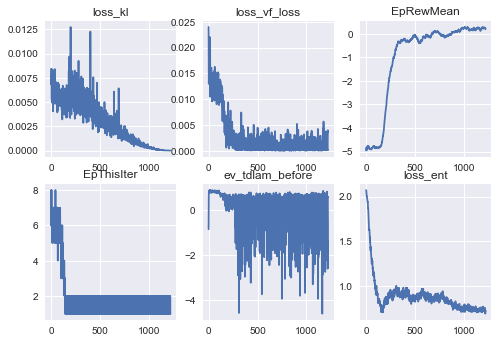

In [25]:
columns = ['loss_kl', 'loss_vf_loss', 'EpRewMean', 'EpThisIter', 'ev_tdlam_before', 'loss_ent']

nrow = 2
ncol = 3
fig, axes = plt.subplots(nrow, ncol)

i = 0
for r in range(nrow):
    for c in range(ncol):
        df[columns[i]].plot(ax=axes[r,c], title=columns[i])
        i += 1

In [3]:
import gym

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

env = gym.make('CartPole-v1')
# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
# env = DummyVecEnv([lambda: env])

model = PPO2(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=10000)

obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

env.close()

ModuleNotFoundError: No module named 'tensorflow.contrib'